In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

all_data = pd.read_csv('data.csv')

all_data.columns

Index(['CUST_ID', 'INCOME', 'SAVINGS', 'DEBT', 'R_SAVINGS_INCOME',
       'R_DEBT_INCOME', 'R_DEBT_SAVINGS', 'T_CLOTHING_12', 'T_CLOTHING_6',
       'R_CLOTHING', 'R_CLOTHING_INCOME', 'R_CLOTHING_SAVINGS',
       'R_CLOTHING_DEBT', 'T_EDUCATION_12', 'T_EDUCATION_6', 'R_EDUCATION',
       'R_EDUCATION_INCOME', 'R_EDUCATION_SAVINGS', 'R_EDUCATION_DEBT',
       'T_ENTERTAINMENT_12', 'T_ENTERTAINMENT_6', 'R_ENTERTAINMENT',
       'R_ENTERTAINMENT_INCOME', 'R_ENTERTAINMENT_SAVINGS',
       'R_ENTERTAINMENT_DEBT', 'T_FINES_12', 'T_FINES_6', 'R_FINES',
       'R_FINES_INCOME', 'R_FINES_SAVINGS', 'R_FINES_DEBT', 'T_GAMBLING_12',
       'T_GAMBLING_6', 'R_GAMBLING', 'R_GAMBLING_INCOME', 'R_GAMBLING_SAVINGS',
       'R_GAMBLING_DEBT', 'T_GROCERIES_12', 'T_GROCERIES_6', 'R_GROCERIES',
       'R_GROCERIES_INCOME', 'R_GROCERIES_SAVINGS', 'R_GROCERIES_DEBT',
       'T_HEALTH_12', 'T_HEALTH_6', 'R_HEALTH', 'R_HEALTH_INCOME',
       'R_HEALTH_SAVINGS', 'R_HEALTH_DEBT', 'T_HOUSING_12', 'T_HOUSING_6',
 

In [45]:
# choose columns that are original

original_features = ['INCOME', 'SAVINGS', 'DEBT', 'T_CLOTHING_12', 'T_CLOTHING_6',
       'T_EDUCATION_12', 'T_EDUCATION_6', 
       'T_ENTERTAINMENT_12', 'T_ENTERTAINMENT_6', 'T_FINES_12', 'T_FINES_6', 
       'T_GAMBLING_12', 'T_GAMBLING_6', 'T_GROCERIES_12', 'T_GROCERIES_6', 
       'T_HEALTH_12', 'T_HEALTH_6', 'T_HOUSING_12', 'T_HOUSING_6',
       'T_TAX_12', 'T_TAX_6',
       'T_TRAVEL_12', 'T_TRAVEL_6', 
       'T_UTILITIES_12', 'T_UTILITIES_6', 
       'T_EXPENDITURE_12', 'T_EXPENDITURE_6', 'CAT_GAMBLING',
       'CAT_DEBT', 'CAT_CREDIT_CARD', 'CAT_MORTGAGE', 'CAT_SAVINGS_ACCOUNT',
       'CAT_DEPENDENTS', 'CREDIT_SCORE', 'DEFAULT']

groups = ['CLOTHING', 'EDUCATION', 'ENTERTAINMENT', 'FINES', 'GAMBLING', 'GROCERIES', 'HEALTH', 'HOUSING', 'TAX', 'TRAVEL', 'UTILITIES']

In [46]:
all_data = all_data[original_features]
all_data['CAT_GAMBLING'] = all_data['CAT_GAMBLING'].map({'No': 0, 'High': 2, 'Low': 1})

In [5]:
data = all_data

In [6]:
cor_matrix = data.corr().style.background_gradient(cmap='coolwarm').set_precision(4)
cor_matrix

/var/folders/y9/p941jysn0ddb8zkx38rpntd80000gn/T/ipykernel_56453/2731314149.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_matrix = data.corr().style.background_gradient(cmap='coolwarm').set_precision(4)
/var/folders/y9/p941jysn0ddb8zkx38rpntd80000gn/T/ipykernel_56453/2731314149.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  cor_matrix = data.corr().style.background_gradient(cmap='coolwarm').set_precision(4)


<h3>We can drop: T_EDUCATION_6, T_ENTERTAINMENT_6, T_GAMBLING_6, T_GROCERIES_6, T_HOUSING_6, T_TAX_6, T_UTILITIES_6</h3> Correlations are>98%

In [7]:
#drop: T_EDUCATION_6, T_ENTERTAINMENT_6, T_GAMBLING_6, T_GROCERIES_6, T_HOUSING_6, T_TAX_6, T_UTILITIES_6
#data.drop(['T_EDUCATION_6', 'T_ENTERTAINMENT_6', 'T_GAMBLING_6', 'T_GROCERIES_6', 'T_HOUSING_6', 'T_TAX_6', 'T_UTILITIES_6'], axis=1, inplace=True)

In [8]:
data.columns

Index(['CUST_ID', 'INCOME', 'SAVINGS', 'DEBT', 'R_SAVINGS_INCOME',
       'R_DEBT_INCOME', 'R_DEBT_SAVINGS', 'T_CLOTHING_12', 'T_CLOTHING_6',
       'R_CLOTHING', 'R_CLOTHING_INCOME', 'R_CLOTHING_SAVINGS',
       'R_CLOTHING_DEBT', 'T_EDUCATION_12', 'T_EDUCATION_6', 'R_EDUCATION',
       'R_EDUCATION_INCOME', 'R_EDUCATION_SAVINGS', 'R_EDUCATION_DEBT',
       'T_ENTERTAINMENT_12', 'T_ENTERTAINMENT_6', 'R_ENTERTAINMENT',
       'R_ENTERTAINMENT_INCOME', 'R_ENTERTAINMENT_SAVINGS',
       'R_ENTERTAINMENT_DEBT', 'T_FINES_12', 'T_FINES_6', 'R_FINES',
       'R_FINES_INCOME', 'R_FINES_SAVINGS', 'R_FINES_DEBT', 'T_GAMBLING_12',
       'T_GAMBLING_6', 'R_GAMBLING', 'R_GAMBLING_INCOME', 'R_GAMBLING_SAVINGS',
       'R_GAMBLING_DEBT', 'T_GROCERIES_12', 'T_GROCERIES_6', 'R_GROCERIES',
       'R_GROCERIES_INCOME', 'R_GROCERIES_SAVINGS', 'R_GROCERIES_DEBT',
       'T_HEALTH_12', 'T_HEALTH_6', 'R_HEALTH', 'R_HEALTH_INCOME',
       'R_HEALTH_SAVINGS', 'R_HEALTH_DEBT', 'T_HOUSING_12', 'T_HOUSING_6',
 

In [9]:
cor_matrix = data.corr().style.background_gradient(cmap='coolwarm').set_precision(4)
cor_matrix

/var/folders/y9/p941jysn0ddb8zkx38rpntd80000gn/T/ipykernel_56453/2731314149.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_matrix = data.corr().style.background_gradient(cmap='coolwarm').set_precision(4)
/var/folders/y9/p941jysn0ddb8zkx38rpntd80000gn/T/ipykernel_56453/2731314149.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  cor_matrix = data.corr().style.background_gradient(cmap='coolwarm').set_precision(4)


In [12]:
#find variations of the data
variations = data.var().sort_values
#variations are okay

/var/folders/y9/p941jysn0ddb8zkx38rpntd80000gn/T/ipykernel_56453/2414056390.py:2: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variations = data.var().sort_values


In [13]:
train, test = train_test_split(data, test_size=0.2, random_state=42)
train.to_csv('data/train_kate.csv', index=False)
test.to_csv('data/test_kate.csv', index=False)

/var/folders/y9/p941jysn0ddb8zkx38rpntd80000gn/T/ipykernel_56453/1544798370.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(15, 7))


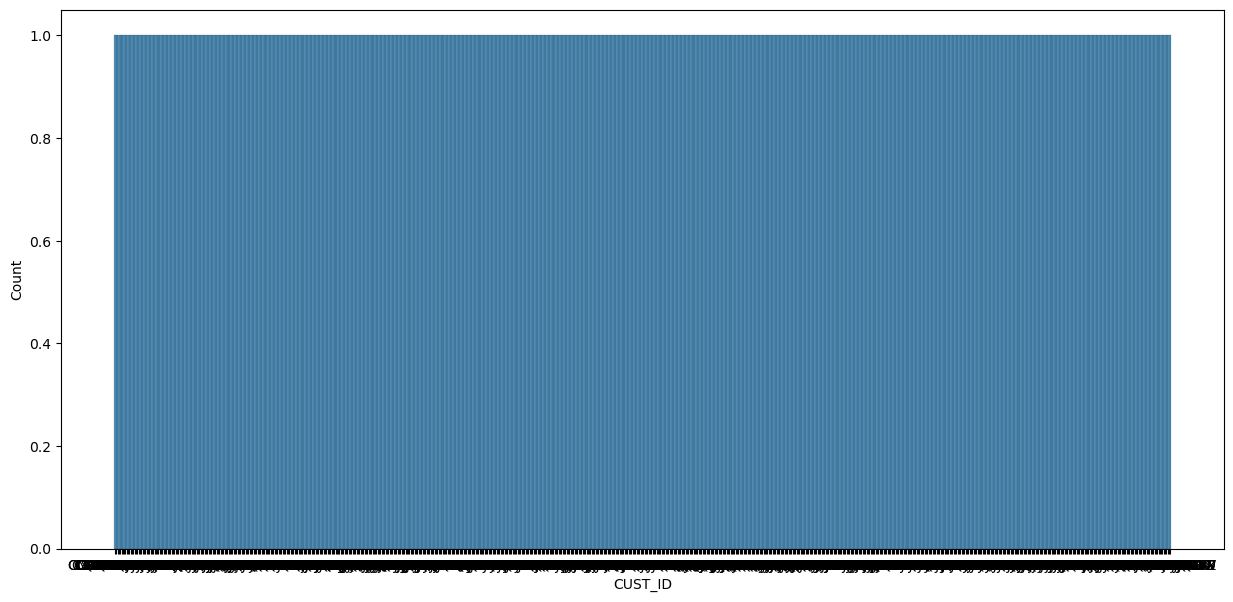

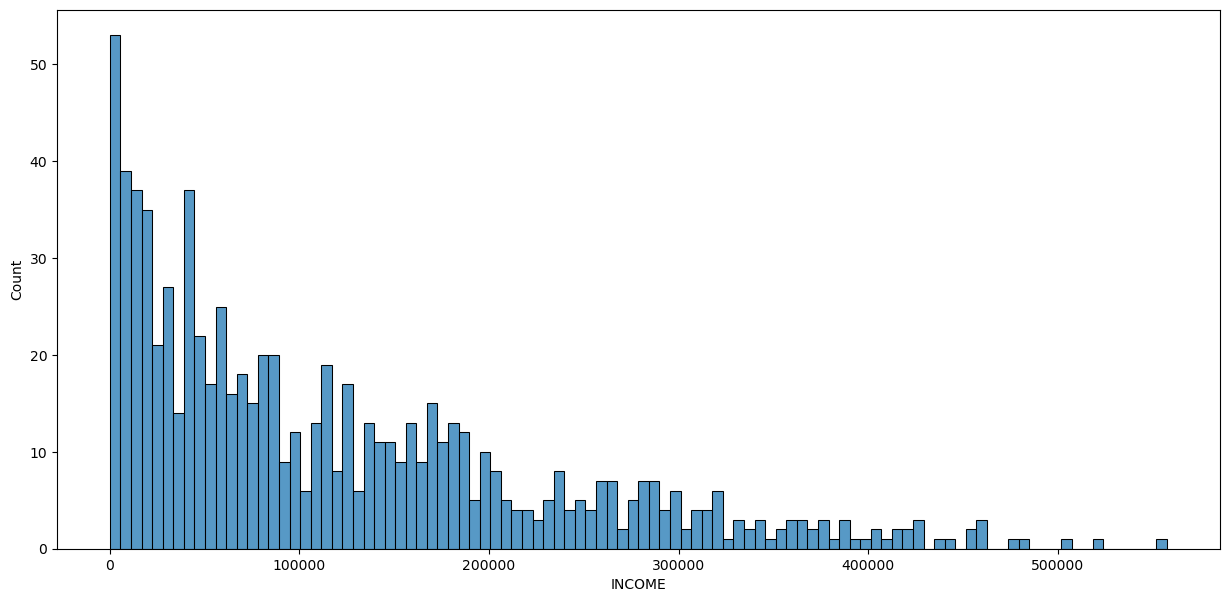

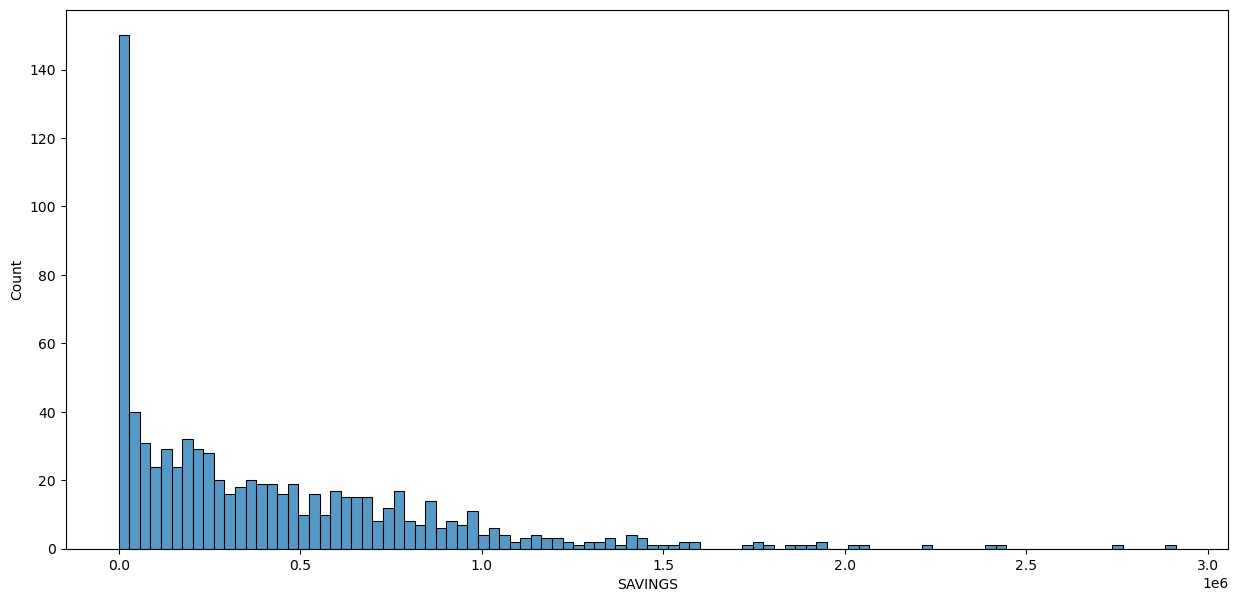

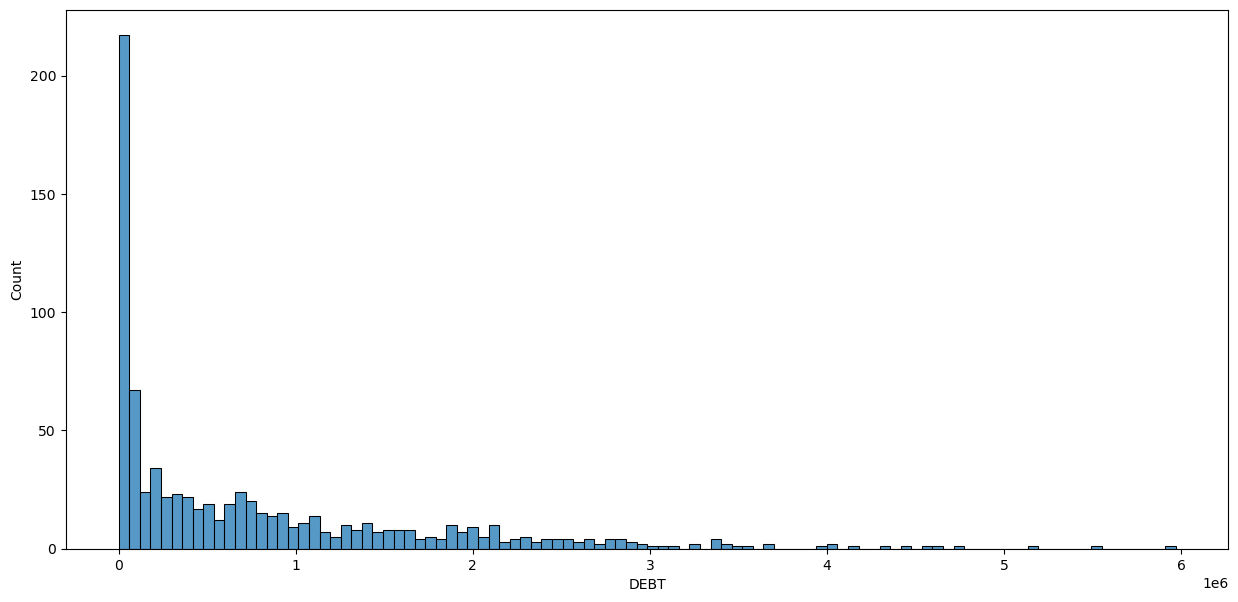

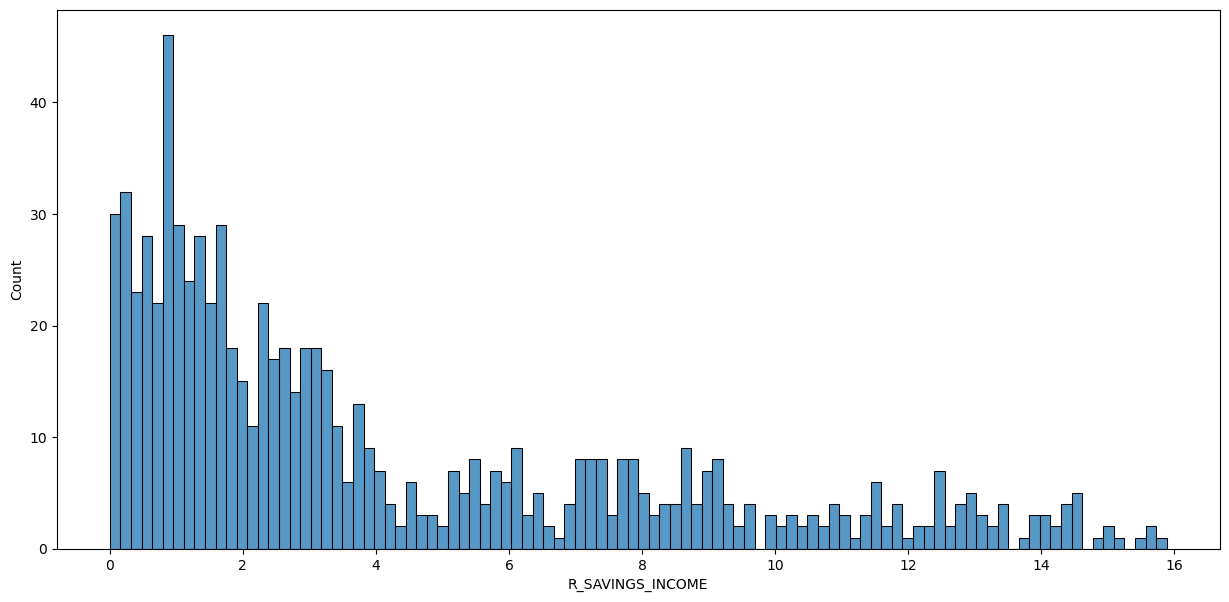

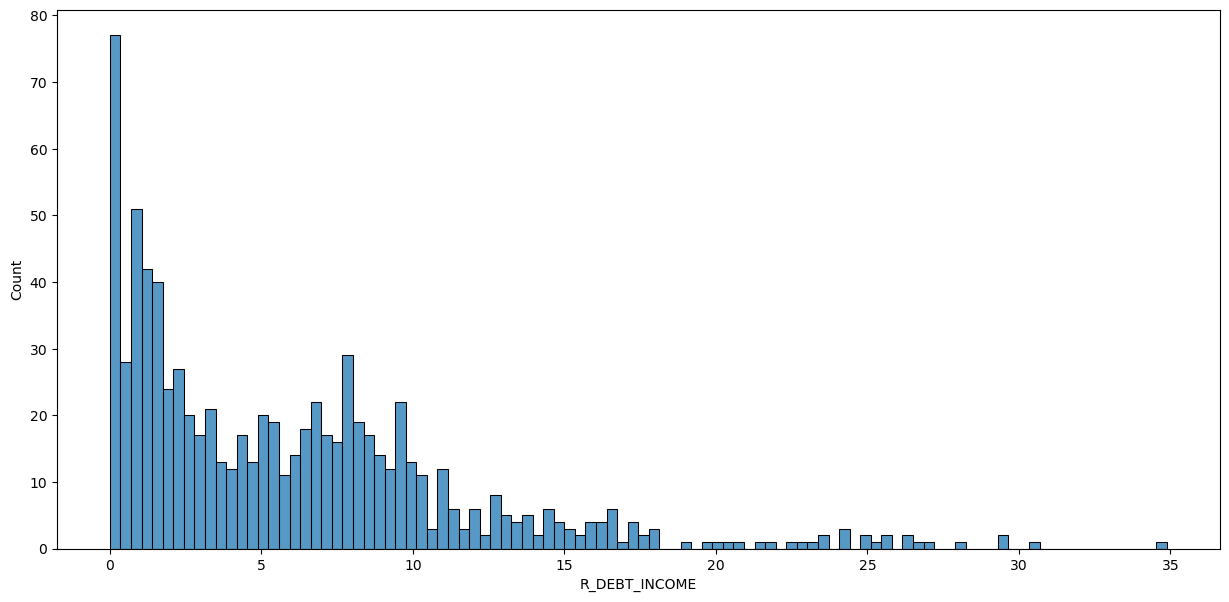

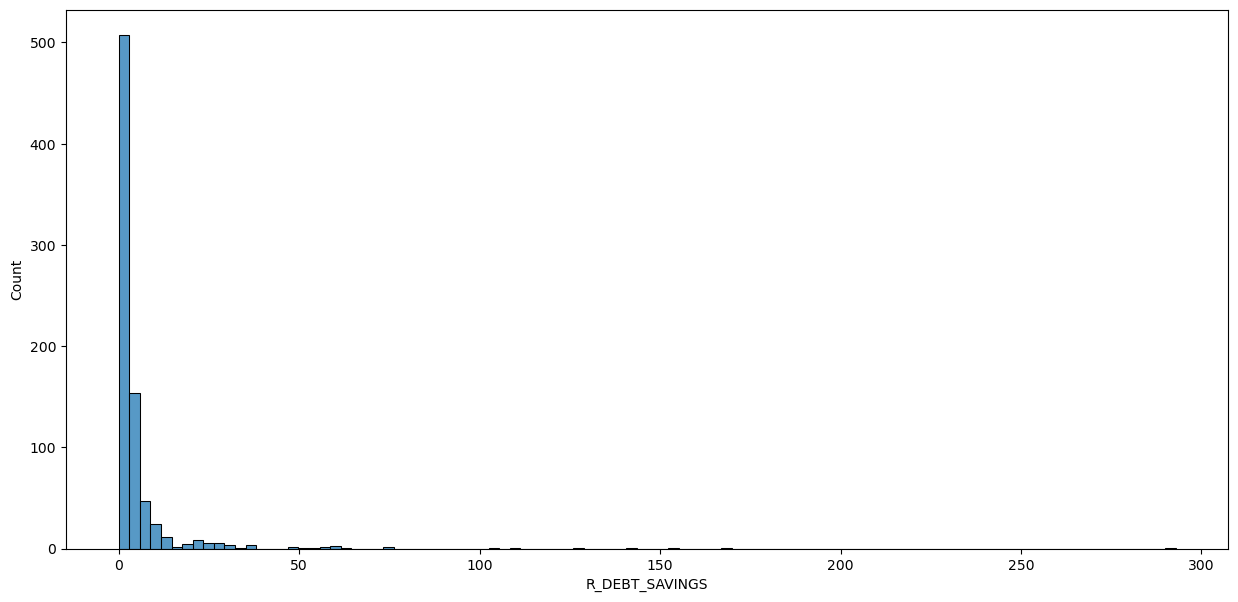

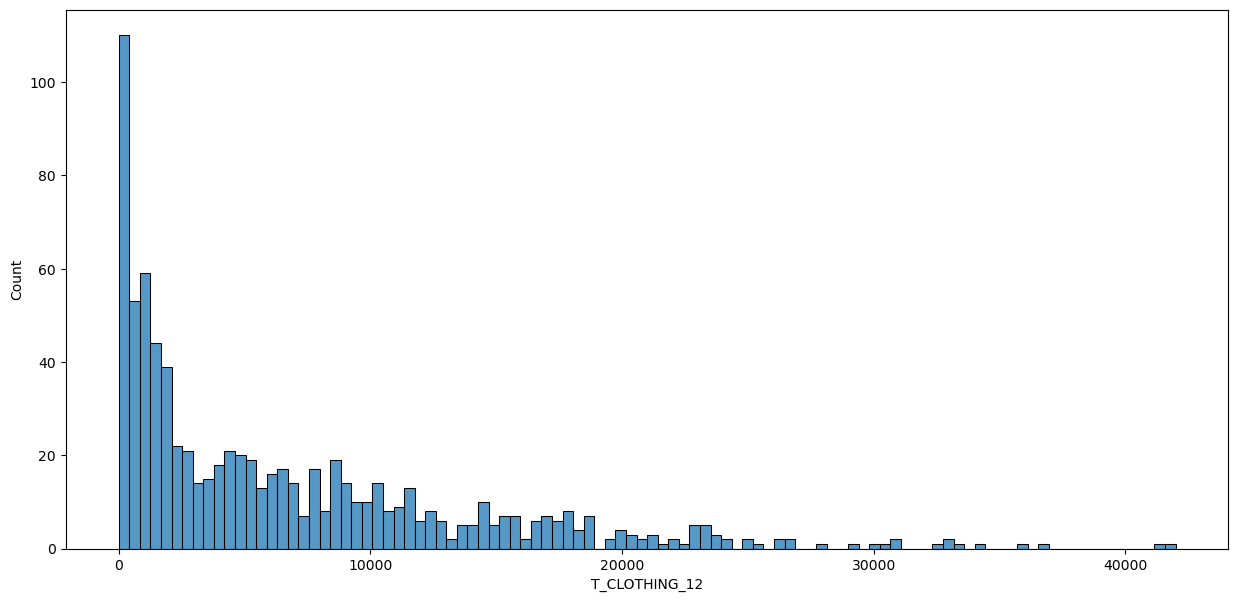

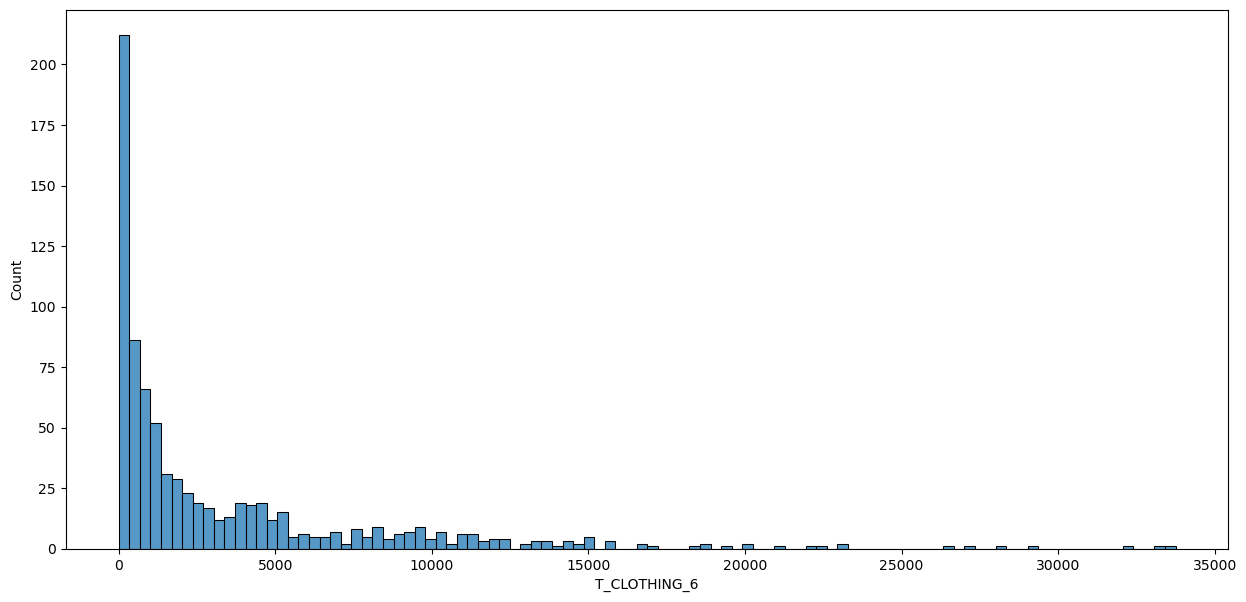

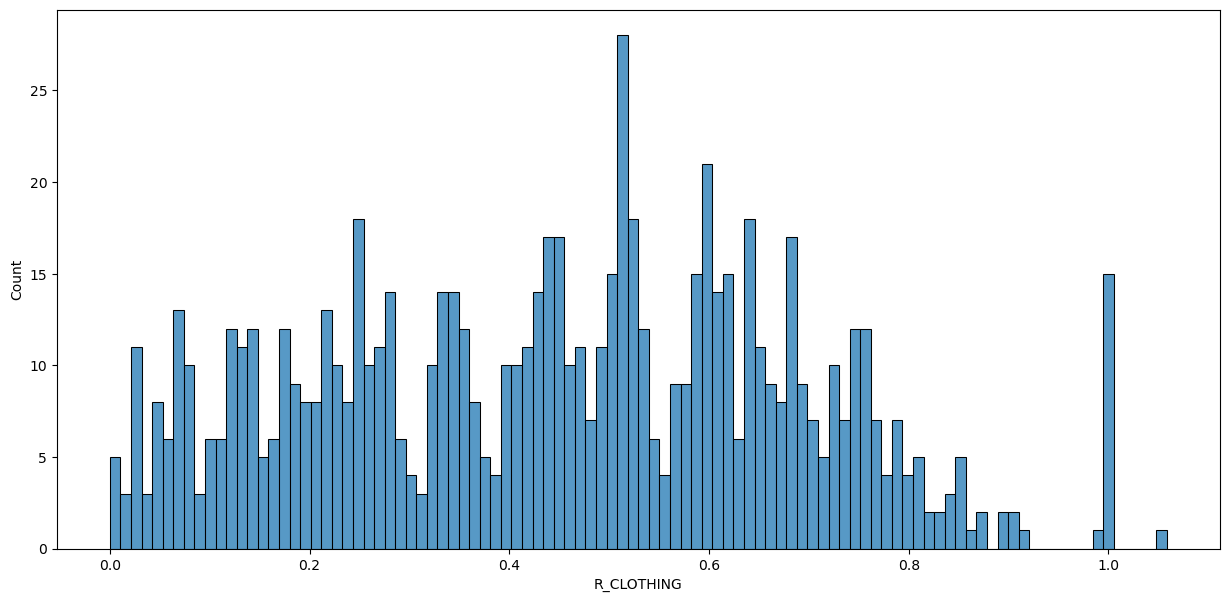

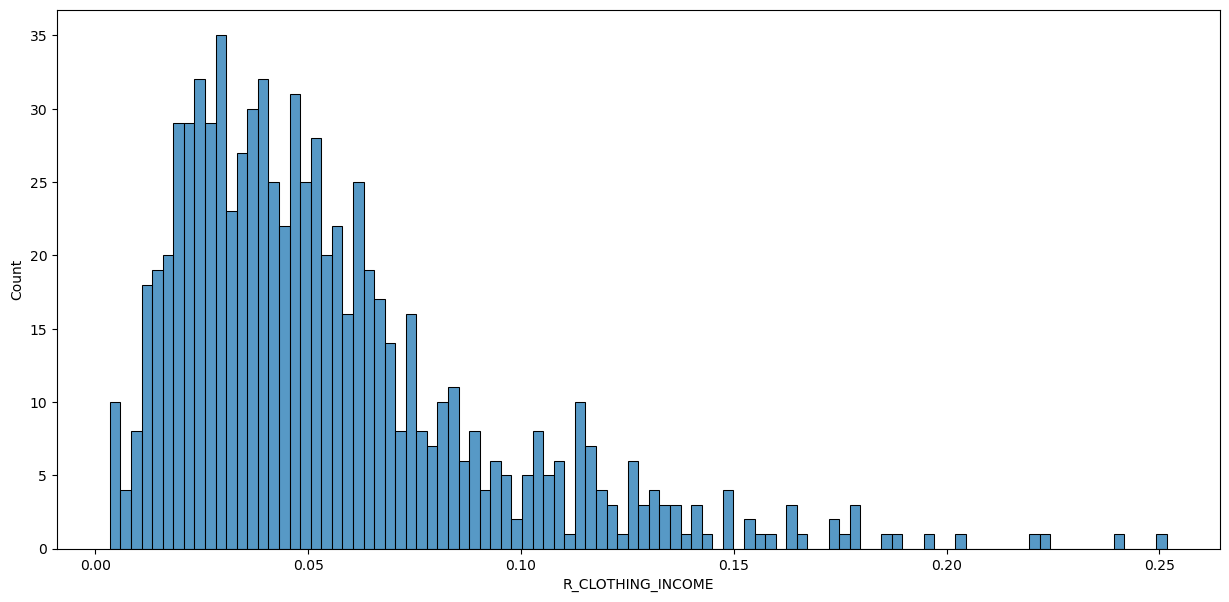

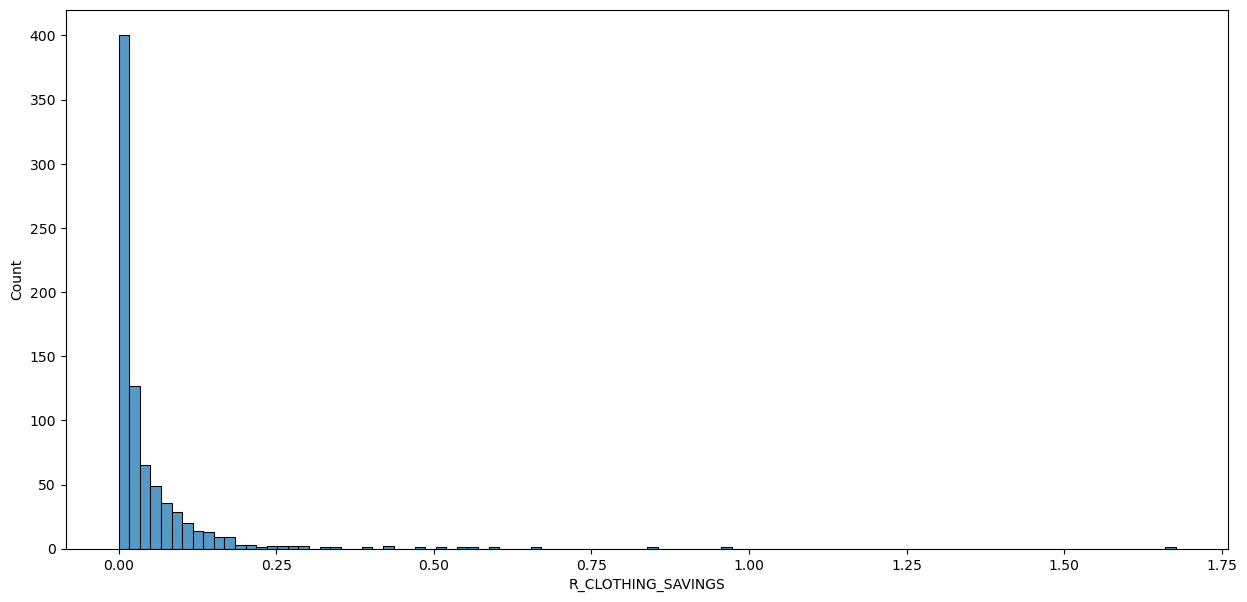

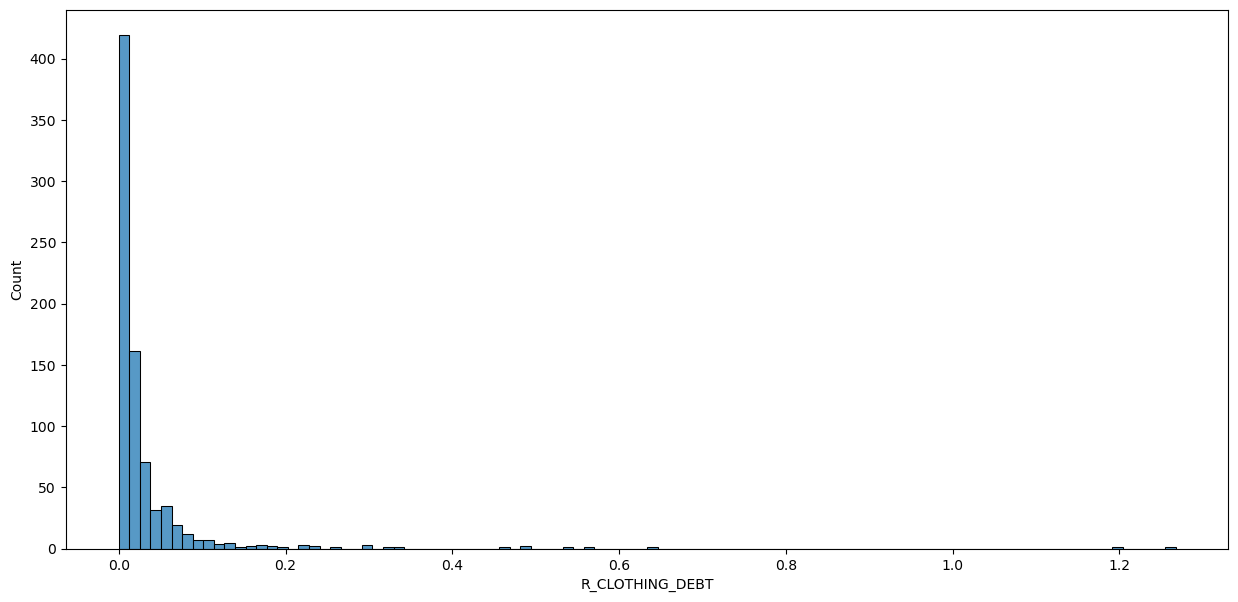

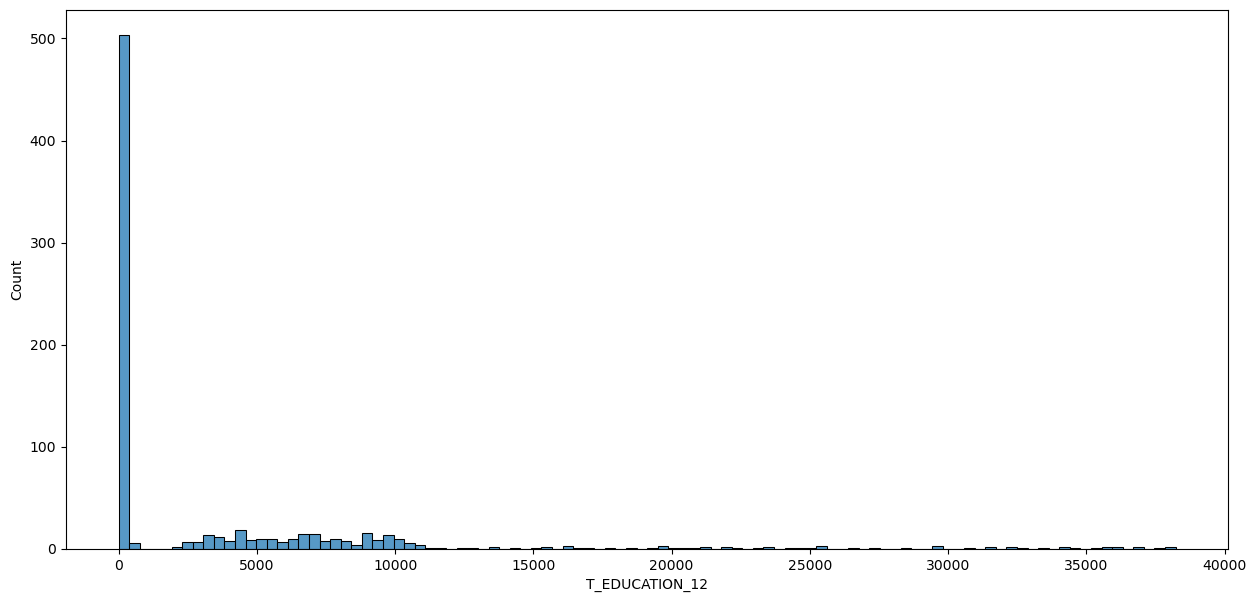

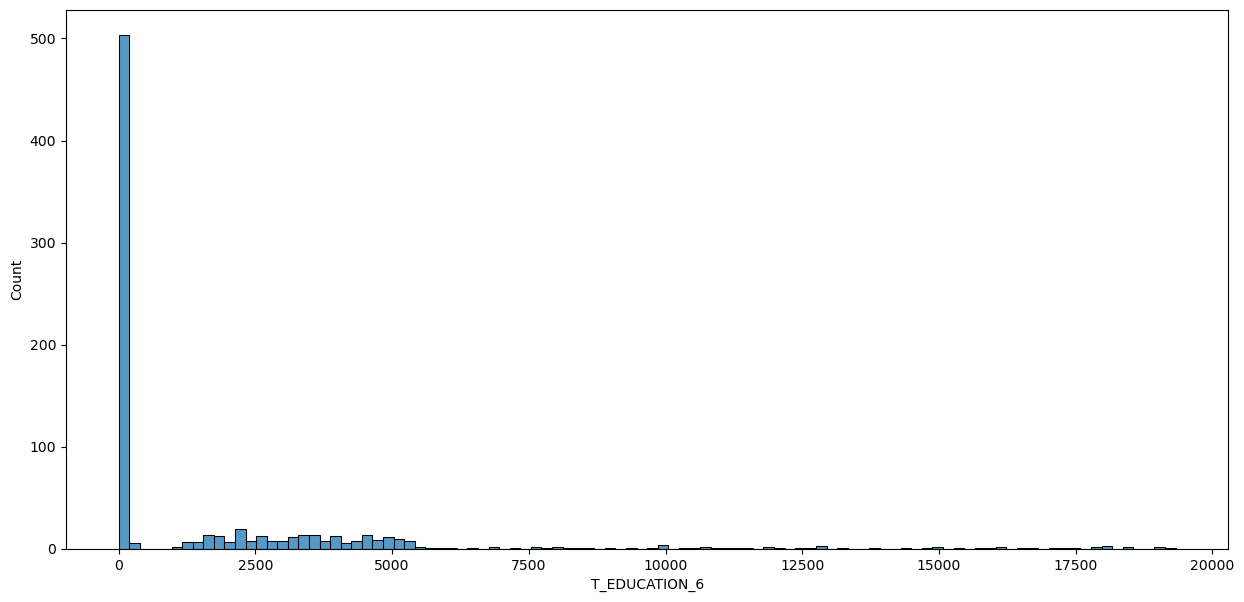

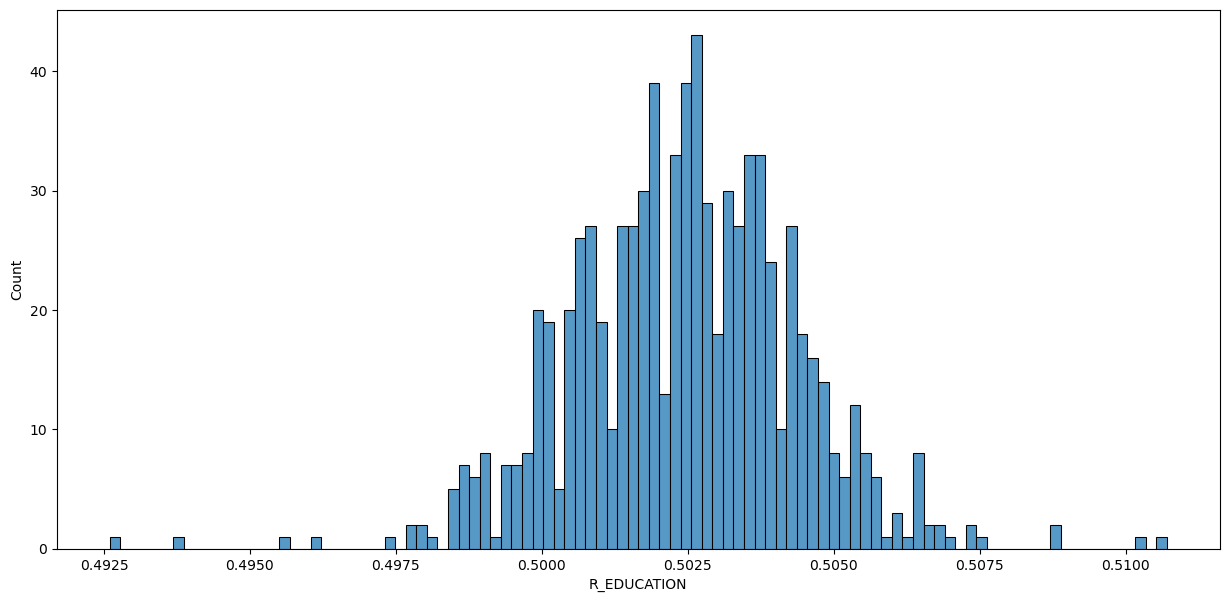

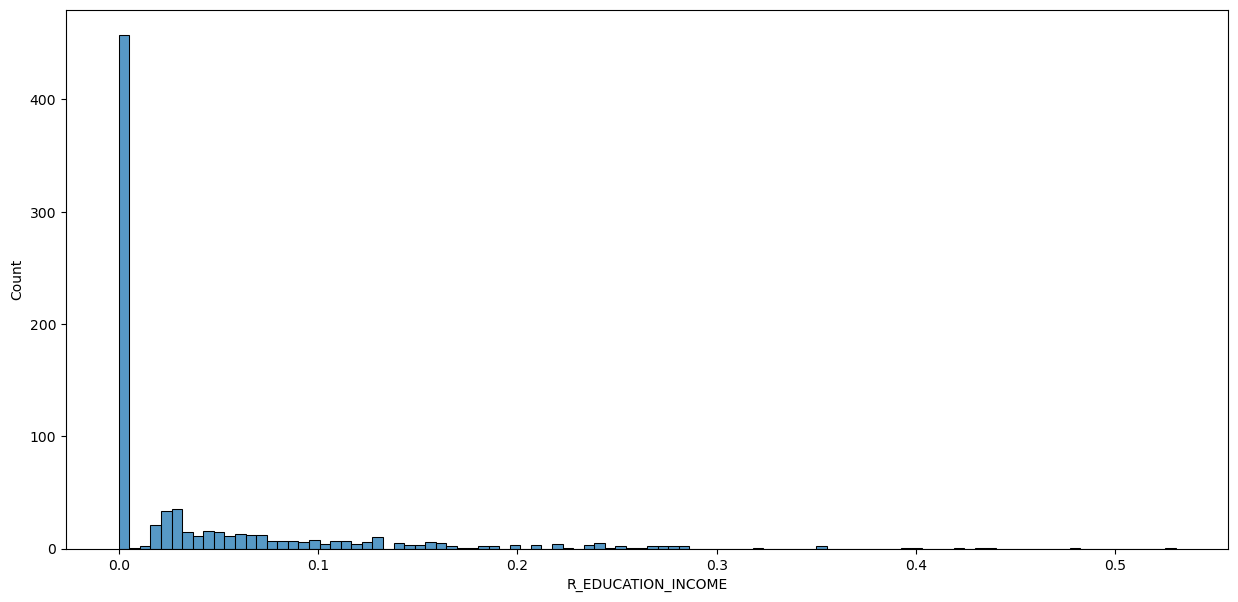

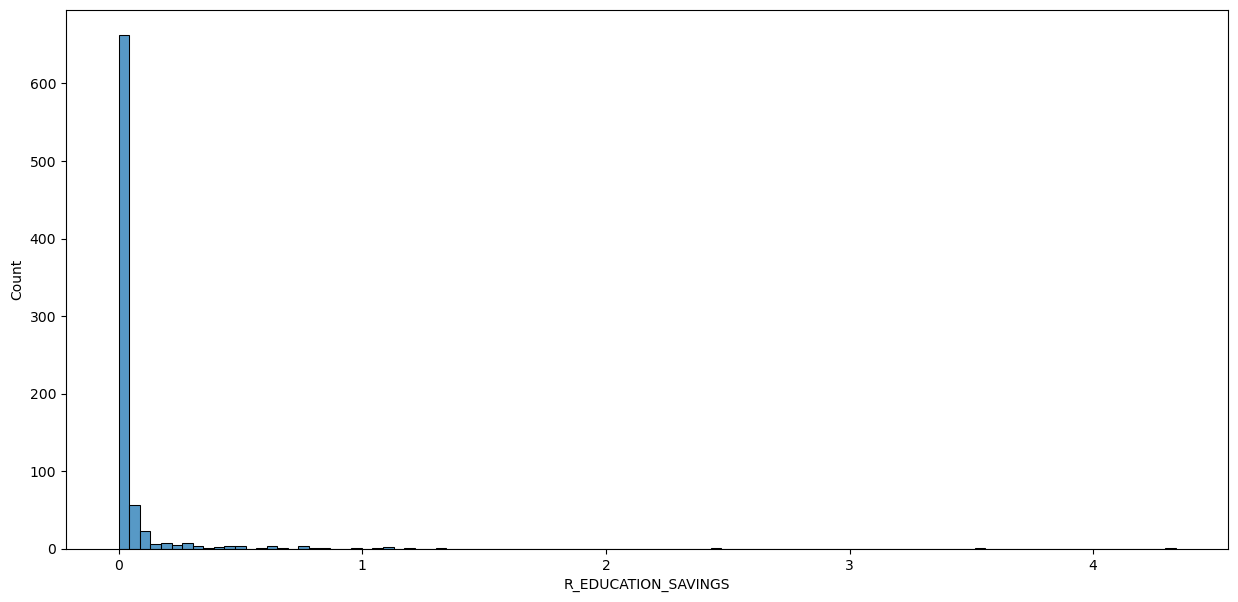

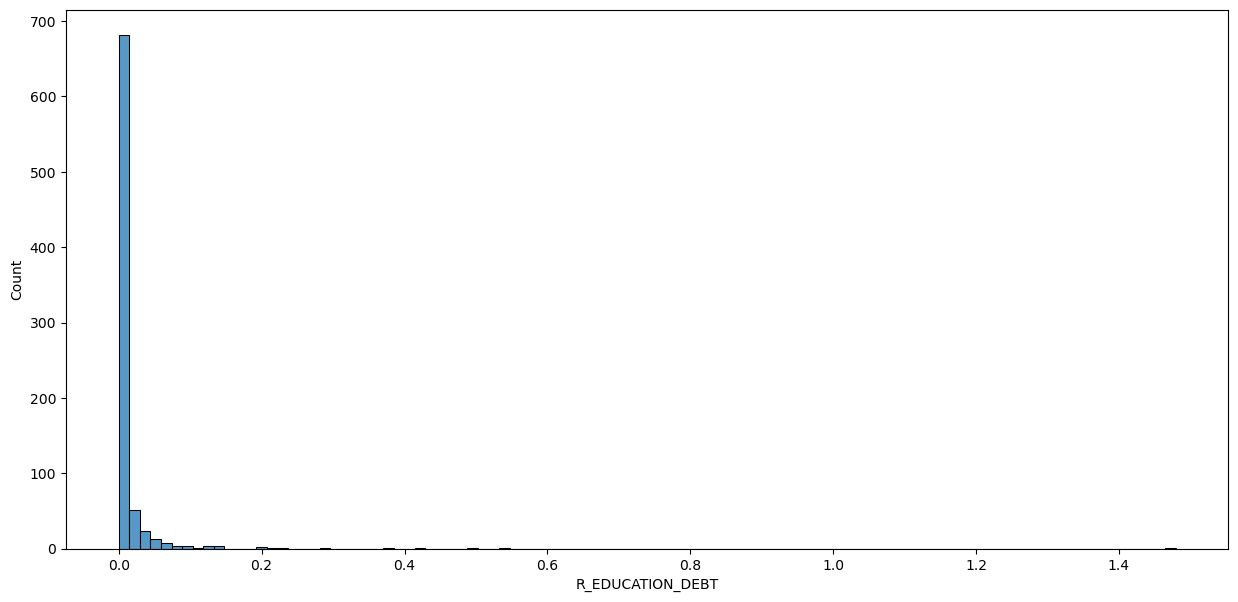

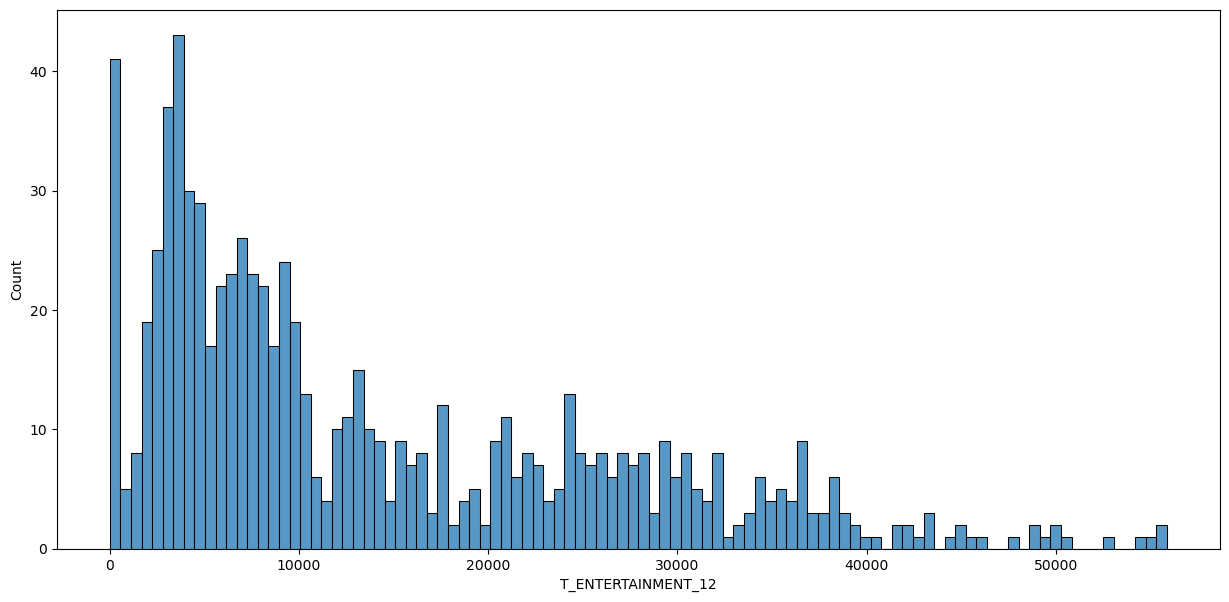

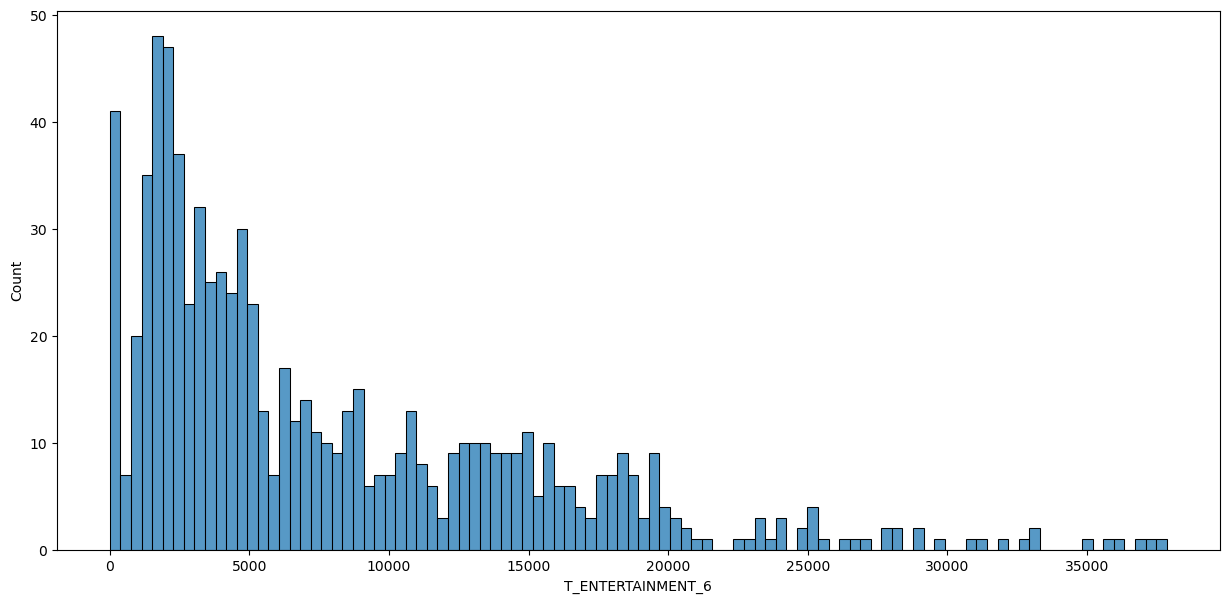

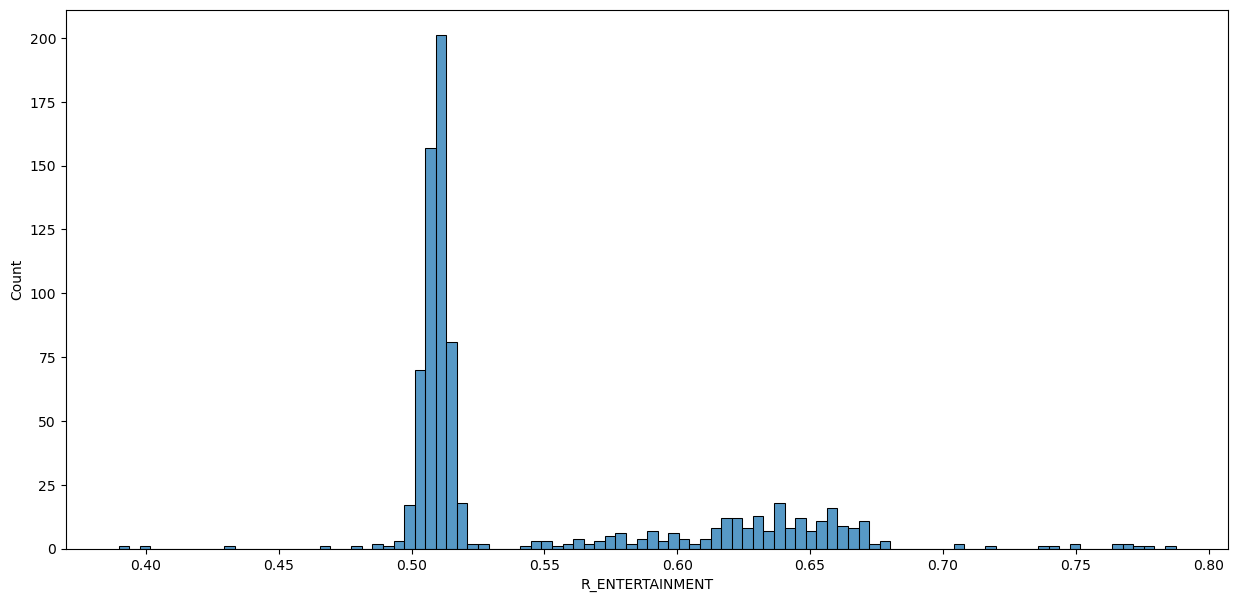

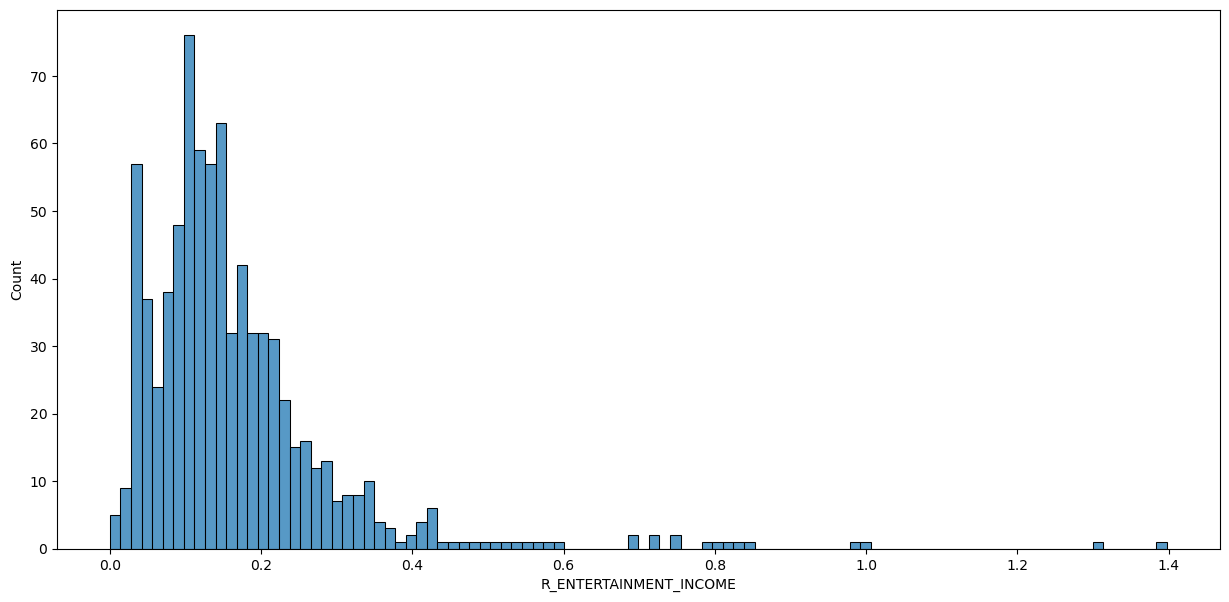

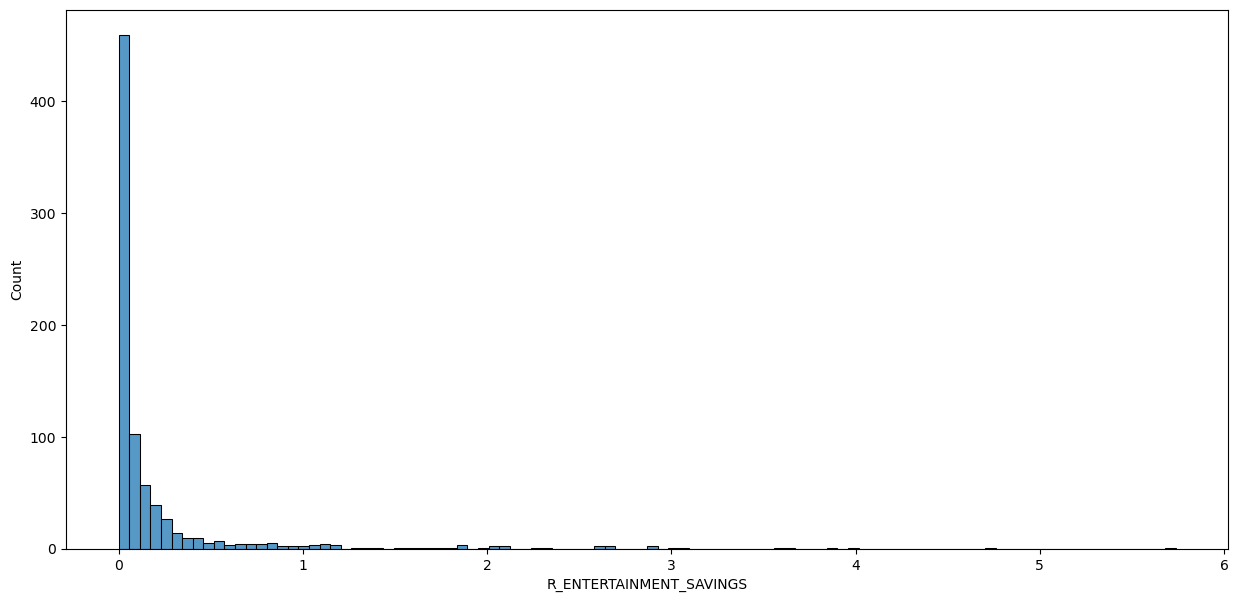

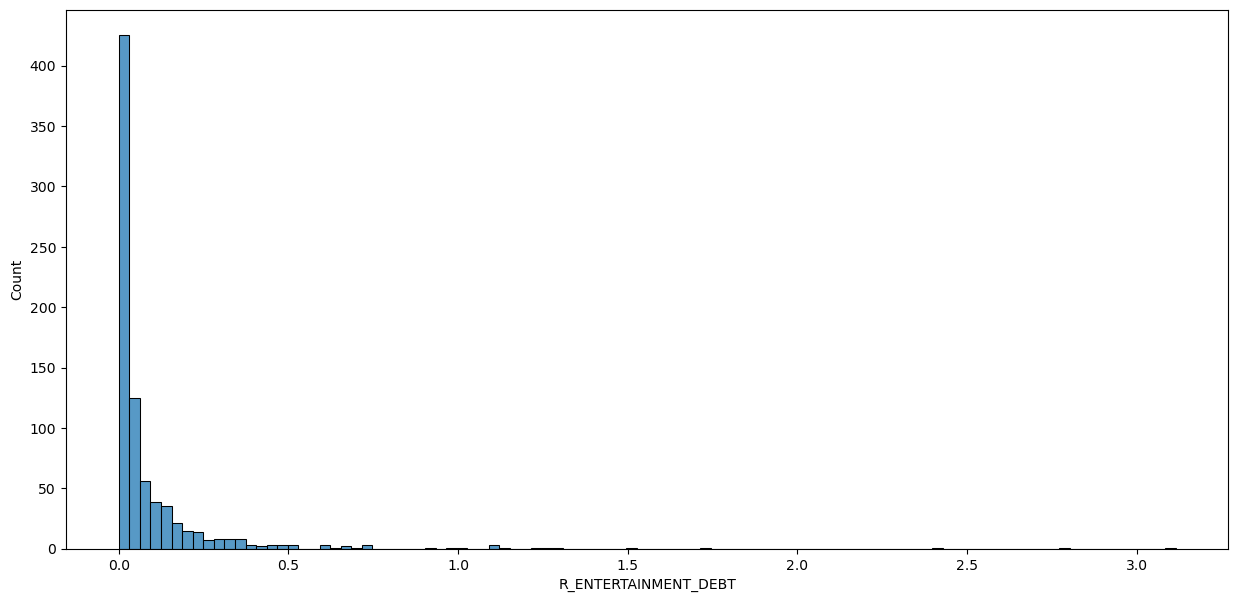

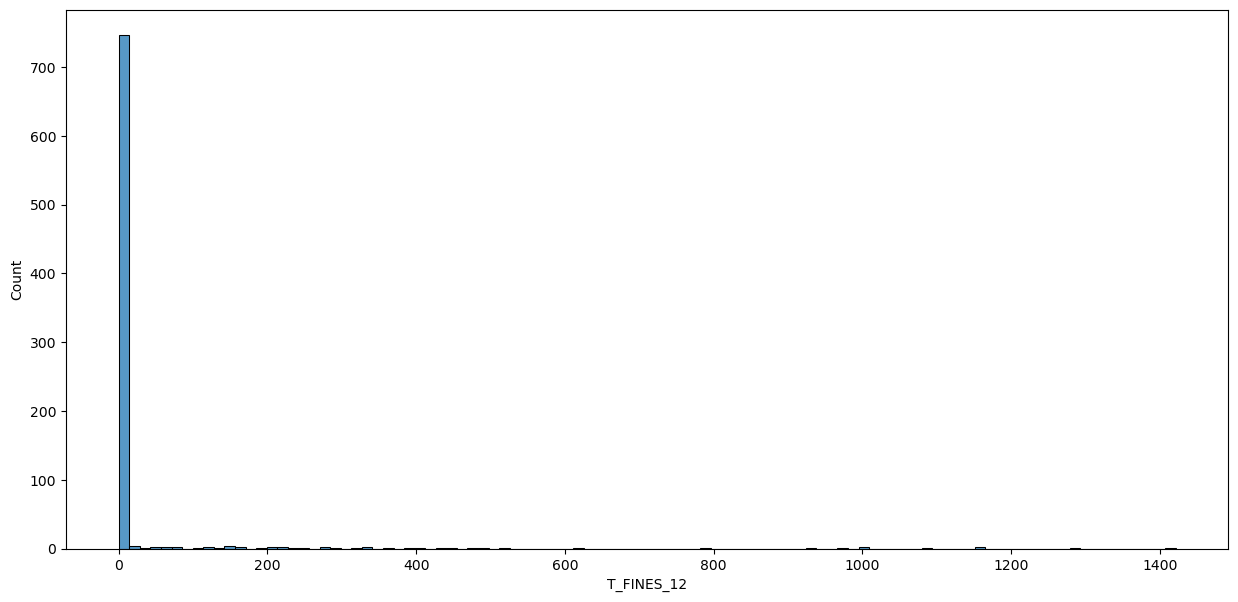

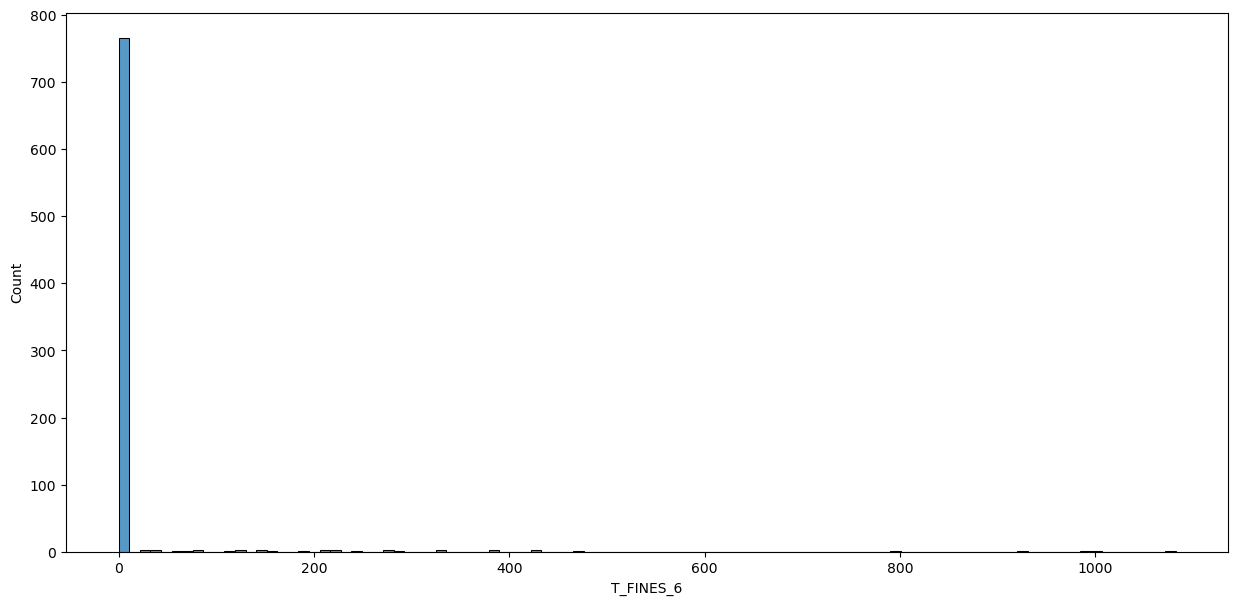

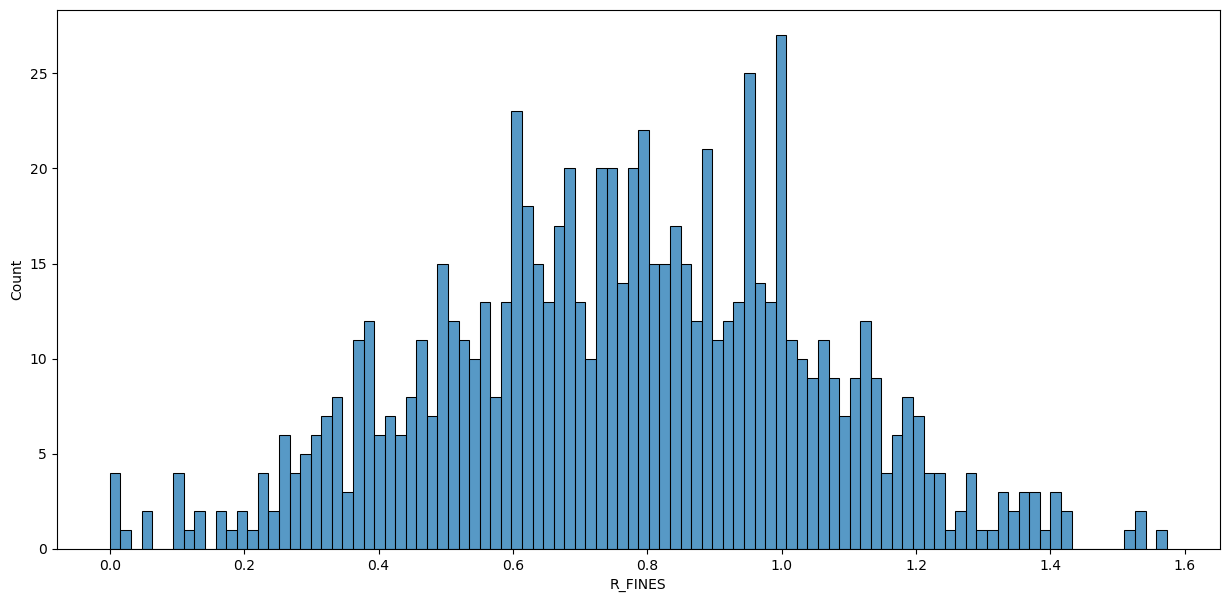

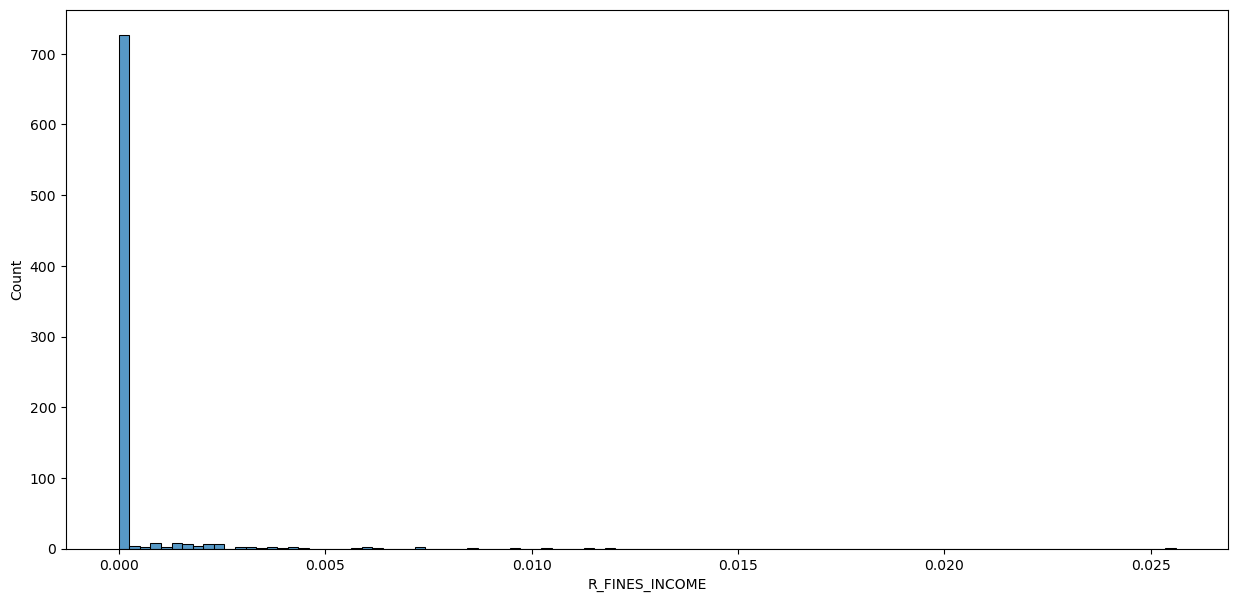

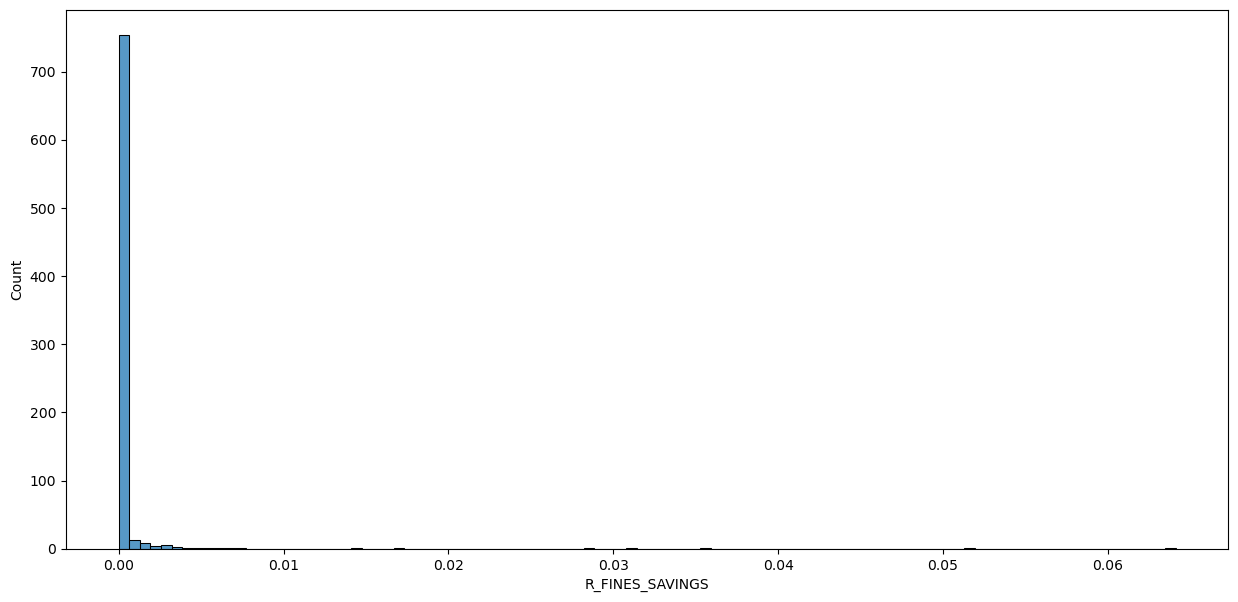

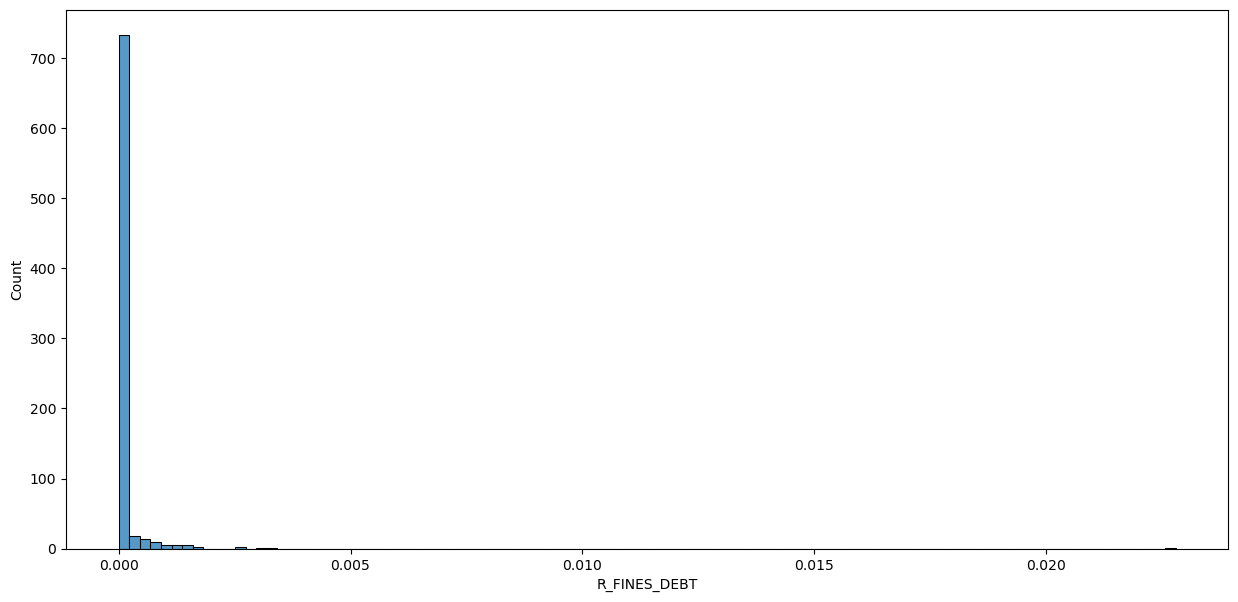

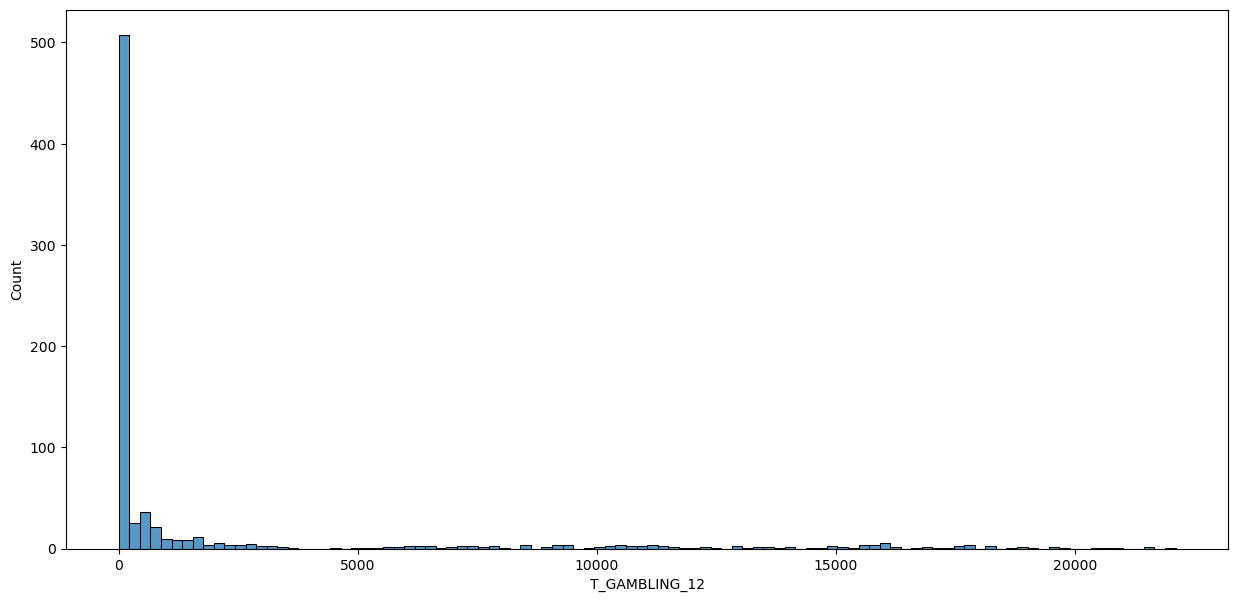

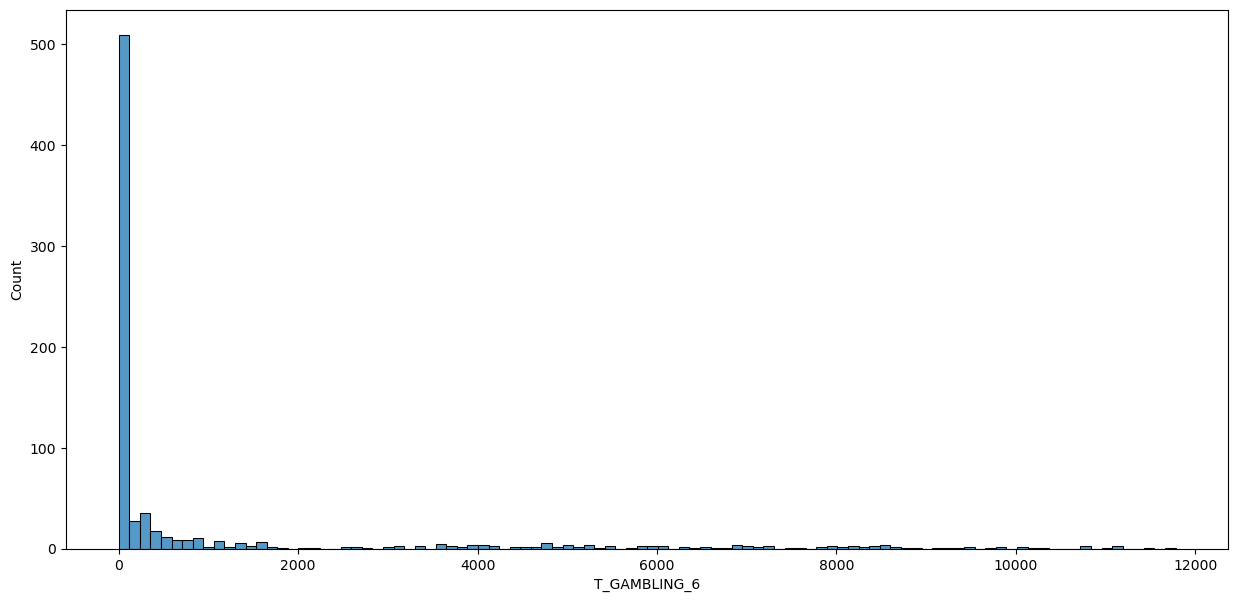

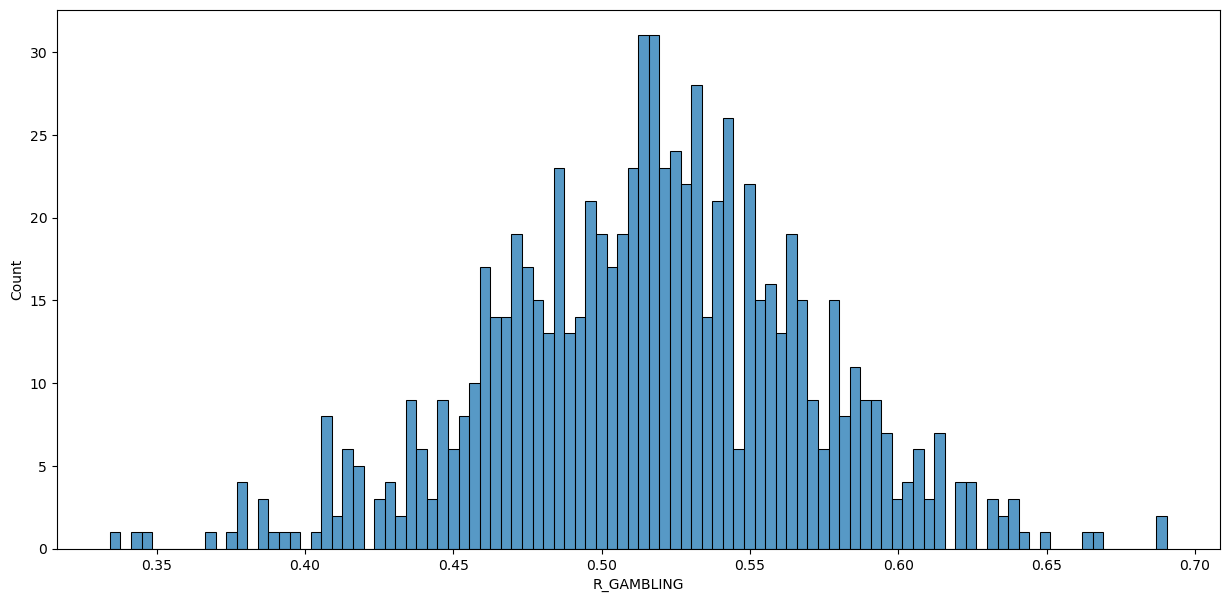

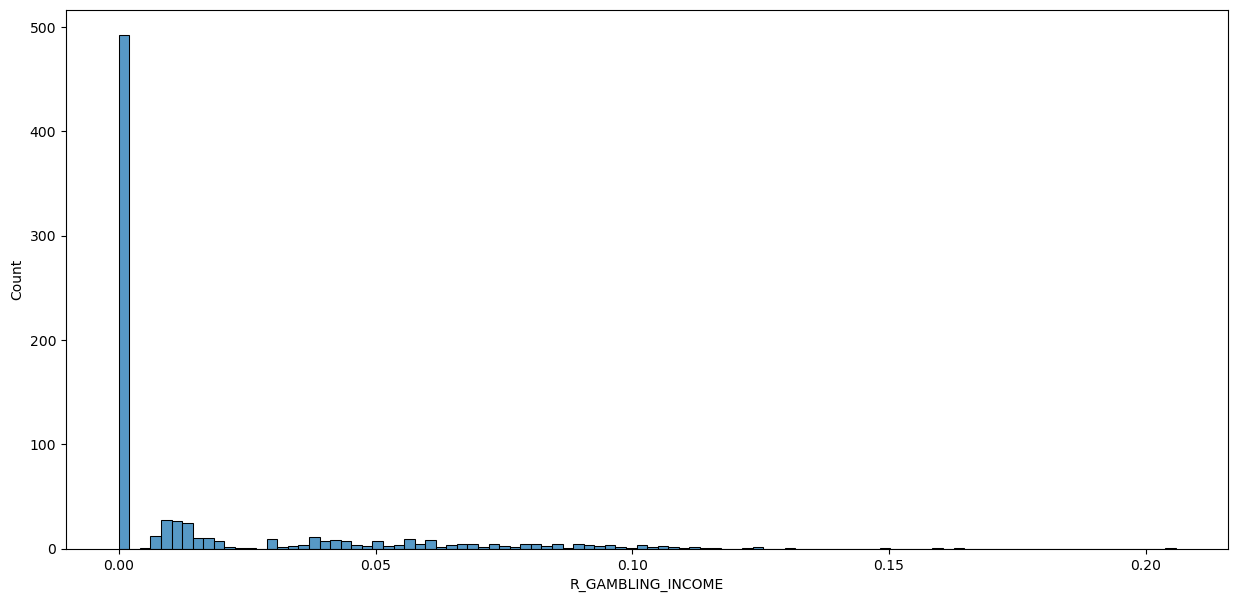

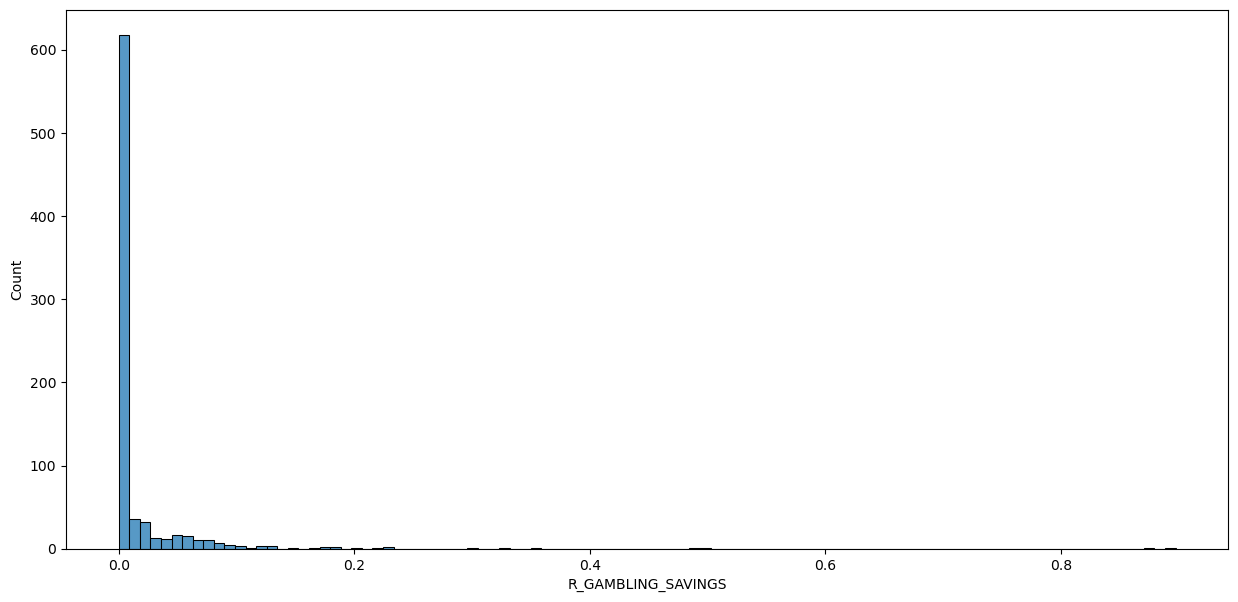

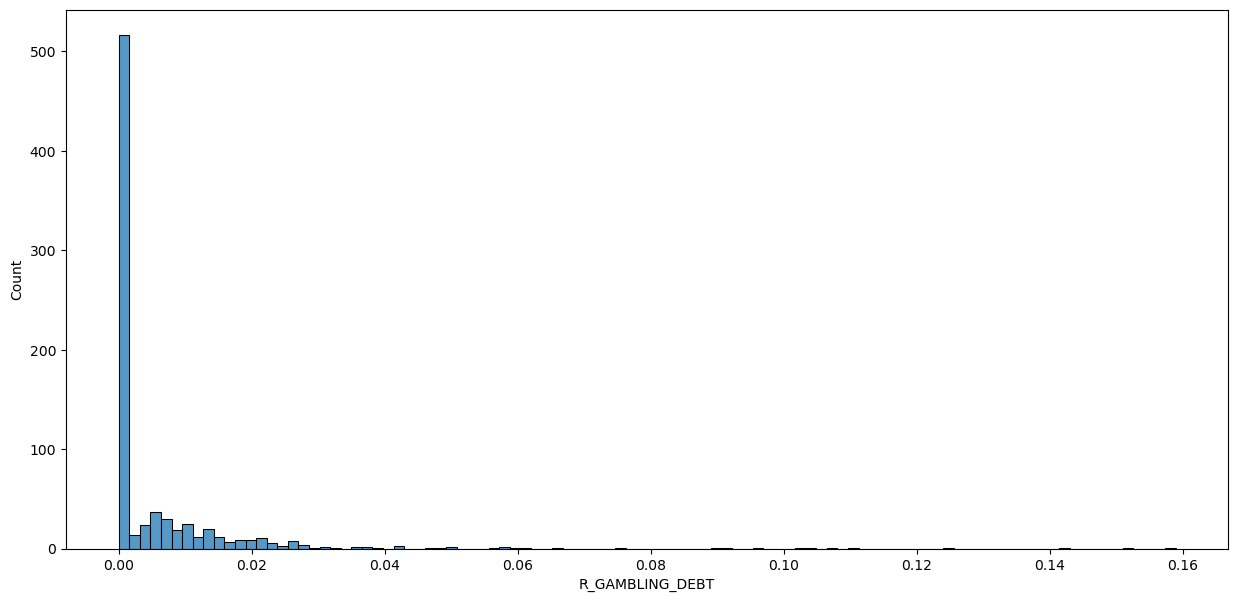

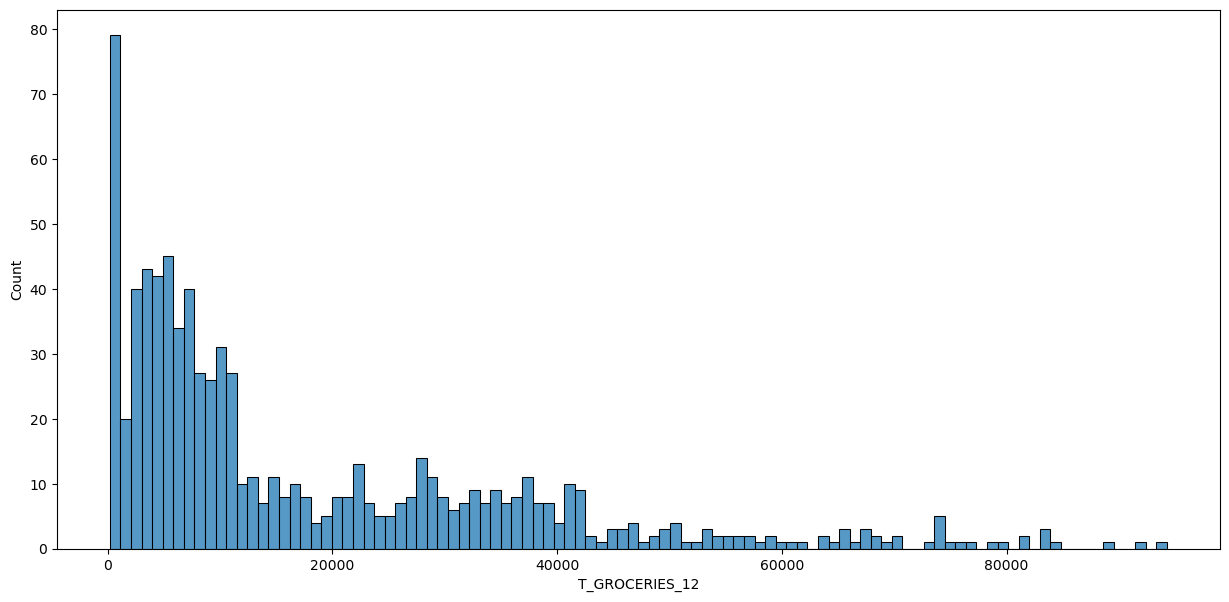

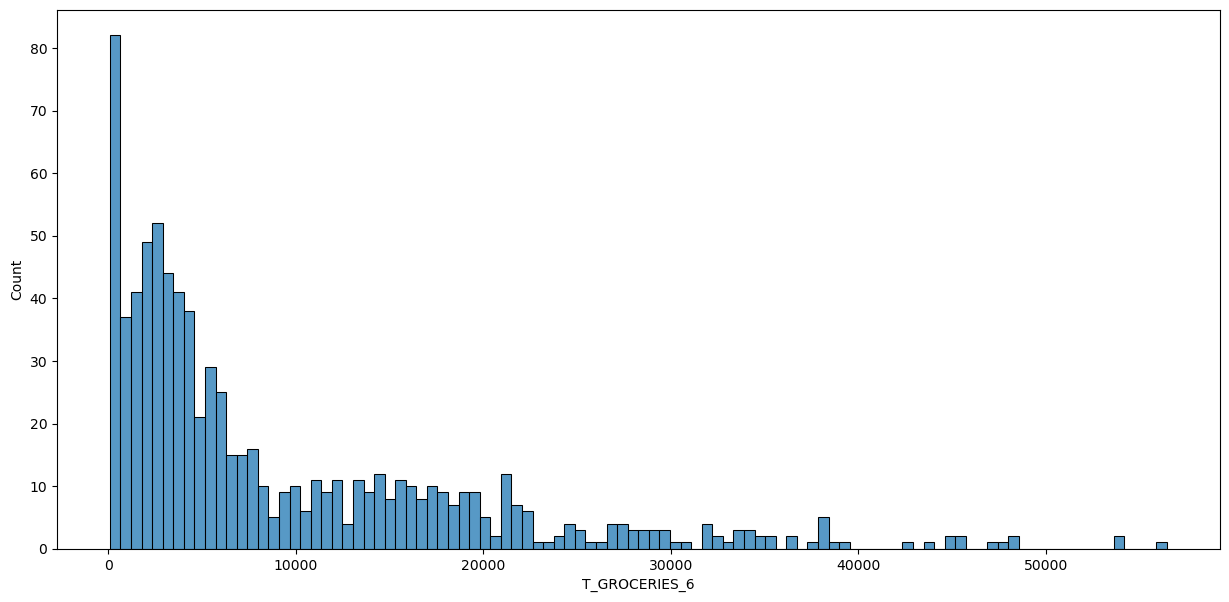

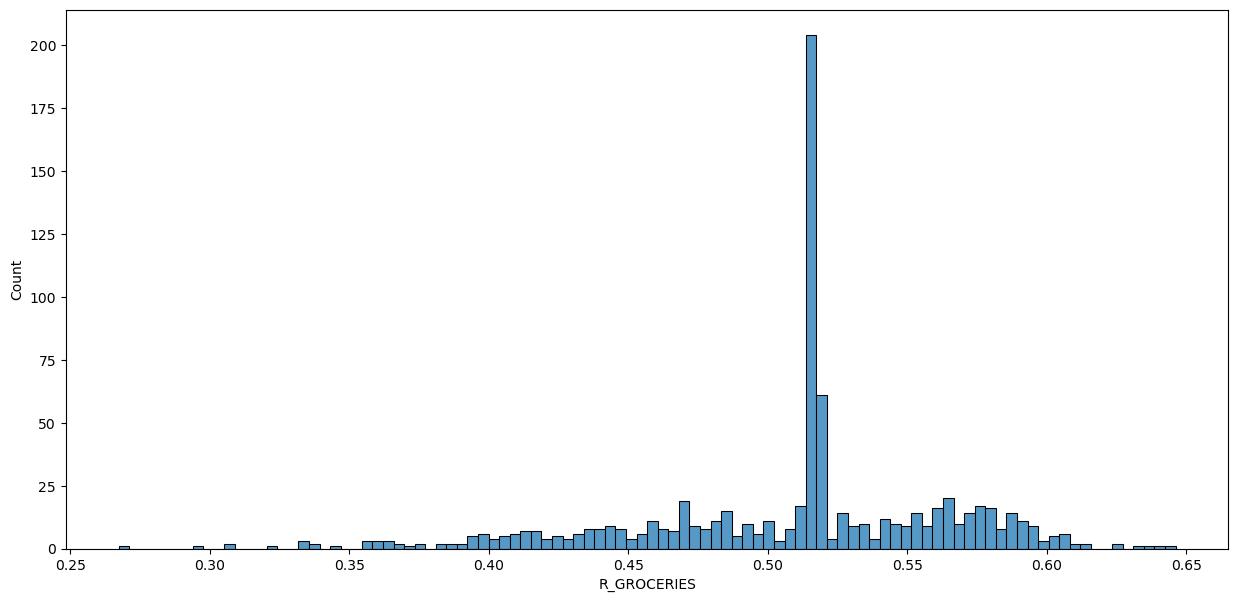

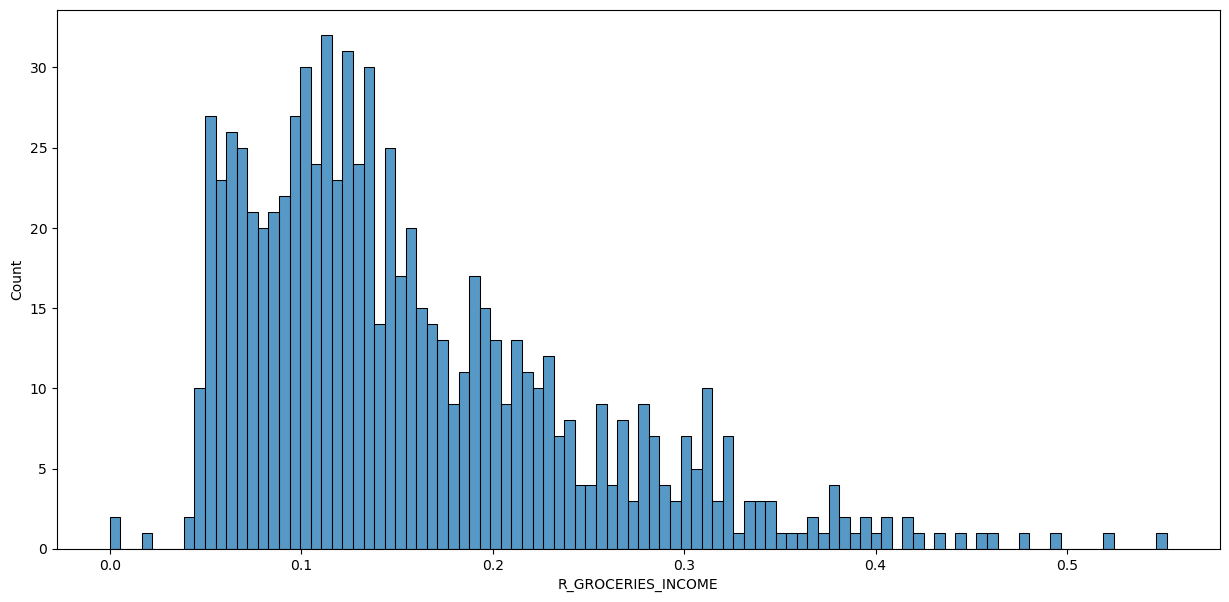

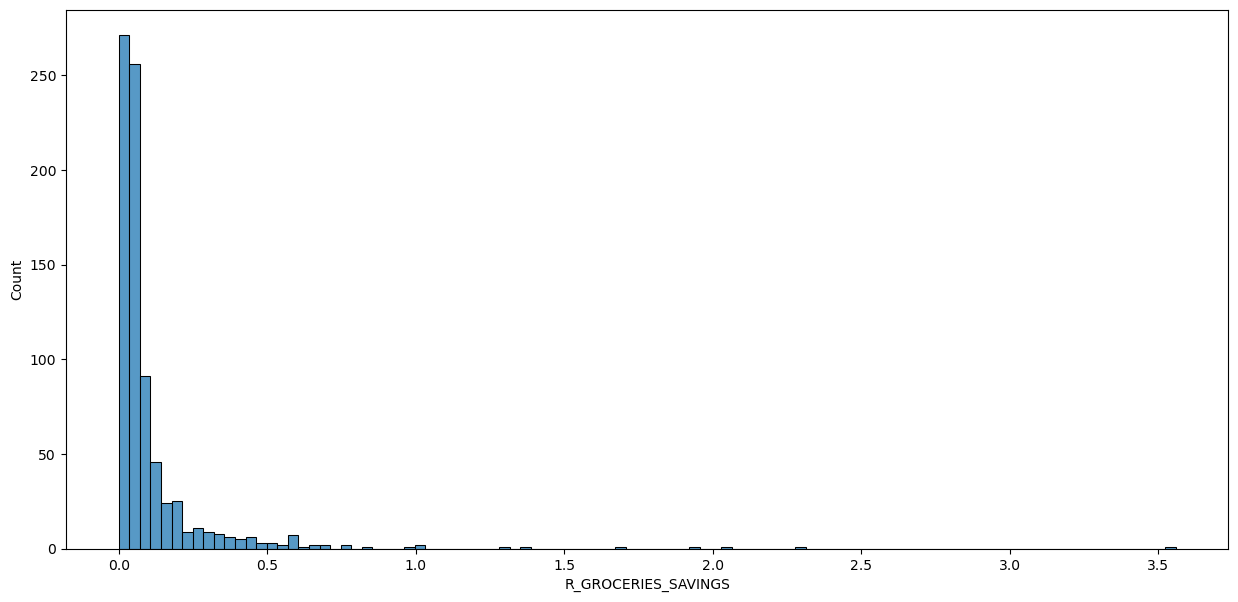

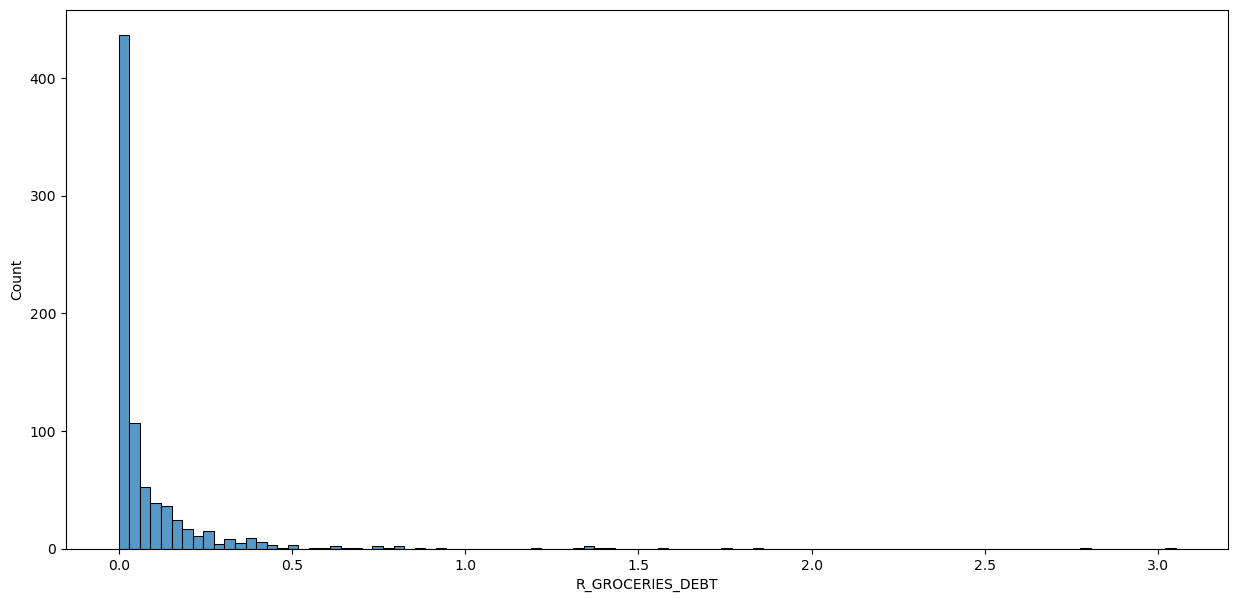

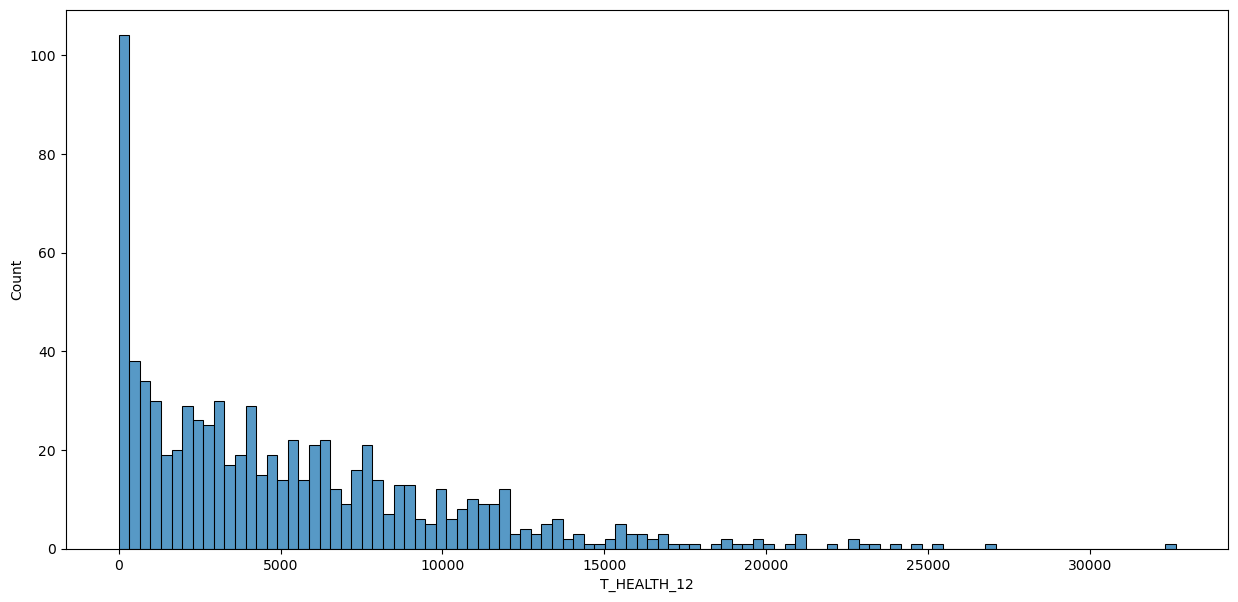

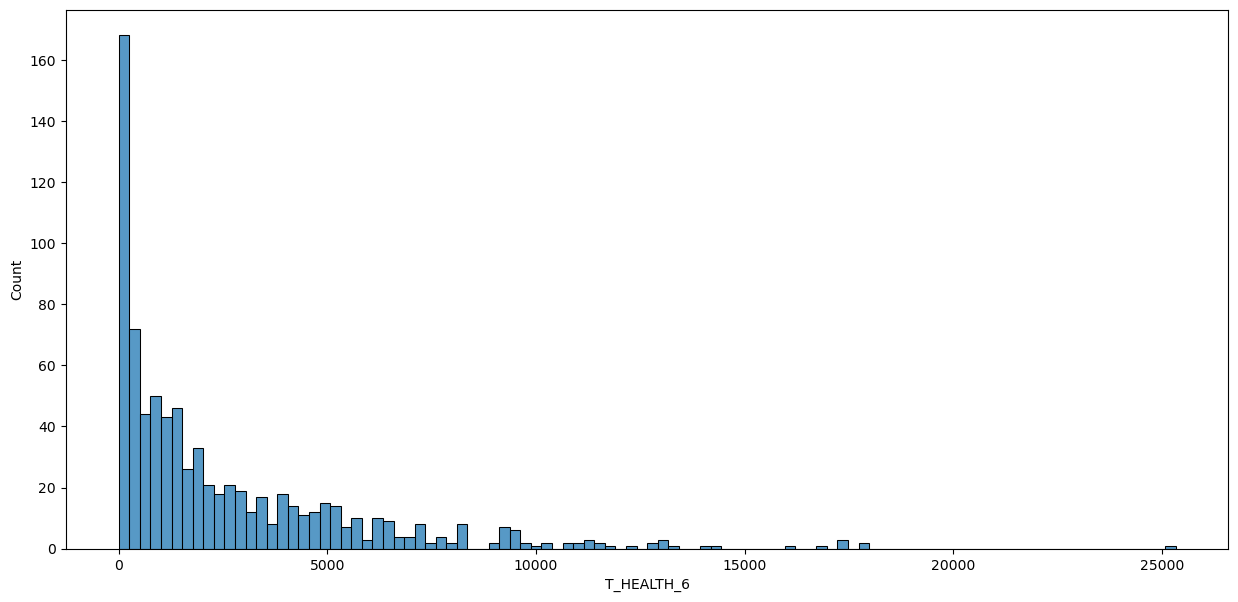

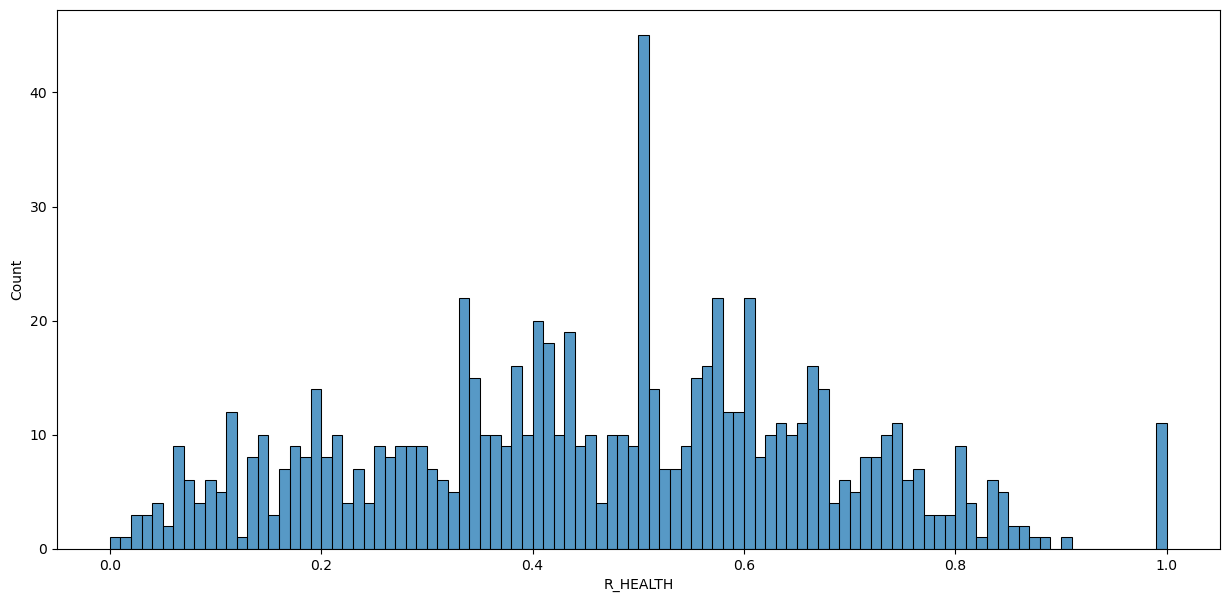

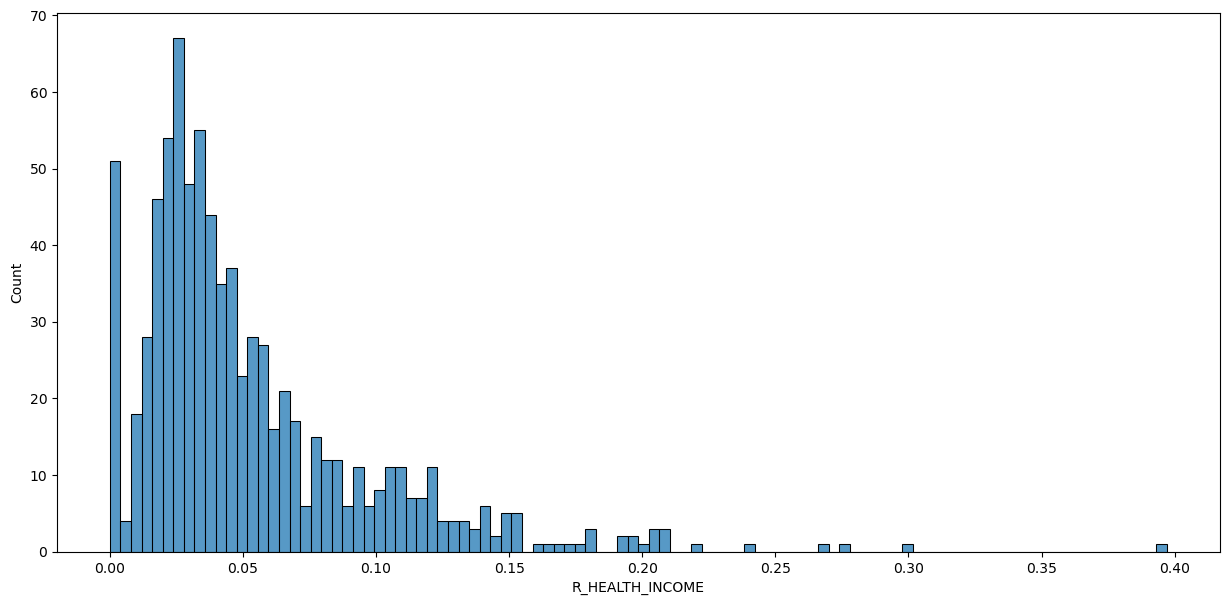

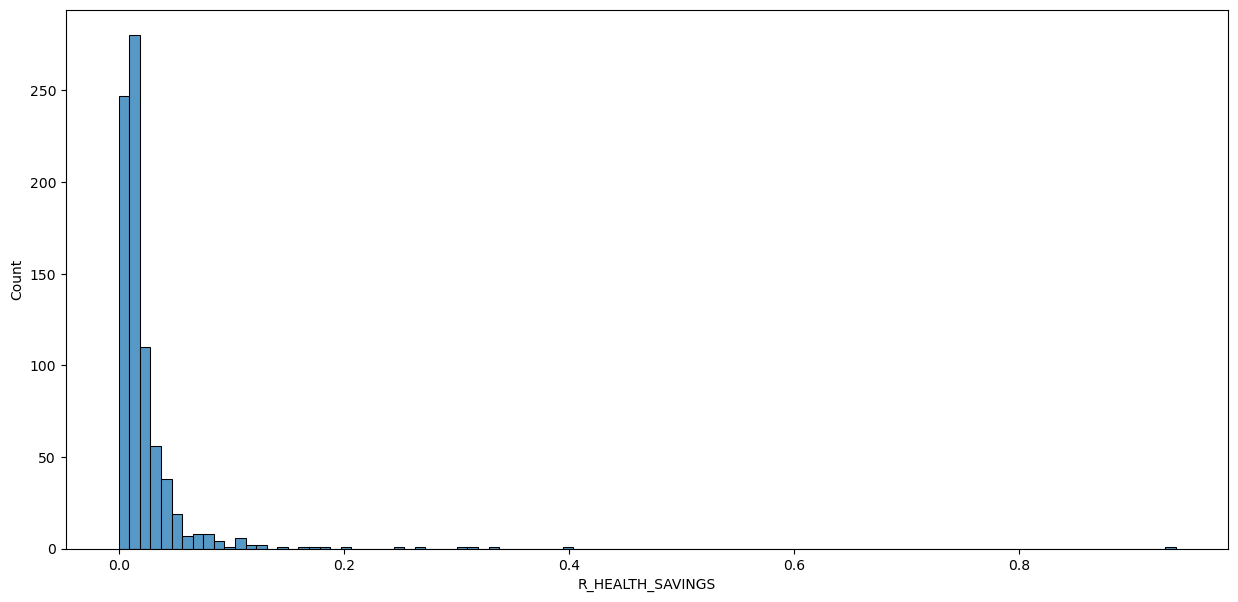

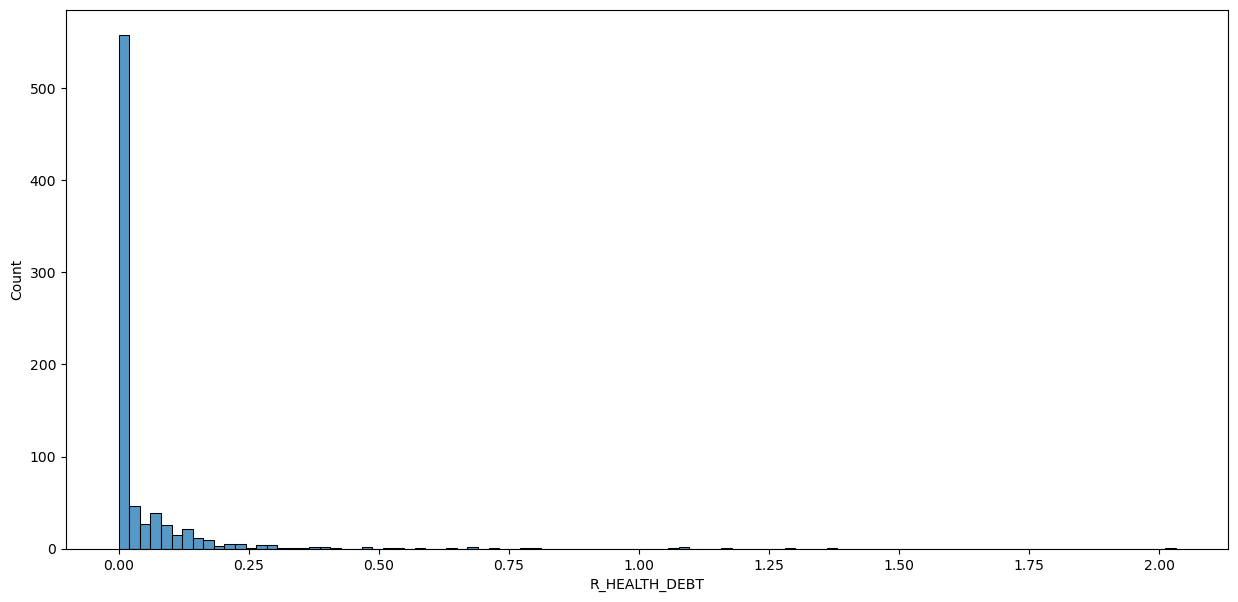

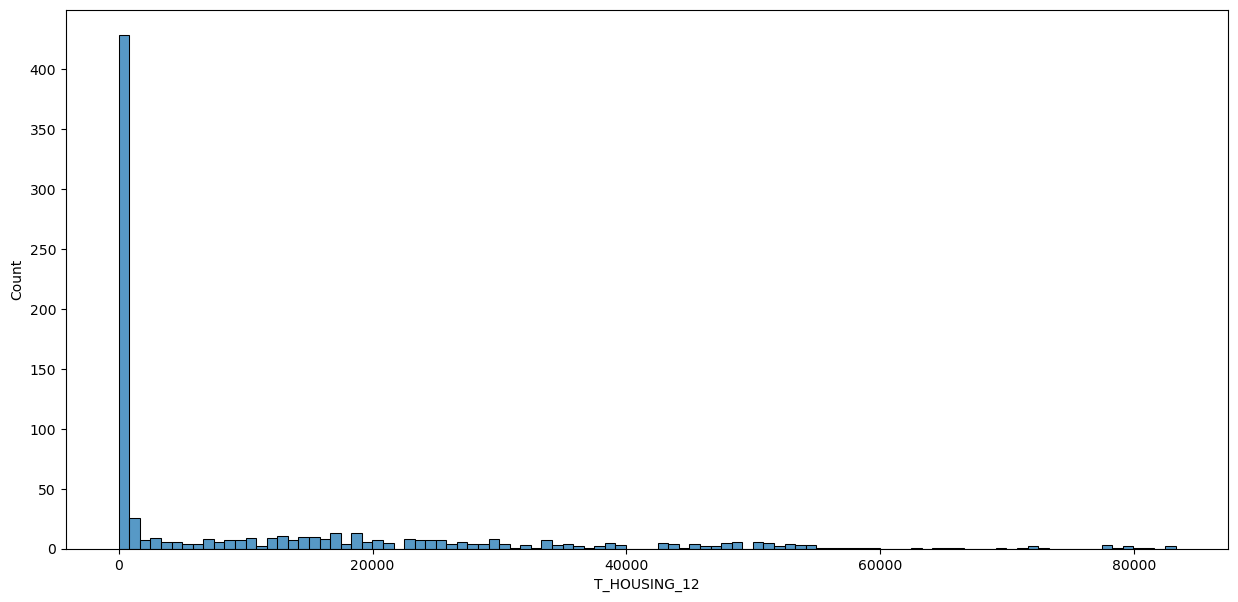

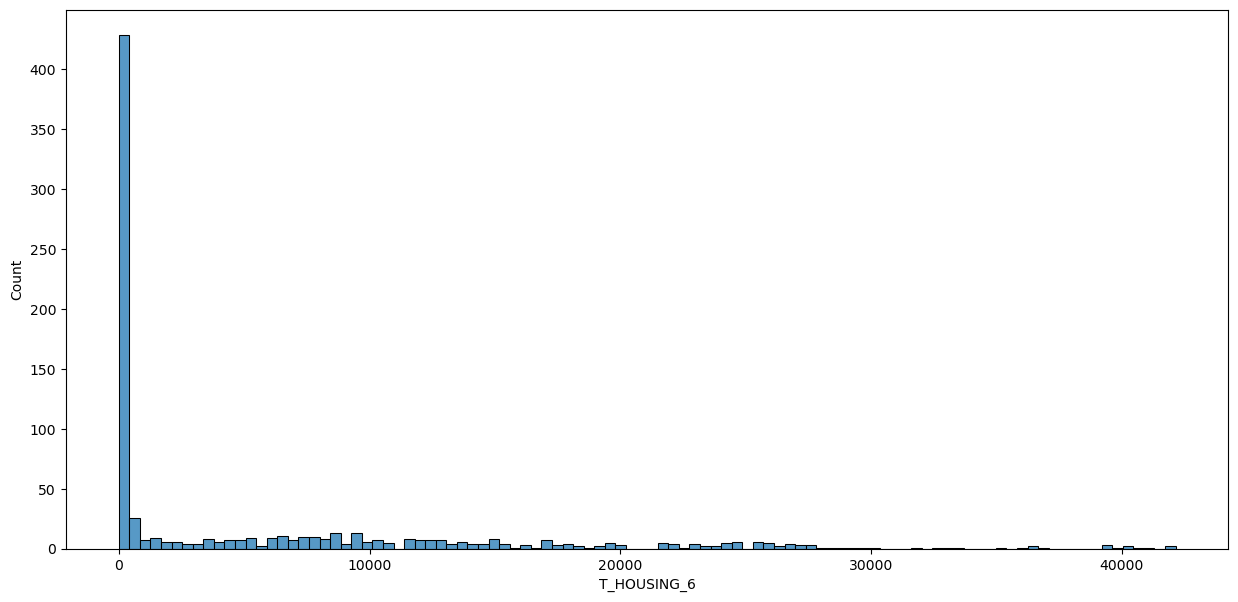

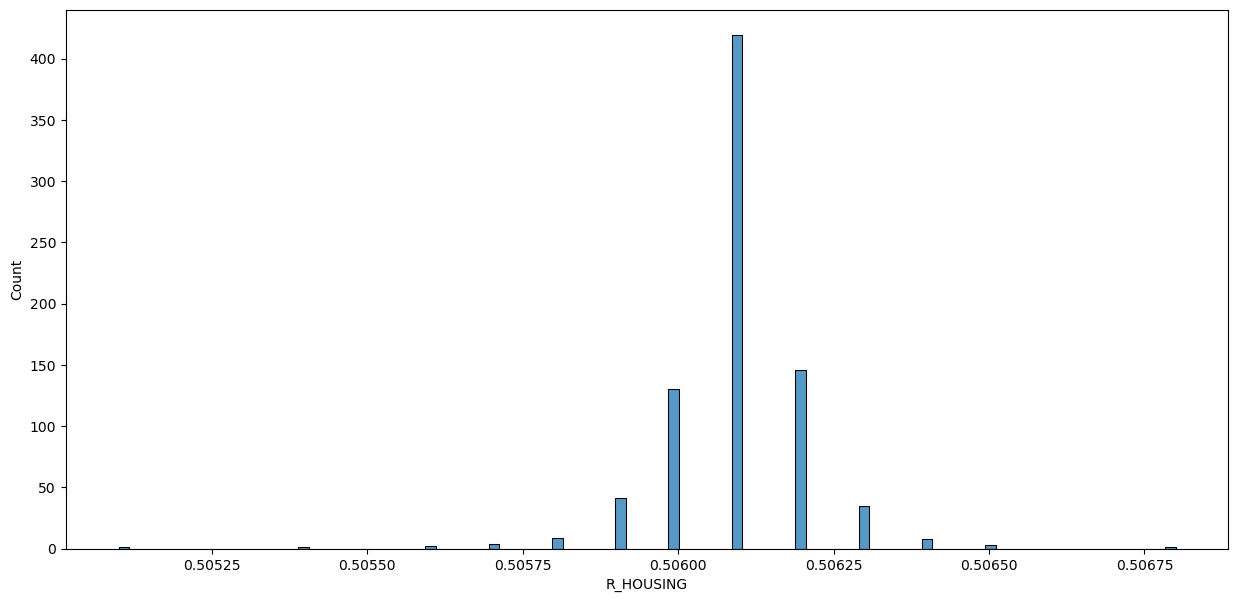

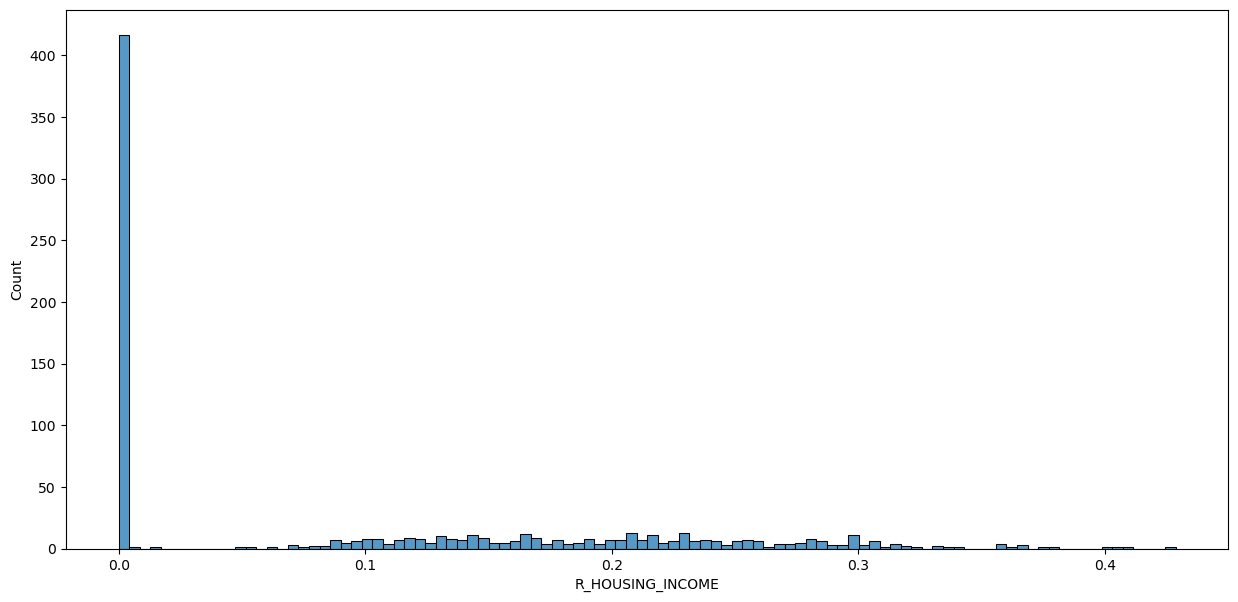

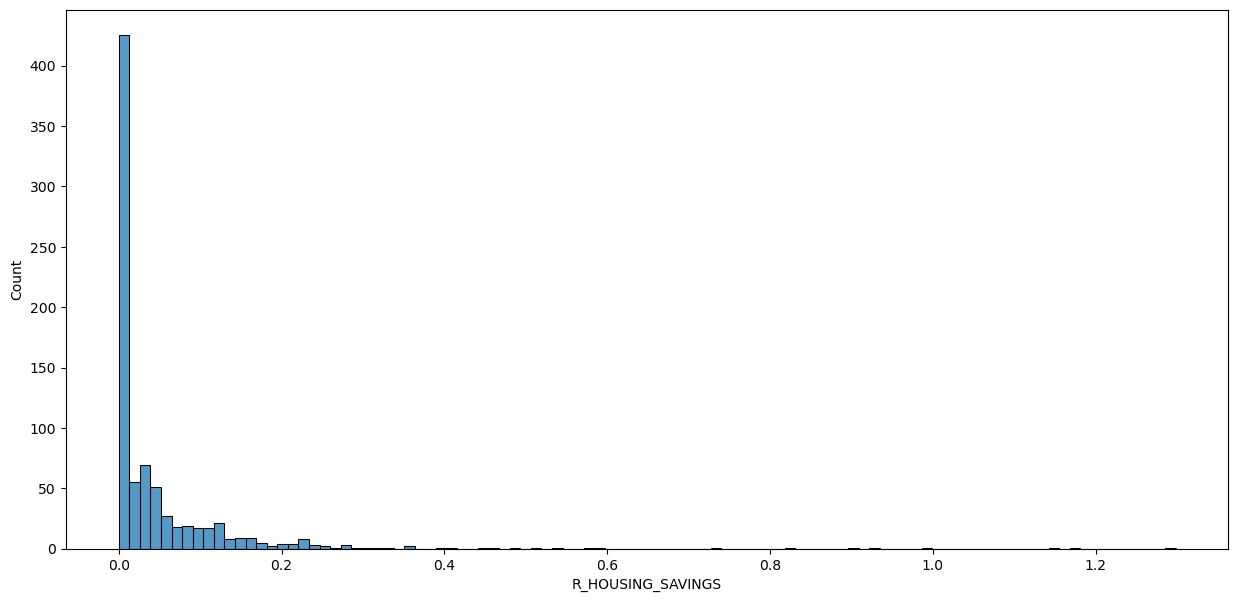

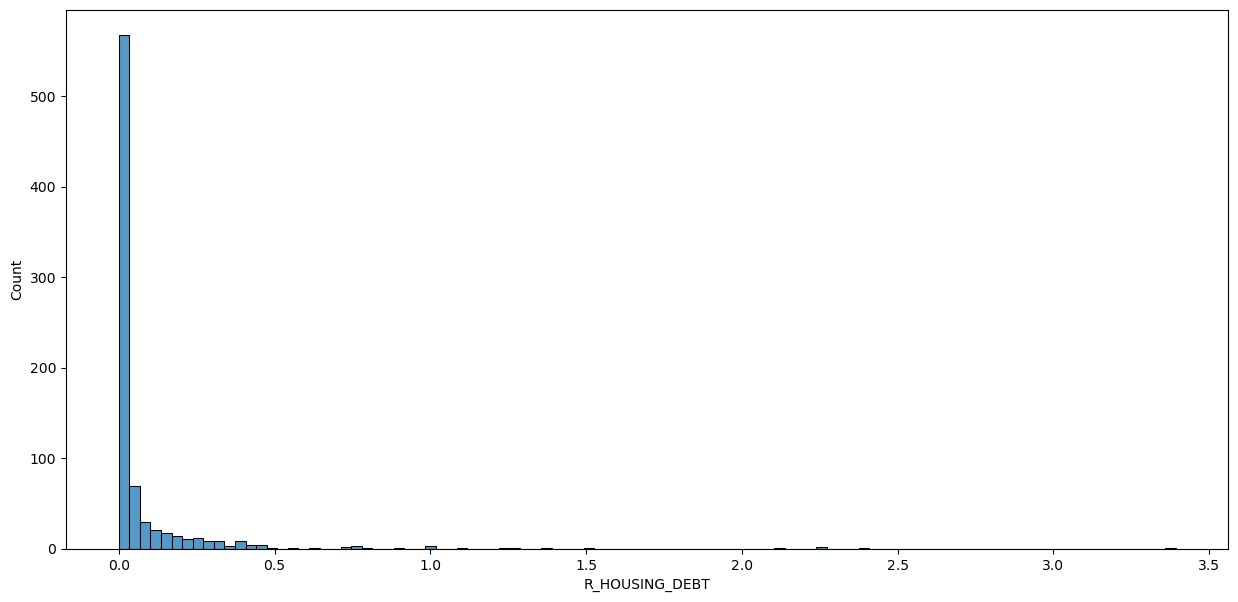

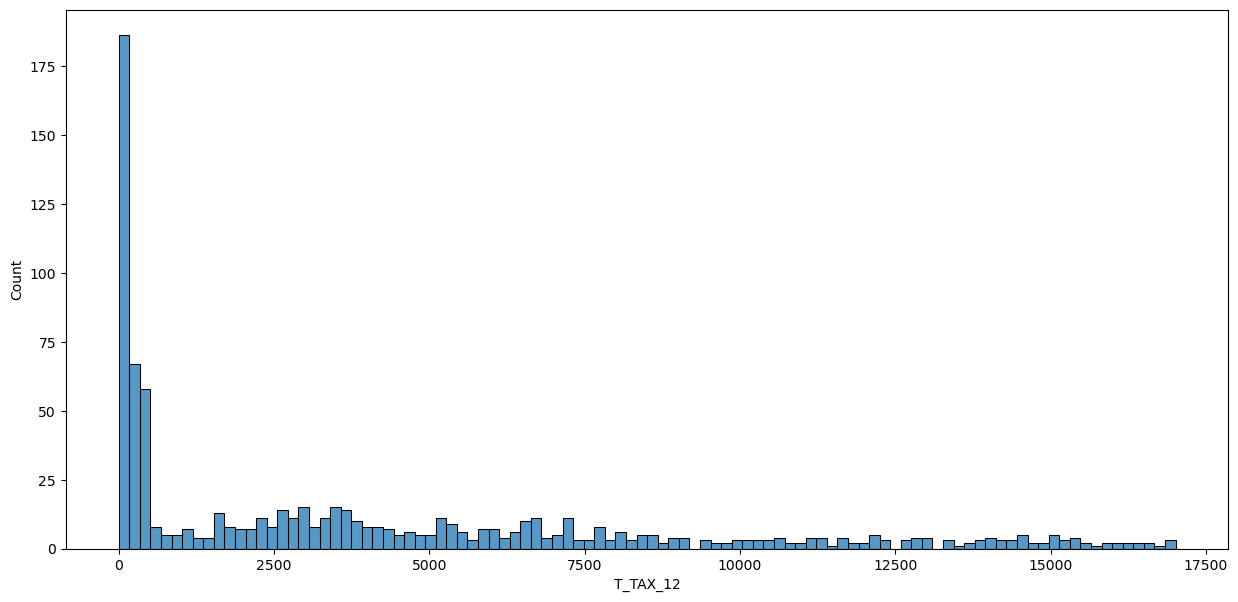

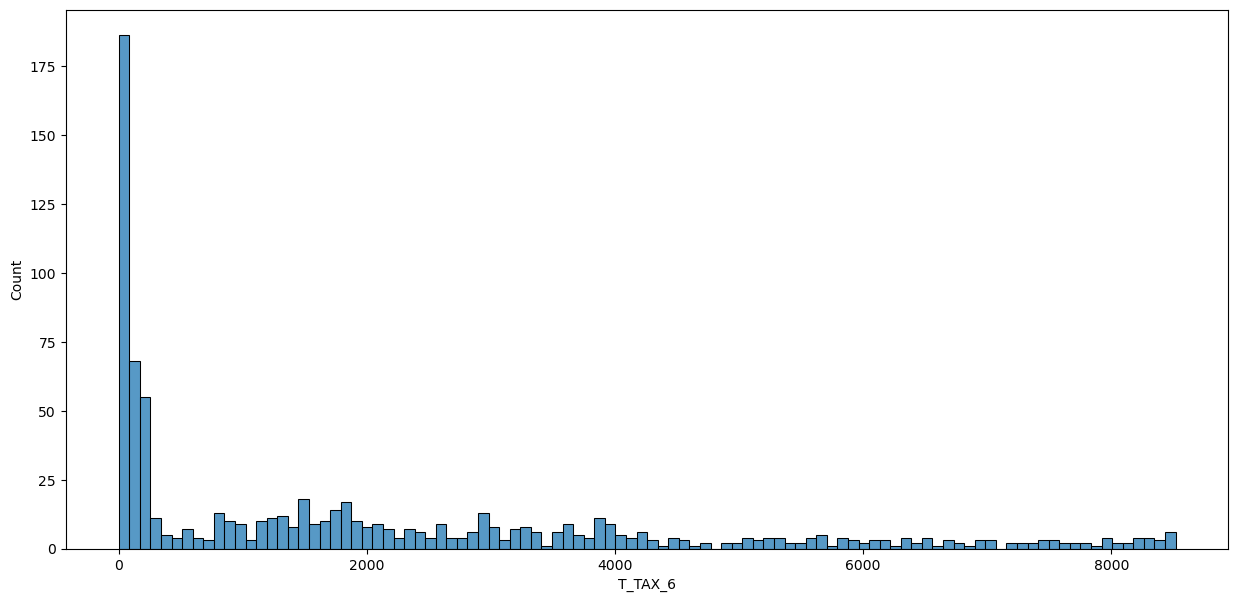

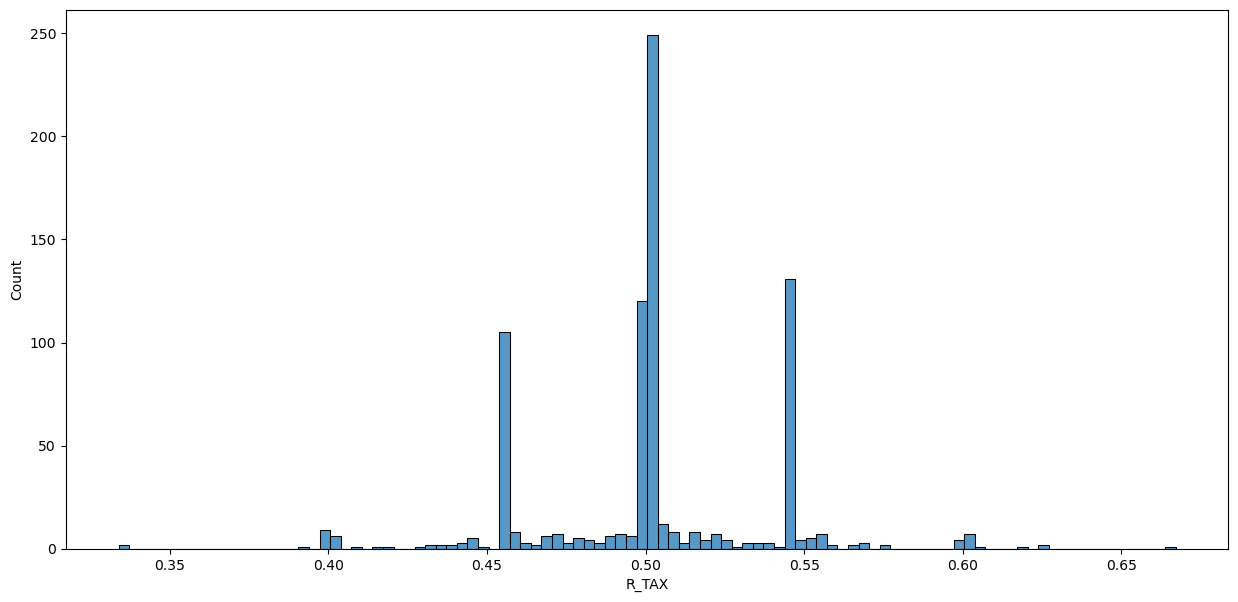

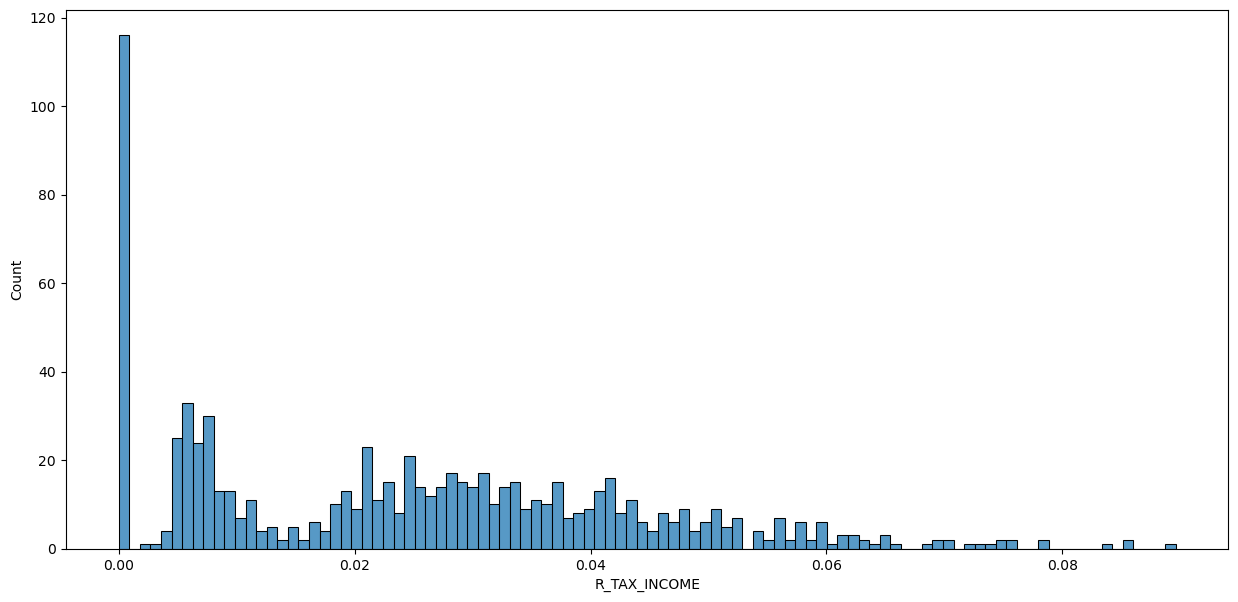

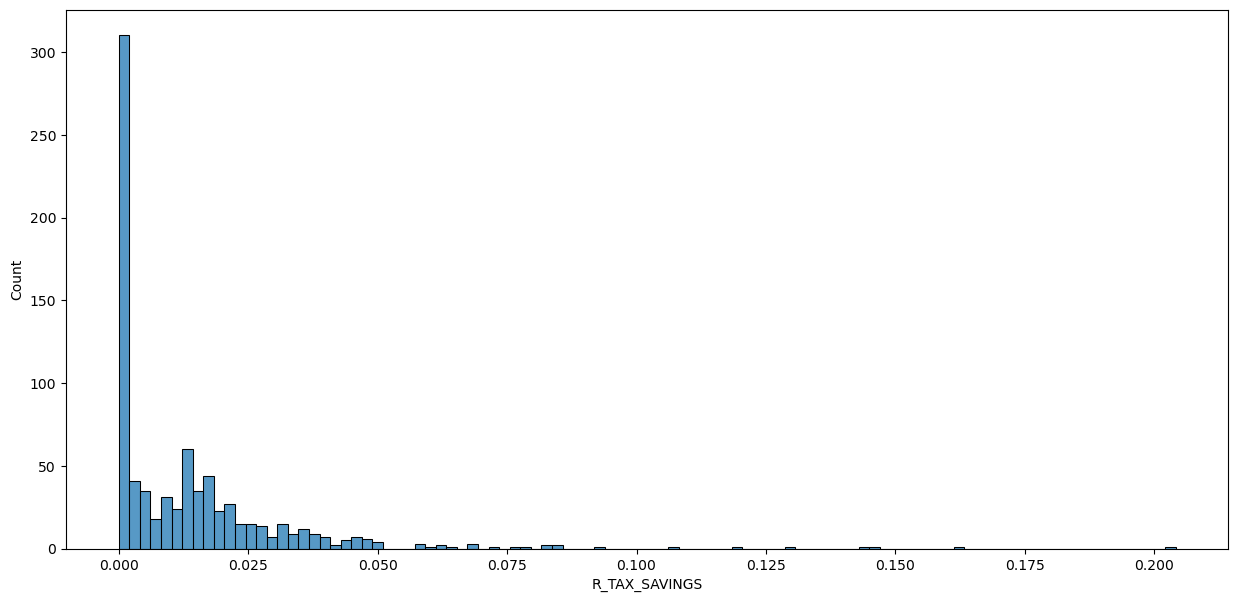

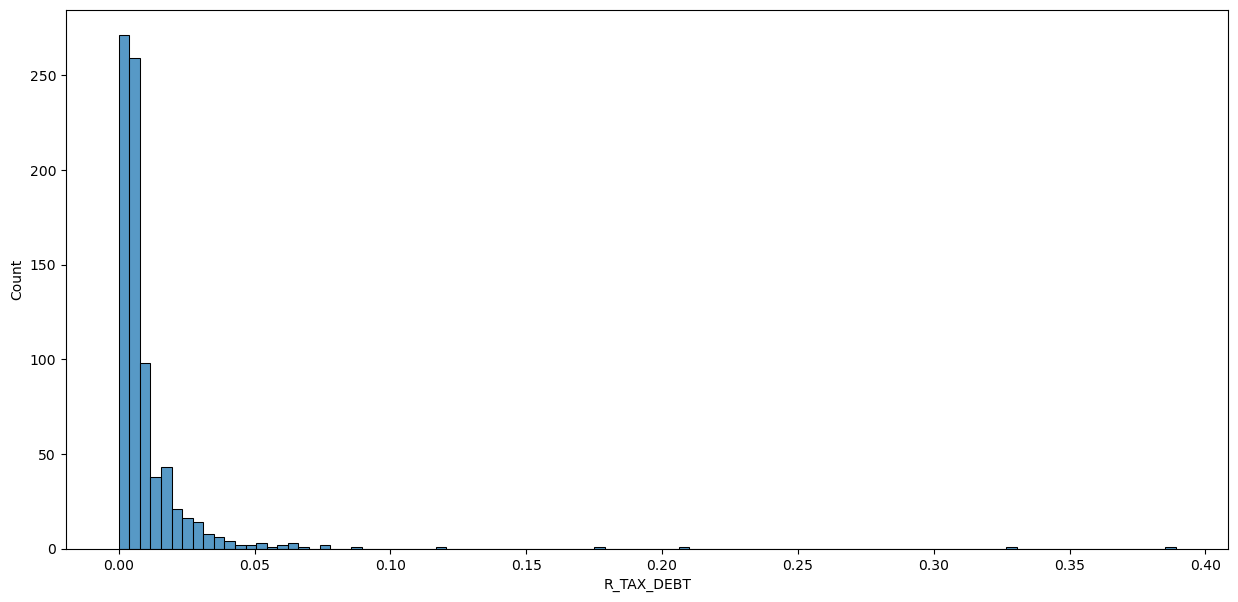

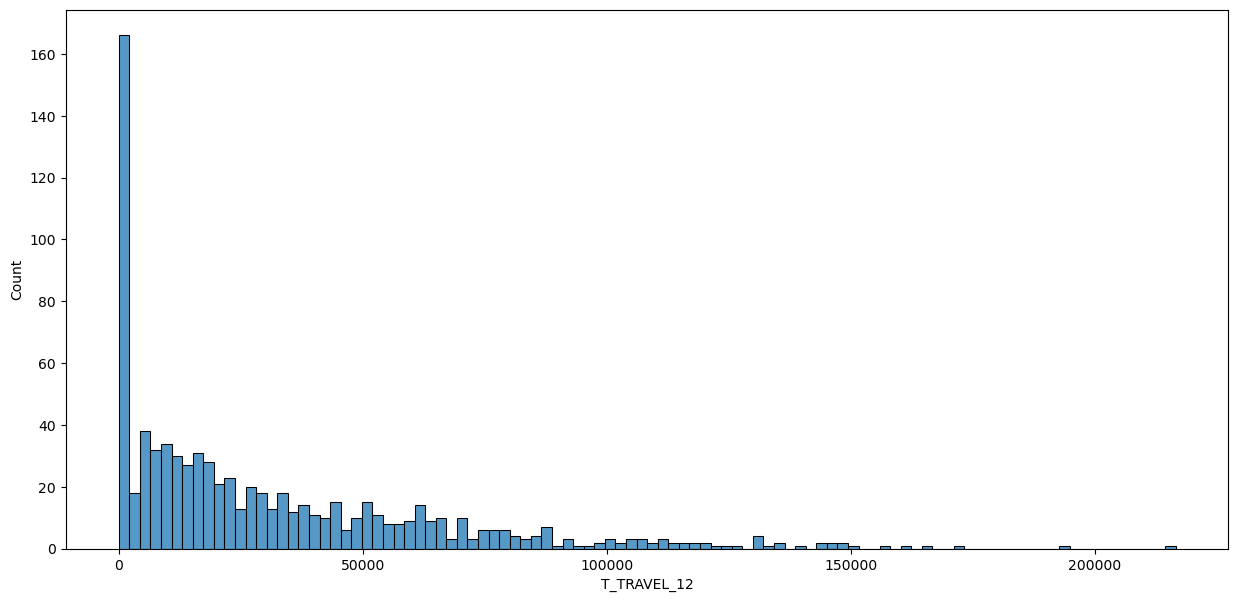

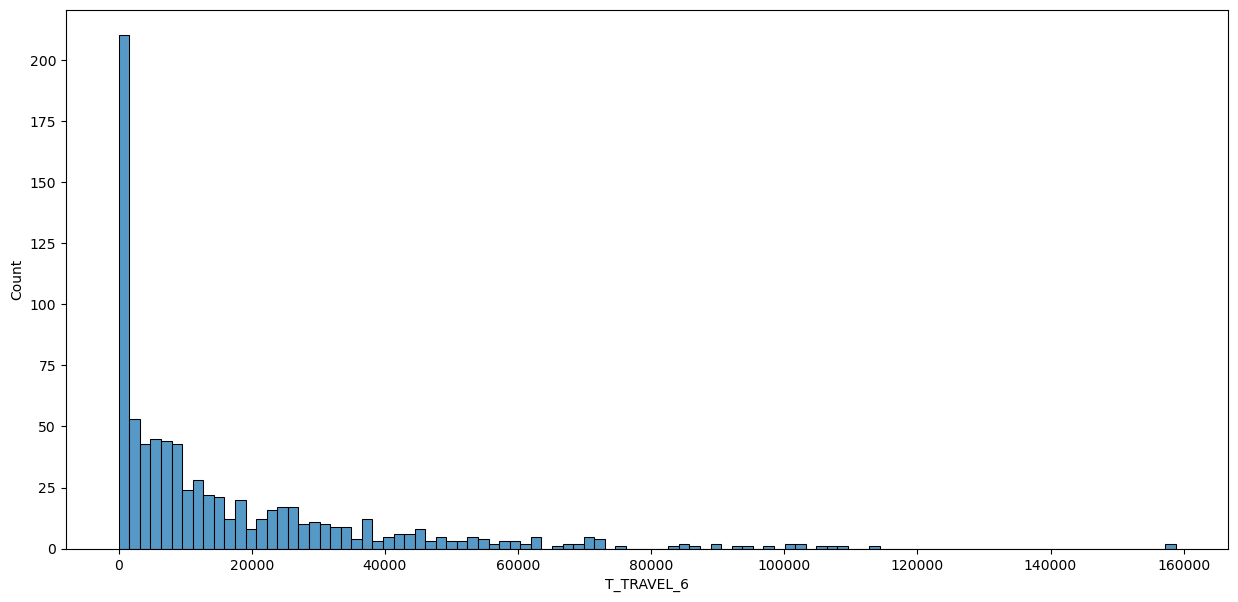

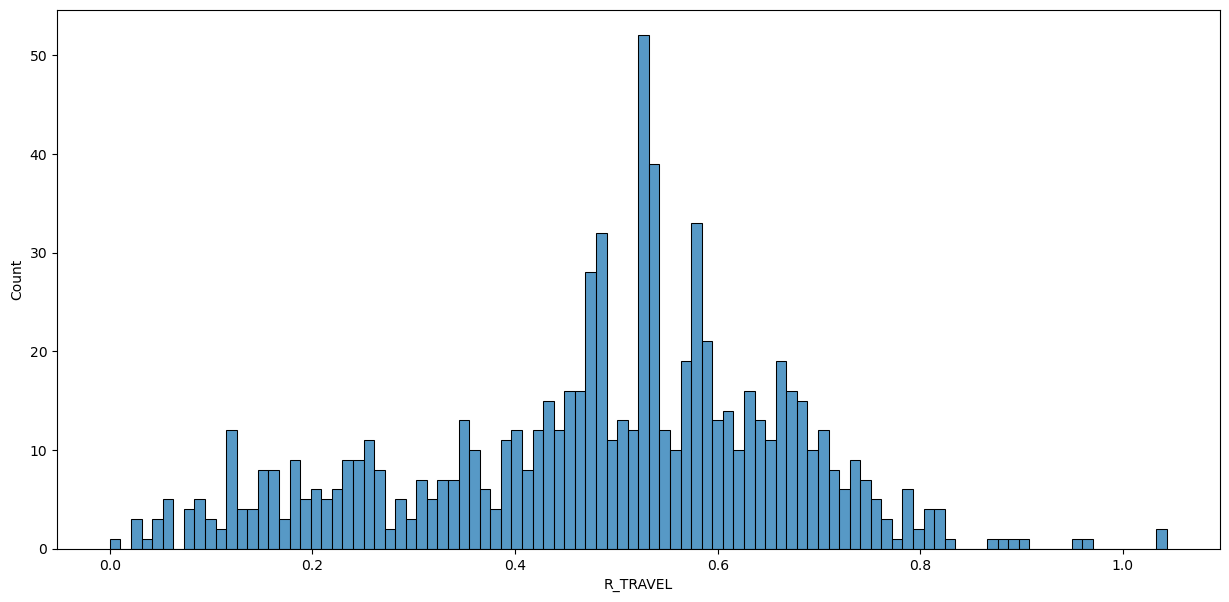

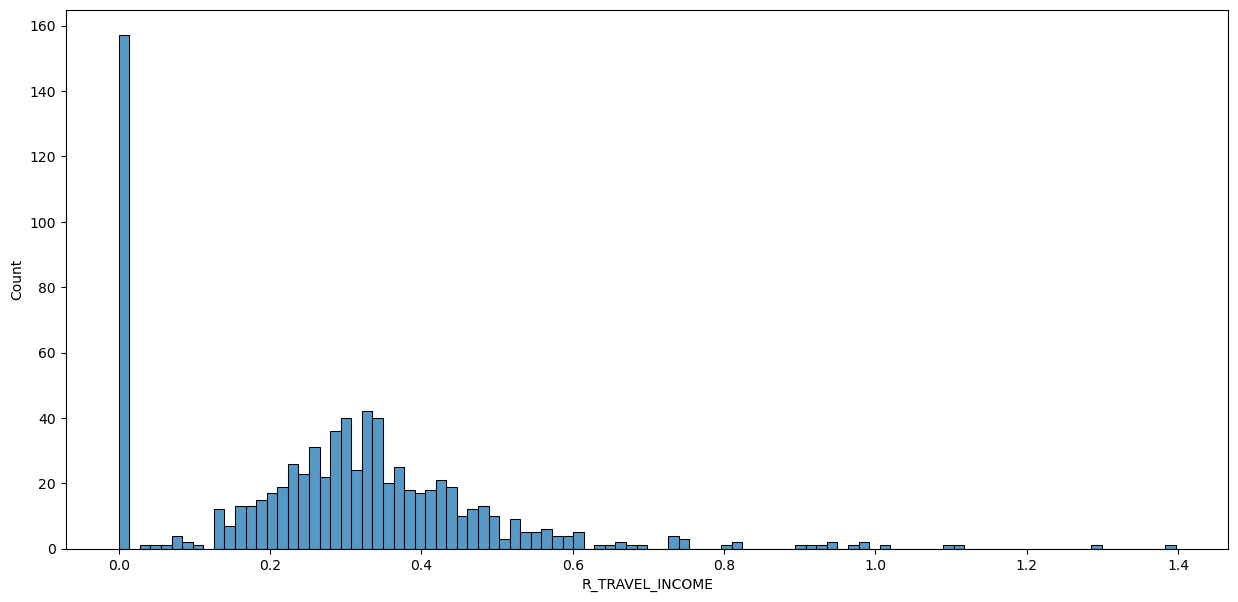

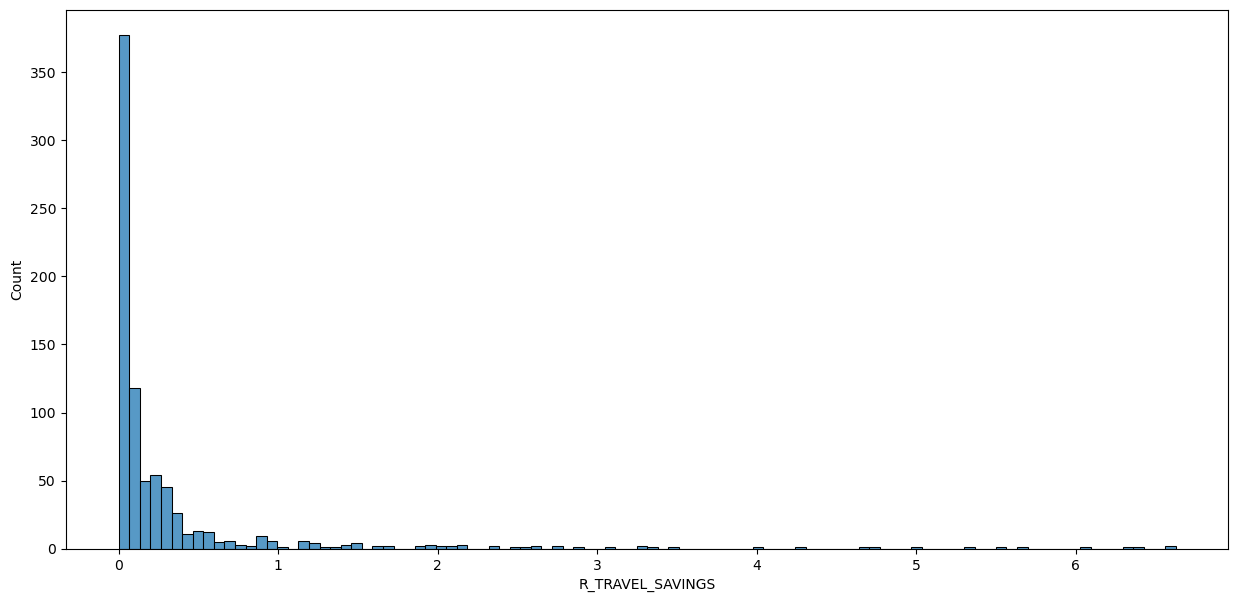

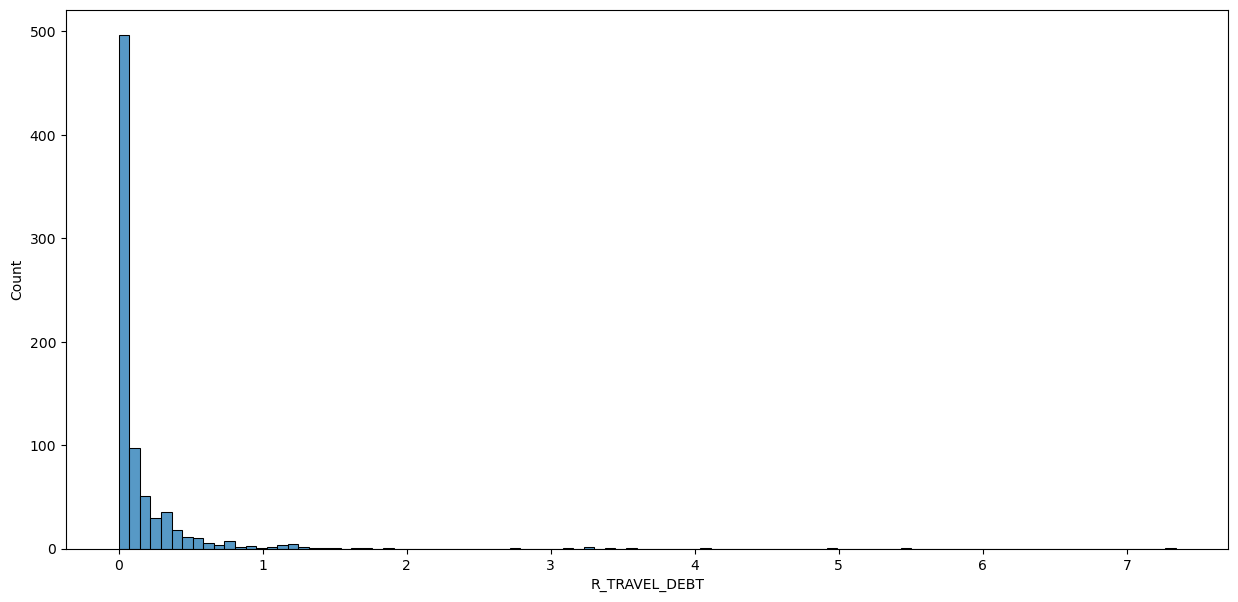

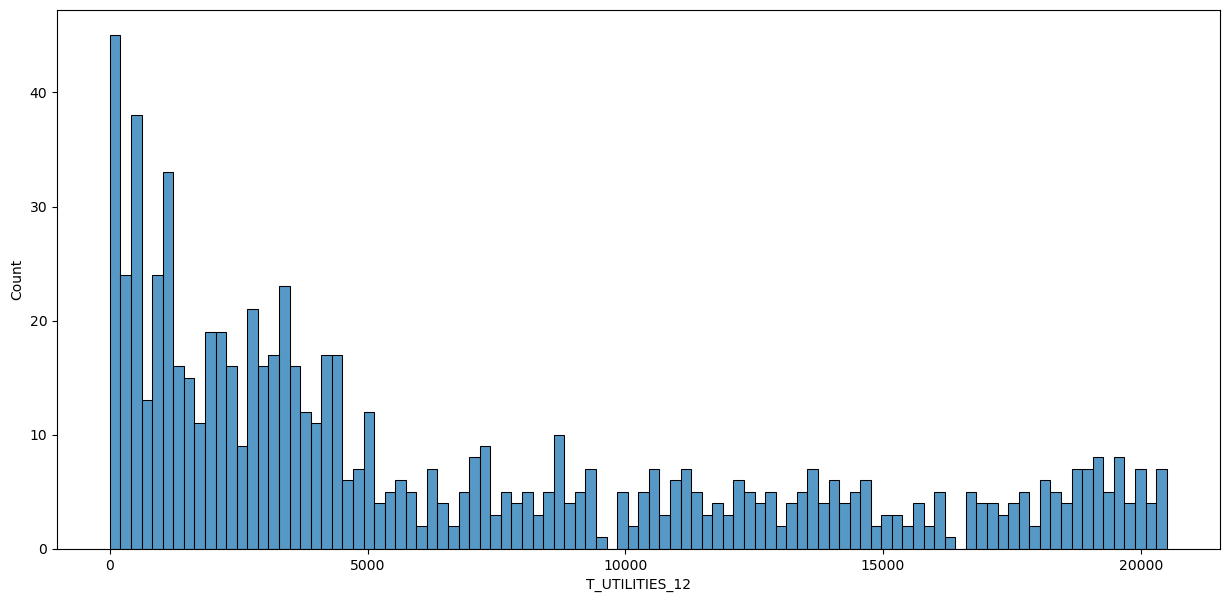

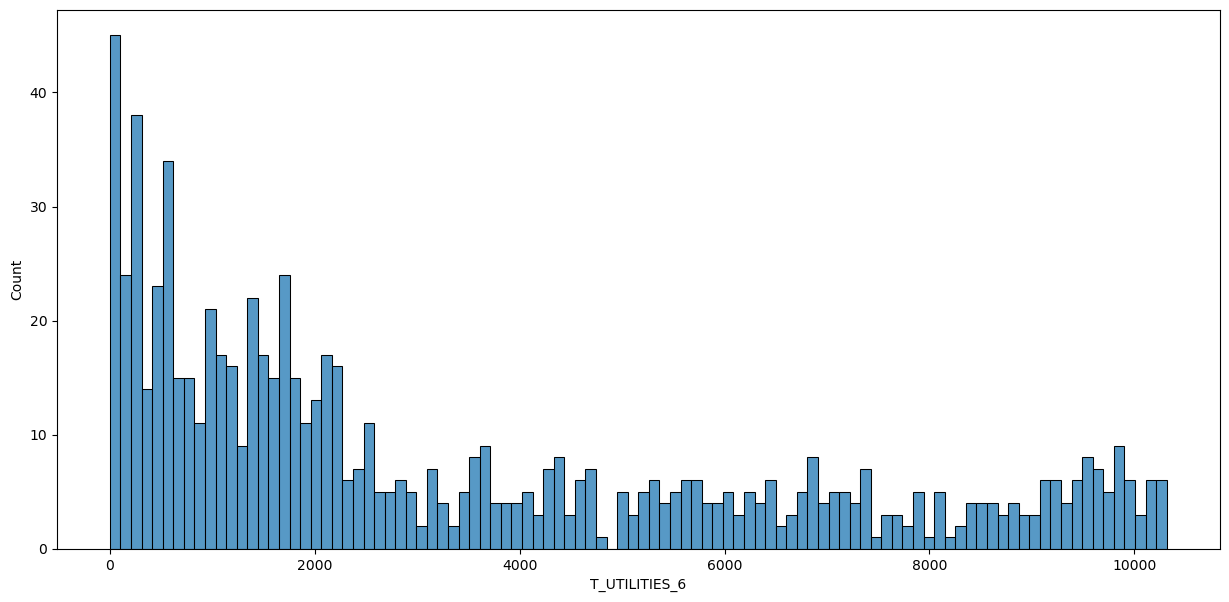

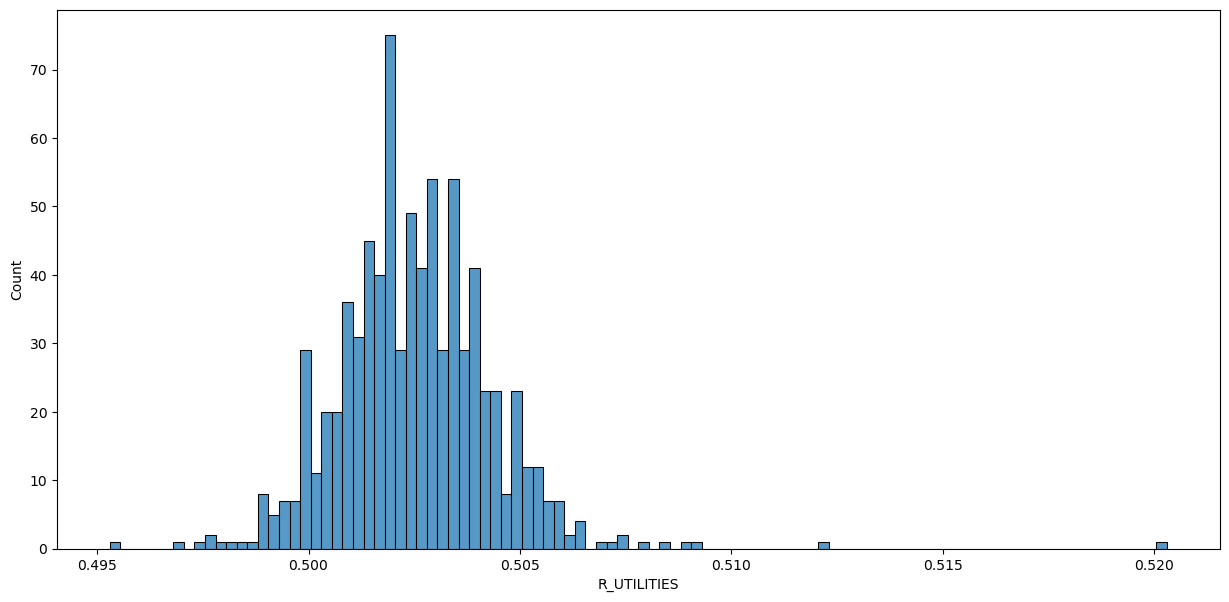

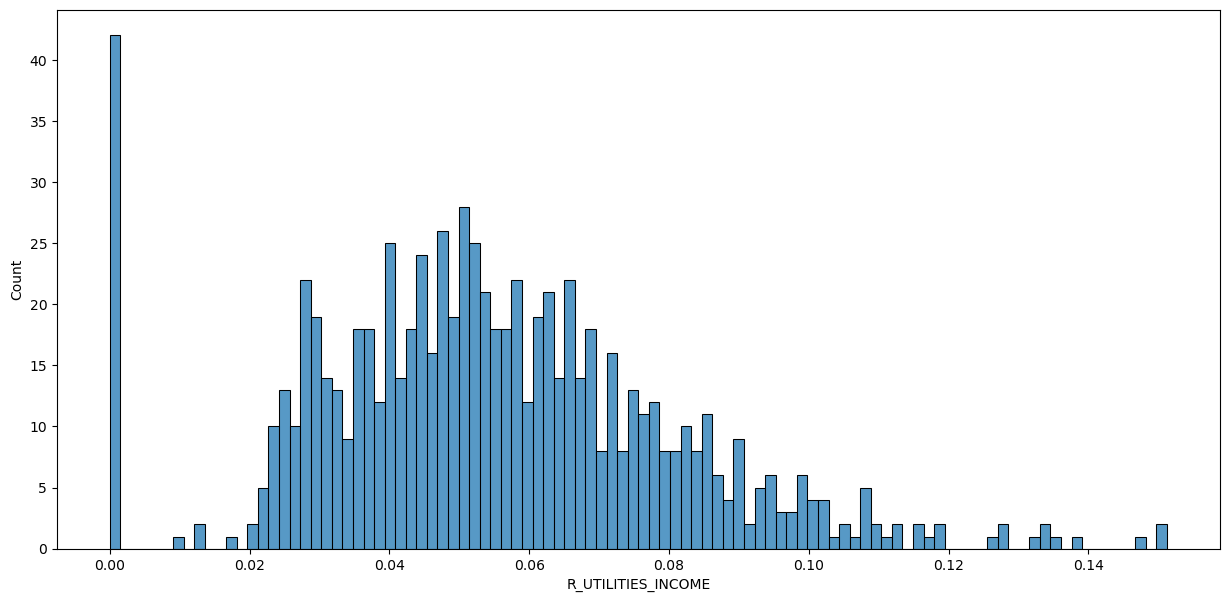

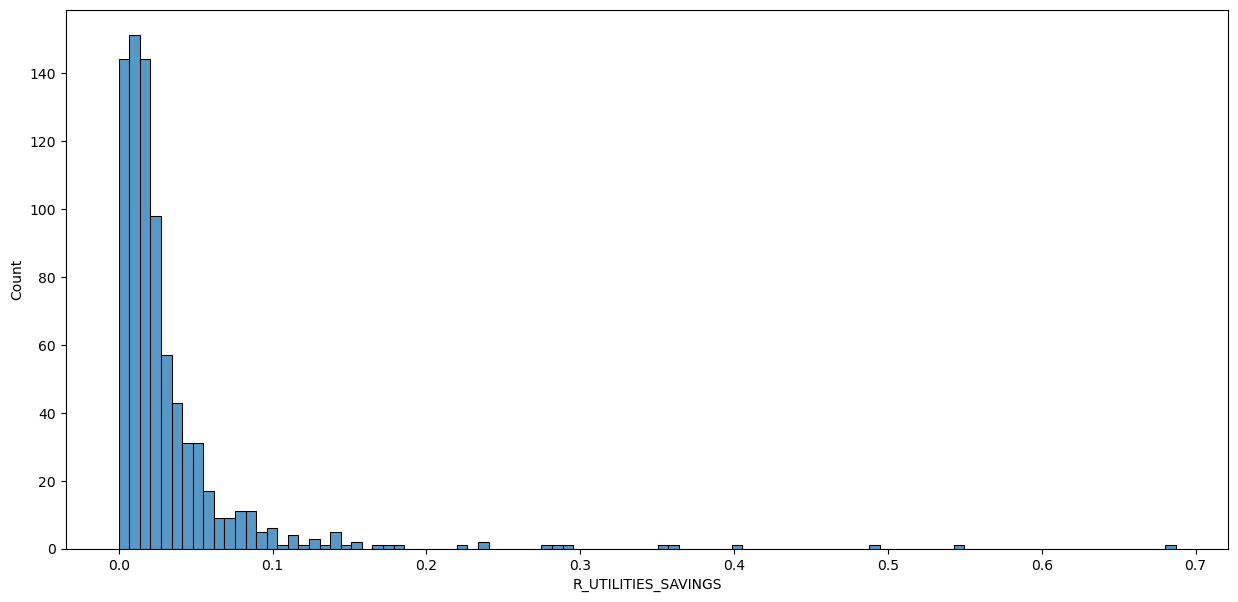

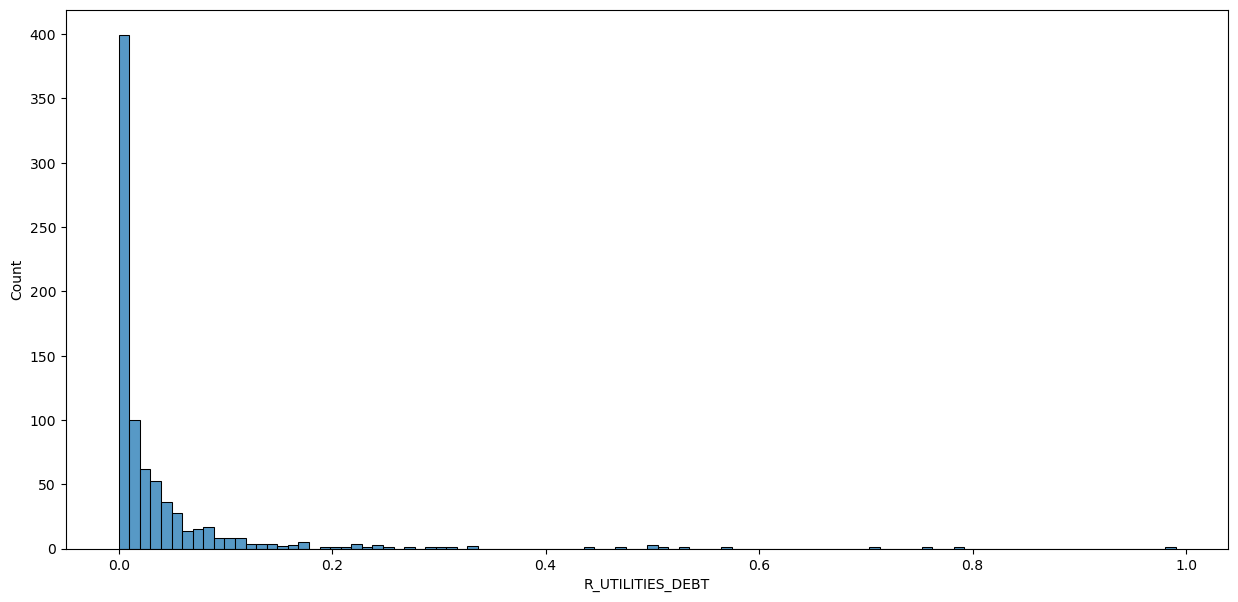

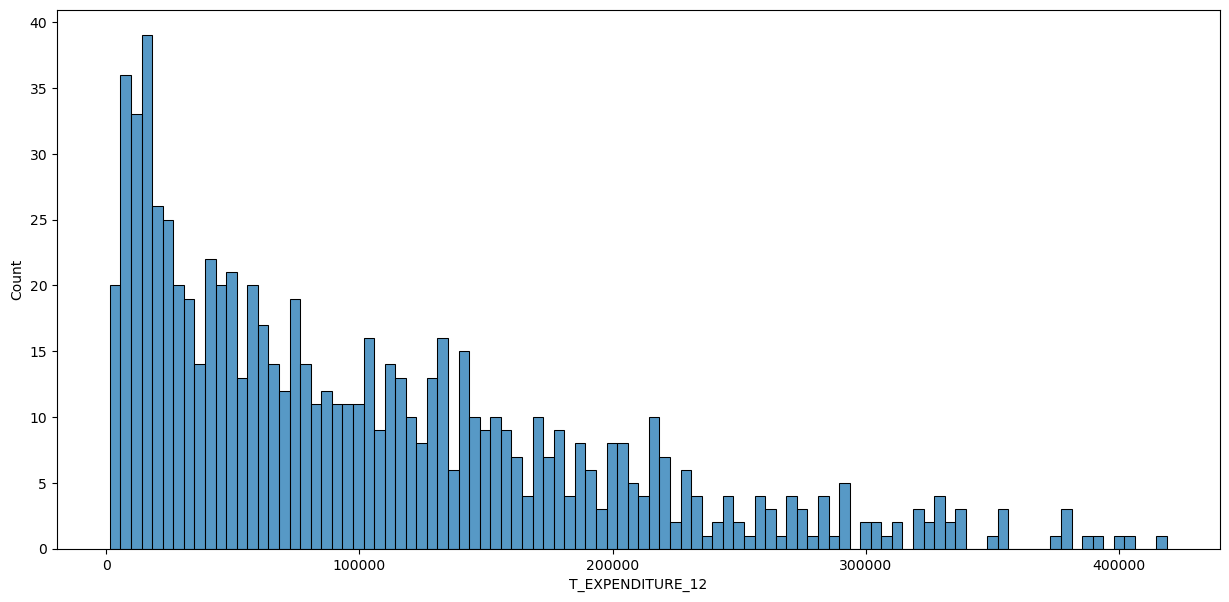

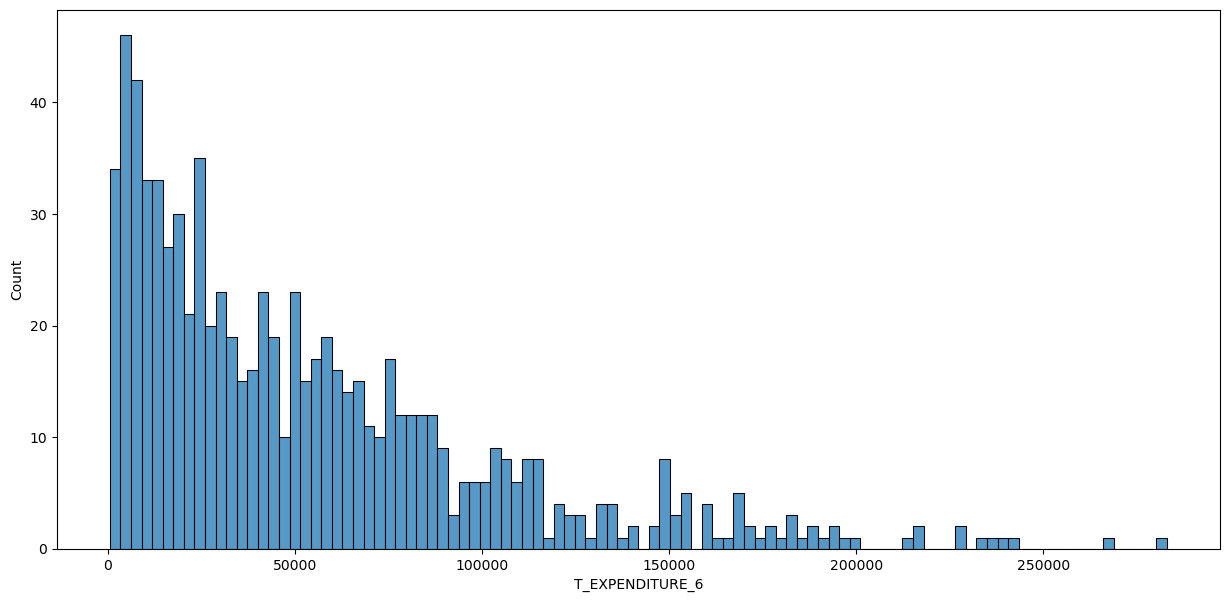

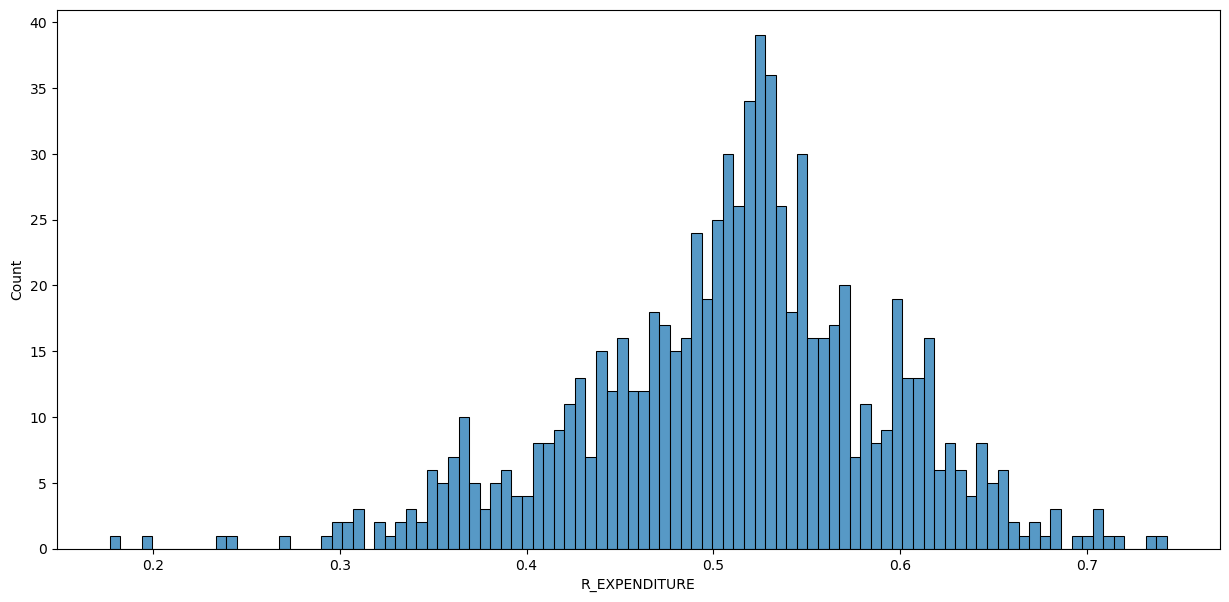

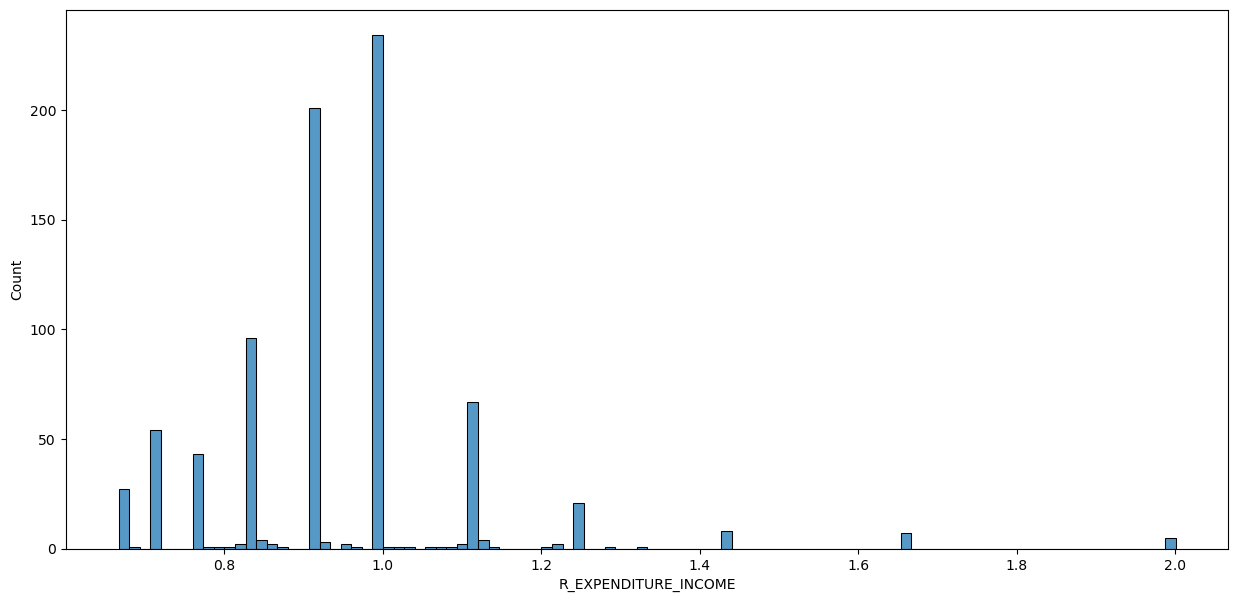

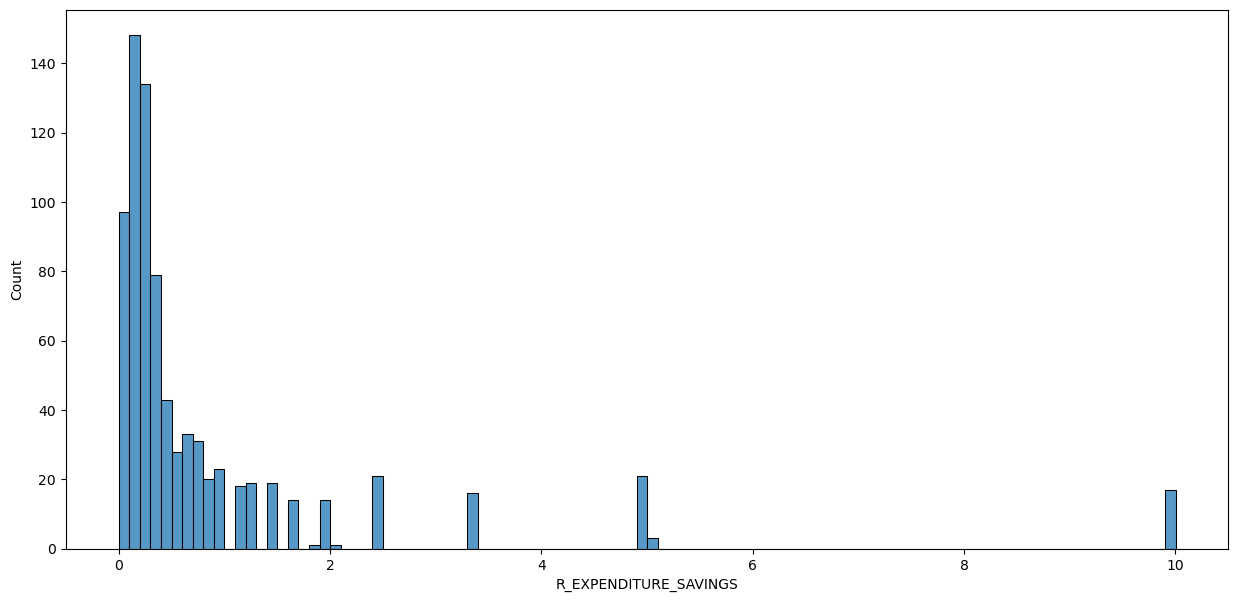

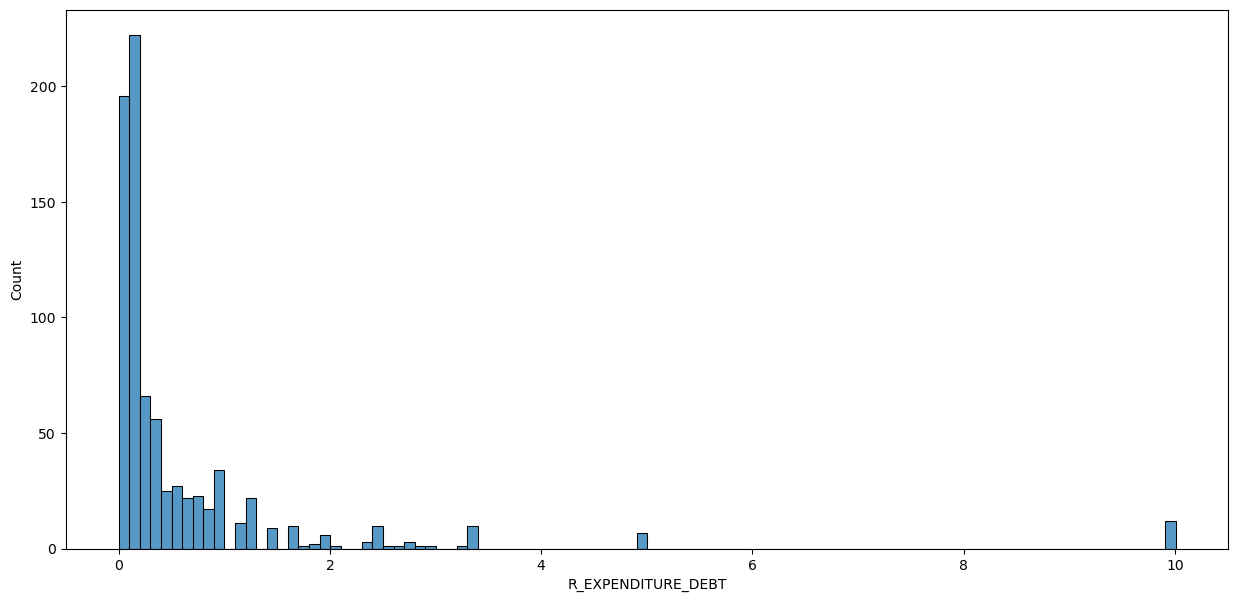

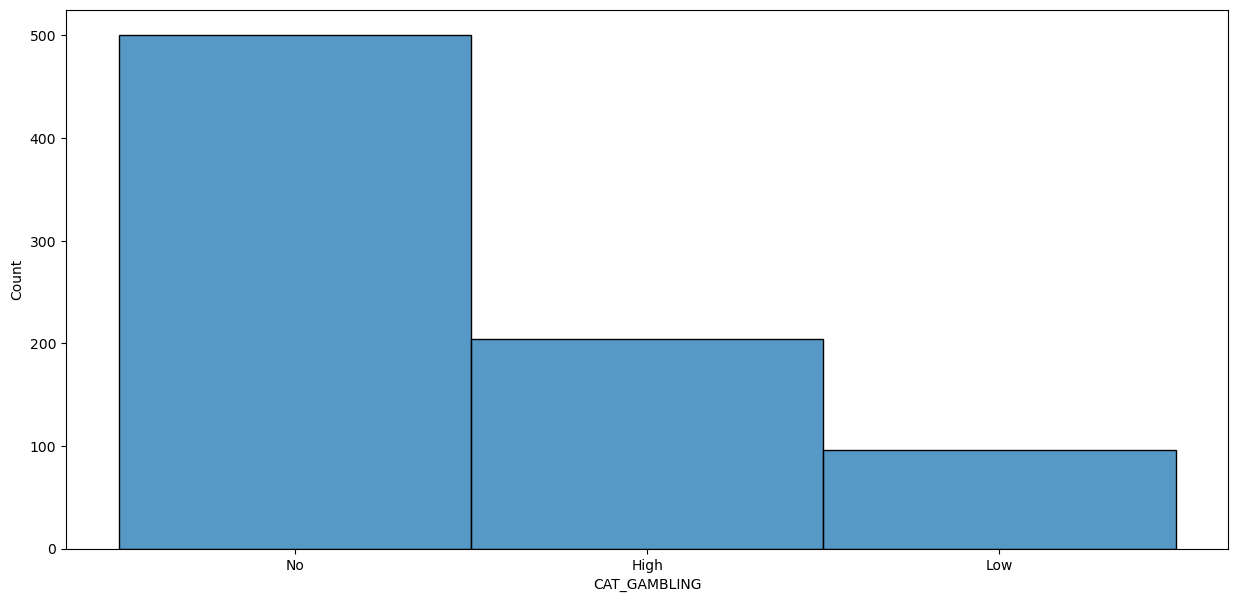

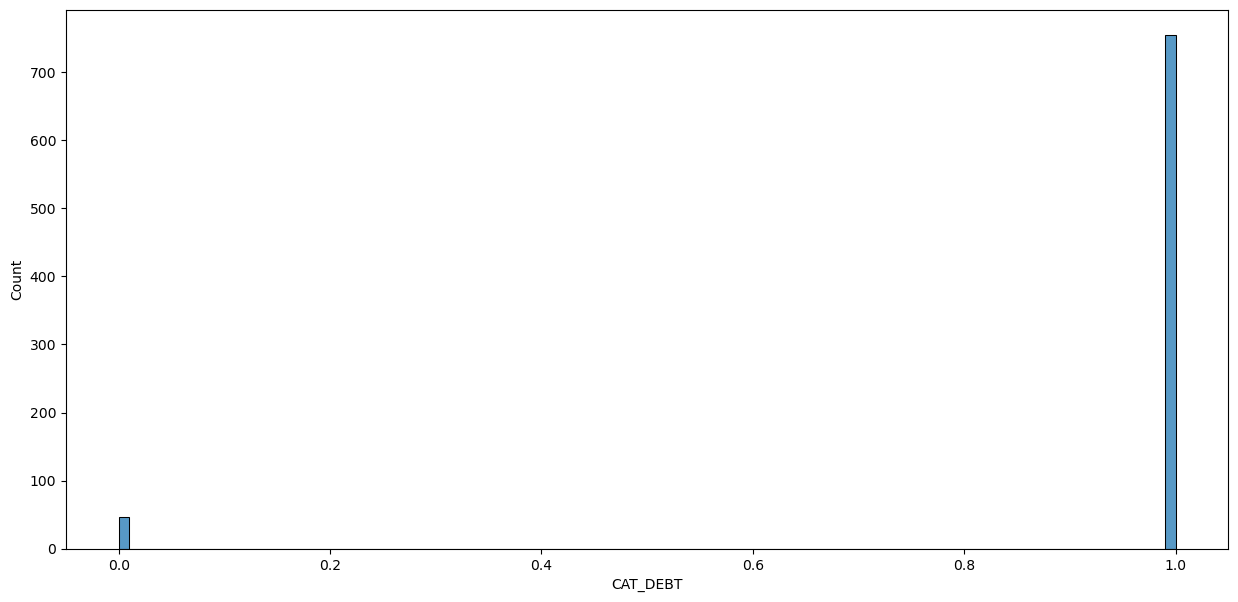

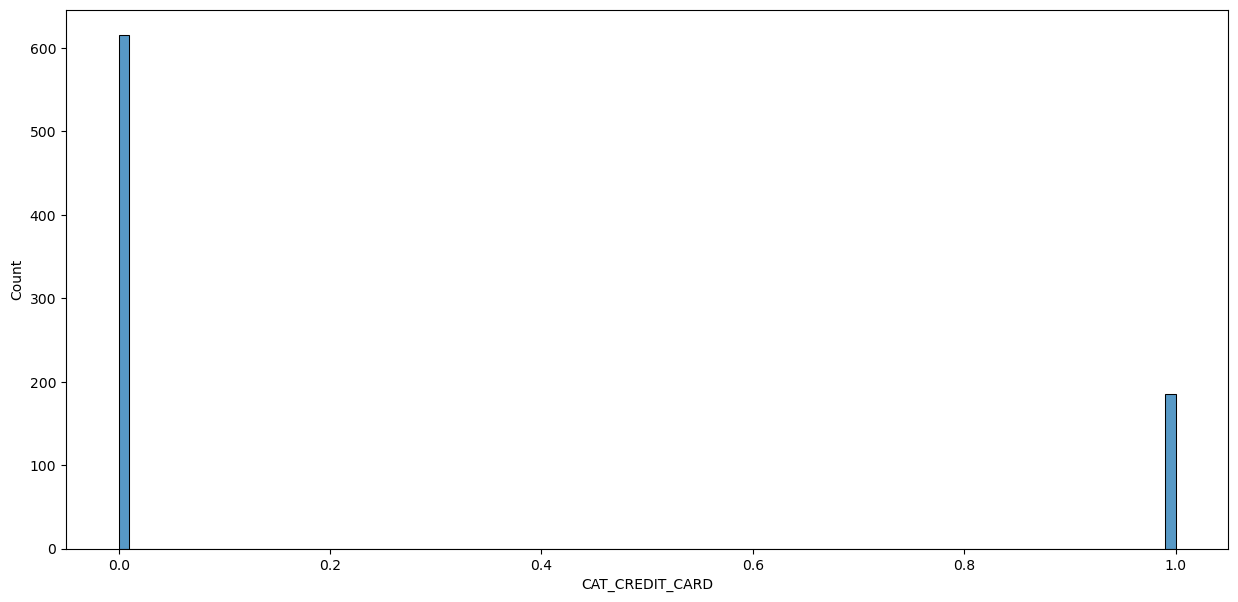

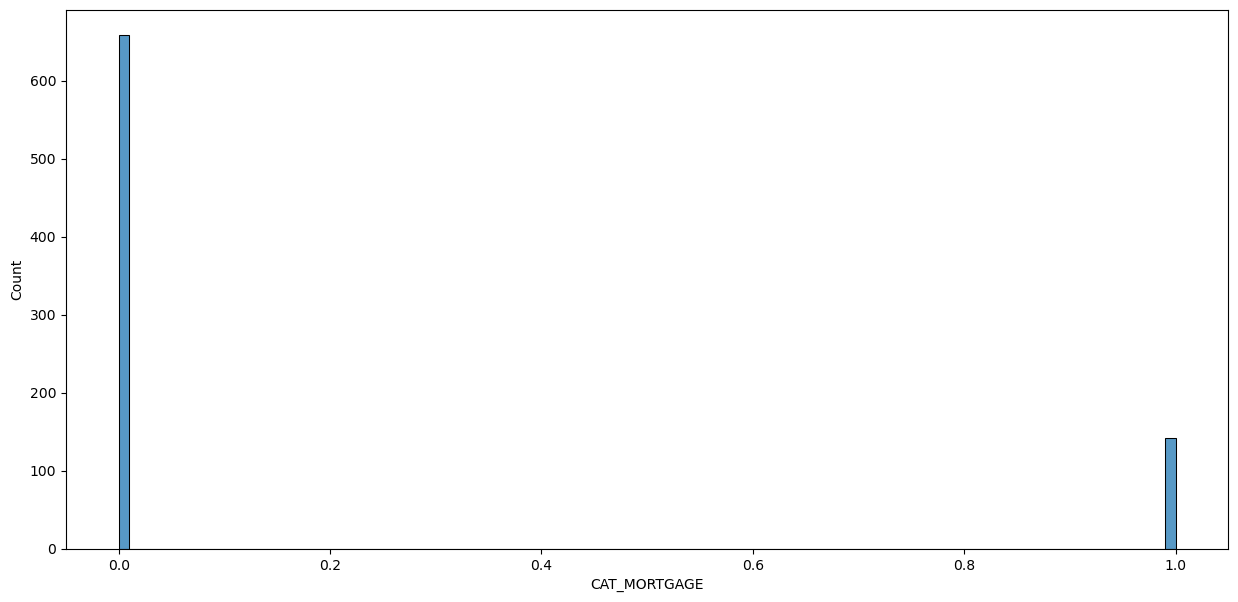

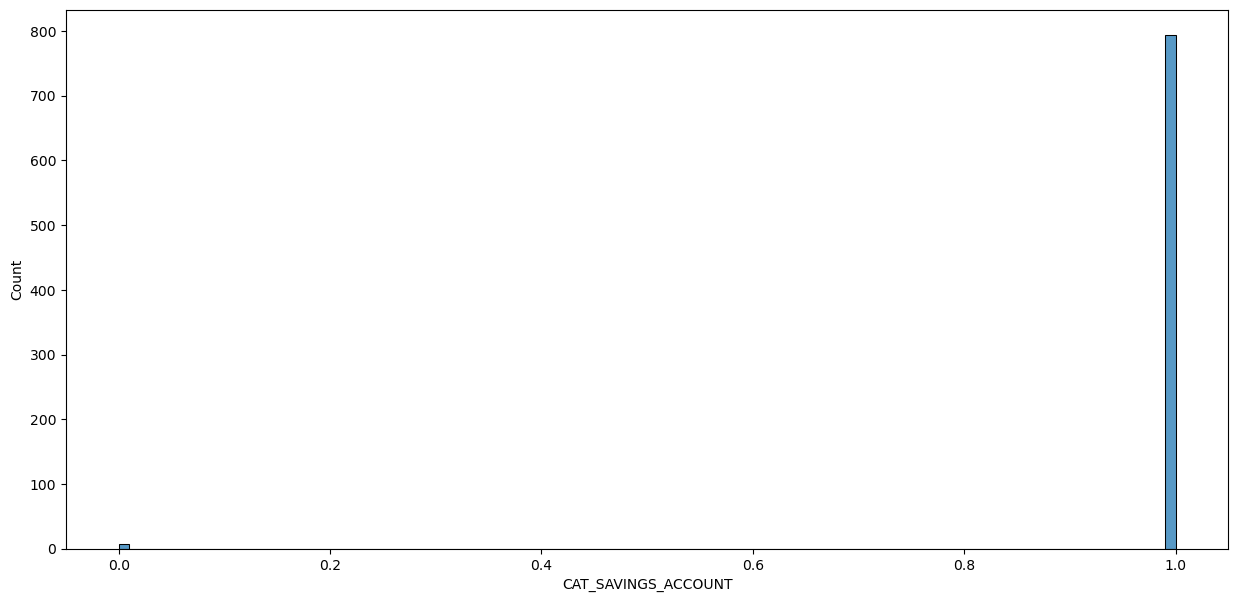

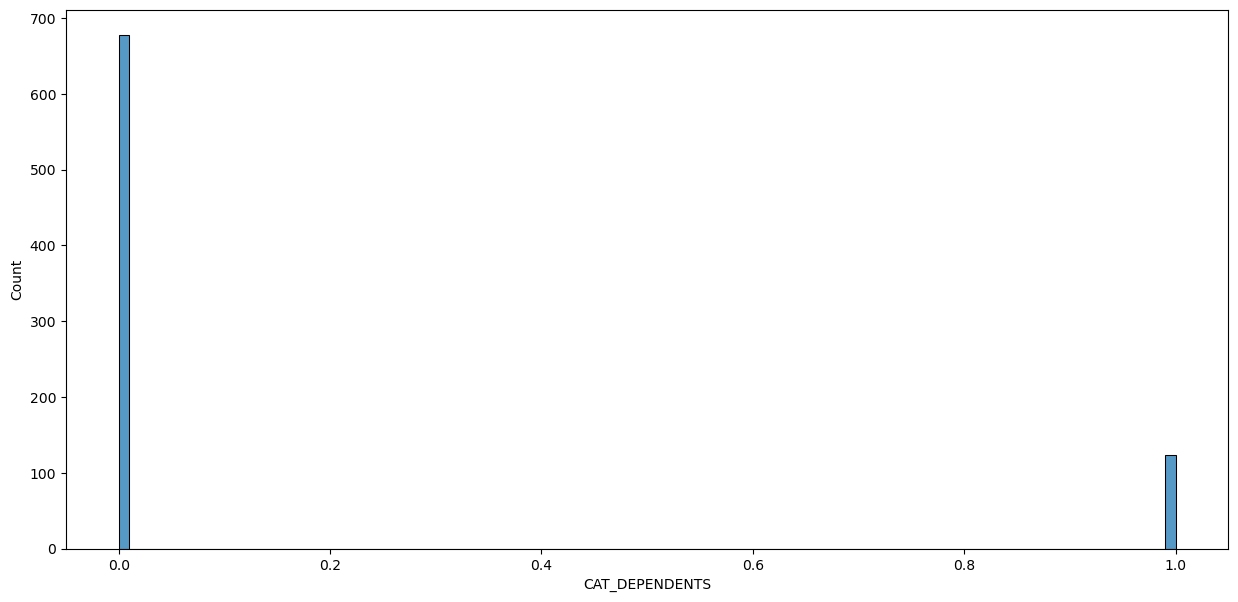

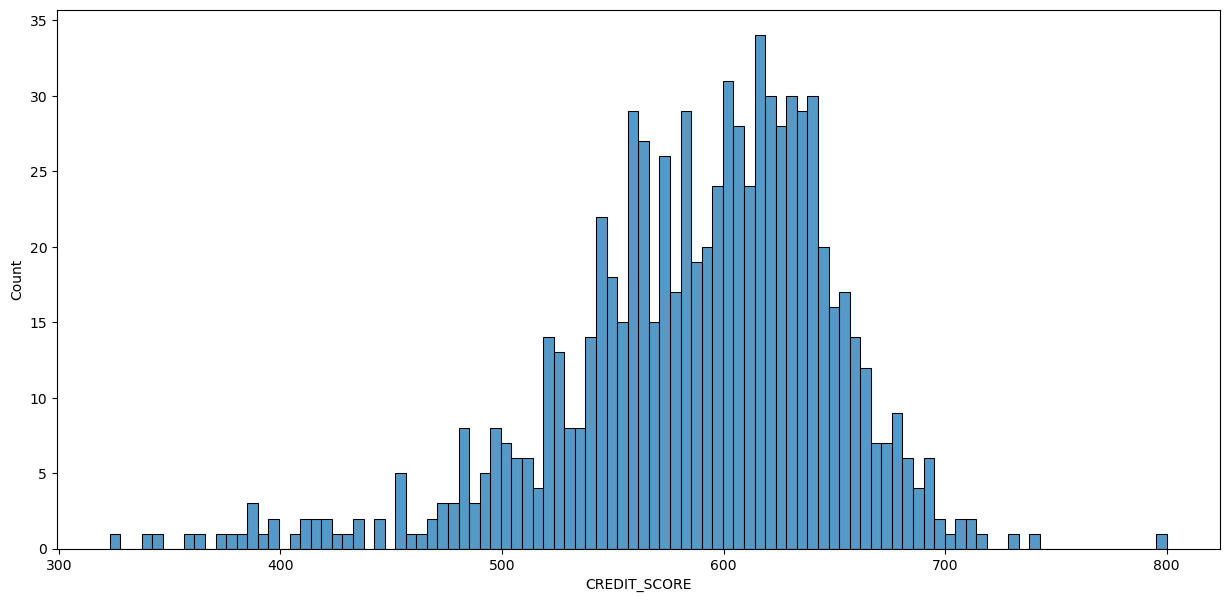

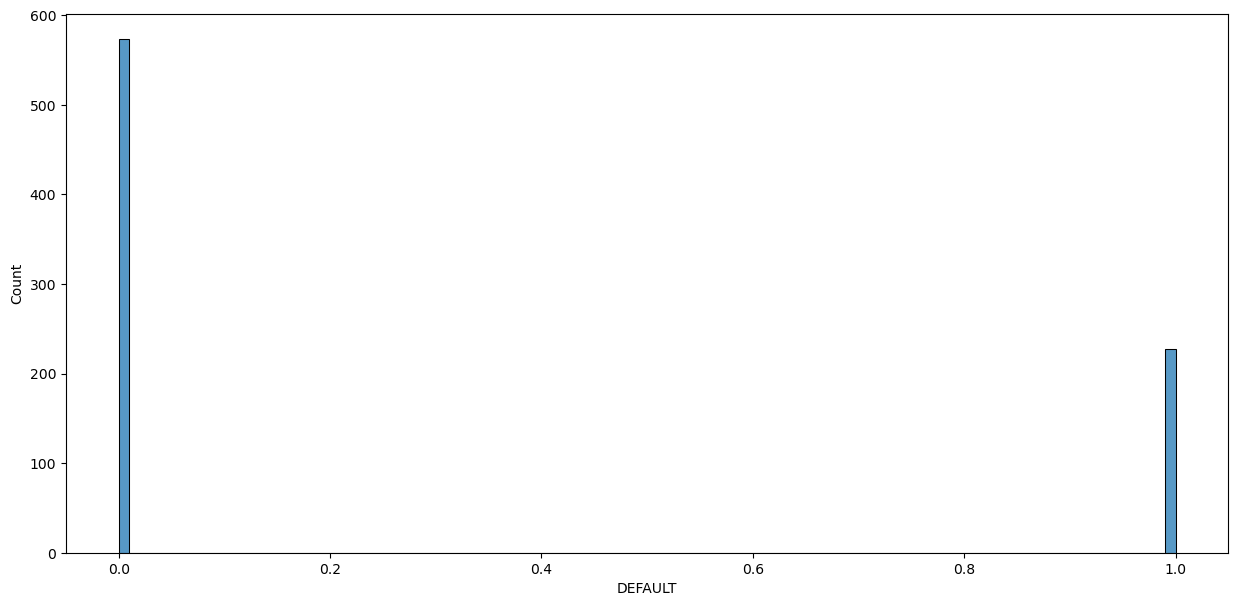

In [14]:
for column in train.columns:
    plt.figure(figsize=(15, 7)) 
    sns.histplot(data[column], bins=100)


In [17]:
train.drop('CREDIT_SCORE', axis=1, inplace=True)
test.drop('CREDIT_SCORE', axis=1, inplace=True)

KeyError: "['CREDIT_SCORE'] not found in axis"

ml 1

In [18]:

train.drop('CUST_ID', axis=1, inplace=True)
test.drop('CUST_ID', axis=1, inplace=True)

In [20]:

train.drop('CAT_GAMBLING', axis=1, inplace=True)
test.drop('CAT_GAMBLING', axis=1, inplace=True)

In [22]:
# random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train = train.drop('DEFAULT', axis=1)
y_train = train['DEFAULT']

X_test = test.drop('DEFAULT', axis=1)
y_test = test['DEFAULT']

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

#accuracy table
print('Accuracy: ', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy:  0.74375
[[109   5]
 [ 36  10]]
              precision    recall  f1-score   support

           0       0.75      0.96      0.84       114
           1       0.67      0.22      0.33        46

    accuracy                           0.74       160
   macro avg       0.71      0.59      0.58       160
weighted avg       0.73      0.74      0.69       160



In [23]:
# logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)

#accuracy table
print('Accuracy: ', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy:  0.75
[[105   9]
 [ 31  15]]
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       114
           1       0.62      0.33      0.43        46

    accuracy                           0.75       160
   macro avg       0.70      0.62      0.63       160
weighted avg       0.73      0.75      0.72       160



/Users/katebokhan/anaconda3/envs/6.86x/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
# gradient boosting

from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

#accuracy table
print('Accuracy: ', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.725
[[103  11]
 [ 33  13]]
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       114
           1       0.54      0.28      0.37        46

    accuracy                           0.73       160
   macro avg       0.65      0.59      0.60       160
weighted avg       0.70      0.72      0.69       160



In [25]:
# xgboost

import xgboost as xgb

xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

#accuracy table
print('Accuracy: ', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.6875
[[100  14]
 [ 36  10]]
              precision    recall  f1-score   support

           0       0.74      0.88      0.80       114
           1       0.42      0.22      0.29        46

    accuracy                           0.69       160
   macro avg       0.58      0.55      0.54       160
weighted avg       0.64      0.69      0.65       160



In [26]:
# Support Vector Machine

from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_scaled, y_train)

y_pred = svc.predict(X_test_scaled)

#accuracy table
print('Accuracy: ', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy:  0.7375
[[112   2]
 [ 40   6]]
              precision    recall  f1-score   support

           0       0.74      0.98      0.84       114
           1       0.75      0.13      0.22        46

    accuracy                           0.74       160
   macro avg       0.74      0.56      0.53       160
weighted avg       0.74      0.74      0.66       160



In [27]:
#Naive Bayes (Gaussian

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

#accuracy table
print('Accuracy: ', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.61875
[[94 20]
 [41  5]]
              precision    recall  f1-score   support

           0       0.70      0.82      0.76       114
           1       0.20      0.11      0.14        46

    accuracy                           0.62       160
   macro avg       0.45      0.47      0.45       160
weighted avg       0.55      0.62      0.58       160



In [28]:
#Stochastic Gradient Descent Classifier

from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_train_scaled, y_train)

y_pred = sgd.predict(X_test_scaled)

#accuracy table
print('Accuracy: ', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.69375
[[94 20]
 [29 17]]
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       114
           1       0.46      0.37      0.41        46

    accuracy                           0.69       160
   macro avg       0.61      0.60      0.60       160
weighted avg       0.68      0.69      0.68       160



In [29]:
#KNN (k-nearest neighbor)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

#accuracy table
print('Accuracy: ', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.71875
[[101  13]
 [ 32  14]]
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       114
           1       0.52      0.30      0.38        46

    accuracy                           0.72       160
   macro avg       0.64      0.60      0.60       160
weighted avg       0.69      0.72      0.69       160



In [30]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

#accuracy table
print('Accuracy: ', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.625
[[85 29]
 [31 15]]
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       114
           1       0.34      0.33      0.33        46

    accuracy                           0.62       160
   macro avg       0.54      0.54      0.54       160
weighted avg       0.62      0.62      0.62       160



In [1]:
# gradient boosting
X_train['SAVINGS_sqrt'] = np.sqrt(train['SAVINGS'])
X_test['SAVINGS_sqrt'] = np.sqrt(test['SAVINGS'])
X_test.drop('SAVINGS', axis=1, inplace=True)
X_train.drop('SAVINGS', axis=1, inplace=True)

gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

#accuracy table
print('Accuracy: ', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

NameError: name 'np' is not defined

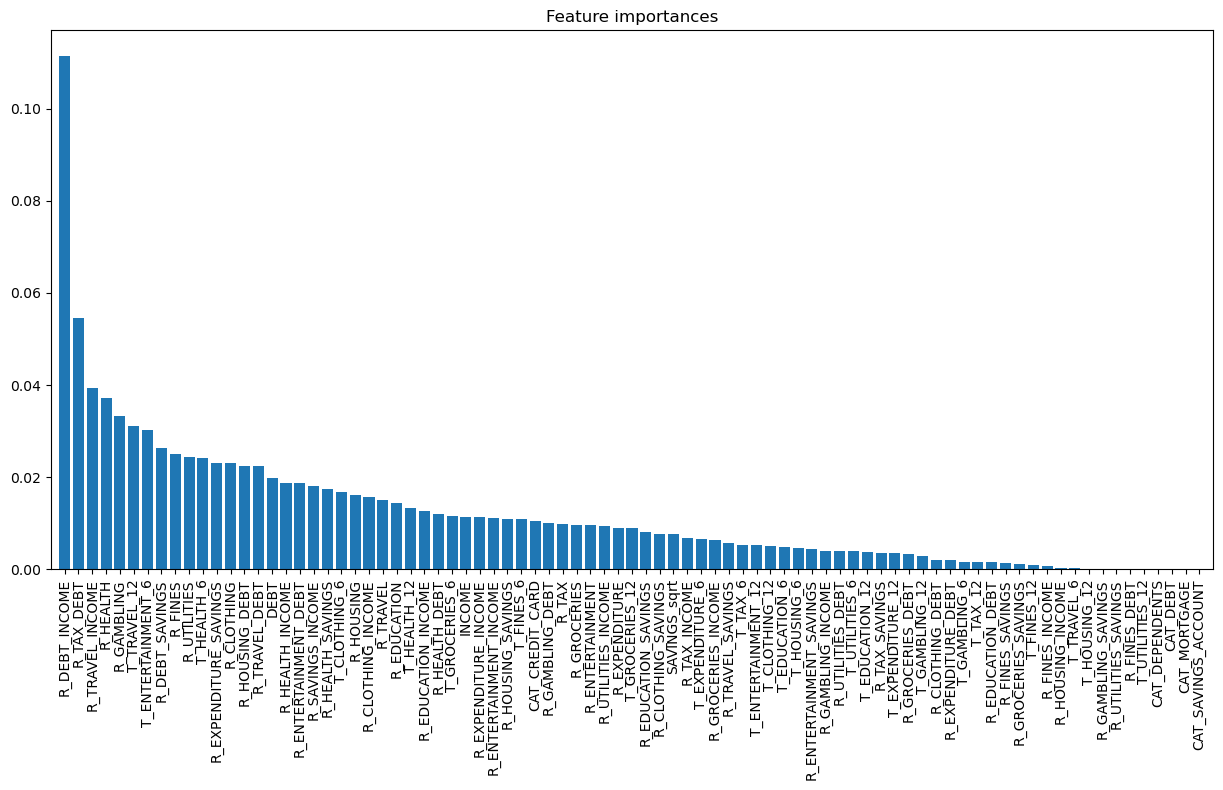

In [32]:
# gradient boosting hyperparameter tuning
# feature importance
importances = gb.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(15, 7))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [145]:
data[data['T_TRAVEL_6']>140000]

,INCOME,SAVINGS,DEBT,T_CLOTHING_12,T_CLOTHING_6,T_EDUCATION_12,T_ENTERTAINMENT_12,T_FINES_12,T_FINES_6,T_GAMBLING_12,...,T_EXPENDITURE_6,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT,SAVINGS_sqrt
75,414920,1357920,2414080,33407,23191,7557,28910,0,0,16109,...,267213,2,1,1,0,1,0,538,0,1165.298245
770,502583,963284,1088929,24957,22274,0,30553,0,0,15137,...,282929,2,1,0,1,1,0,603,1,981.470326


In [146]:
data['T_TRAVEL_6'].sort_values(ascending=False).head(10)

770    158788
75     158046
631    112871
201    108156
41     106815
31     105562
200    102124
477    101899
237    101581
126    100108
Name: T_TRAVEL_6, dtype: int64

<h1>PROBABLY 2 OUTLIERS HERE??? </h1>

In [147]:
data[data['T_HEALTH_6']>20000]

,INCOME,SAVINGS,DEBT,T_CLOTHING_12,T_CLOTHING_6,T_EDUCATION_12,T_ENTERTAINMENT_12,T_FINES_12,T_FINES_6,T_GAMBLING_12,...,T_EXPENDITURE_6,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT,SAVINGS_sqrt
404,314430,445442,707468,35861,29157,0,37425,0,0,18912,...,160030,2,1,0,1,1,0,691,0,667.414414


In [148]:
data['T_HEALTH_6'].sort_values(ascending=False).head(10)

404    25322
75     17927
770    17874
237    17427
728    17312
556    17270
555    16920
158    16103
380    14292
631    13962
Name: T_HEALTH_6, dtype: int64

<h1>AN OUTLIER HERE???</h1>

In [149]:
data['T_FINES_6'].sort_values(ascending=False).head(10)

702    1082
725     998
17      989
362     925
154     791
480     474
257     428
543     427
6       388
665     380
Name: T_FINES_6, dtype: int64

In [150]:
# num_cols = 2 
# num_rows = (87 + num_cols - 1) // num_cols

# fig, axes = plt.subplots(num_rows, num_cols, figsize=(40, 500))

# axes = axes.flatten()

# for i, column in enumerate(data.columns):
#     sns.boxplot(x='DEFAULT', y=column, data=data, ax=axes[i])
#     axes[i].set_title(column + ' by DEFAULT', fontsize=20)
#     axes[i].set_xlabel('DEFAULT', fontsize=18)
#     axes[i].set_ylabel(column, fontsize=18)
#     axes[i].tick_params(axis='x', labelsize=18)
#     axes[i].tick_params(axis='y', labelsize=18)


# for j in range(i+1, num_rows*num_cols):
#     fig.delaxes(axes[j])

# plt.tight_layout()
# plt.show()

<h3>OUTLIERS</h3>

In [151]:
#find records, where DEFAULT=1 and CAT_dependents=0
# make heatmap of dependents and default

print(data[(data['DEFAULT'] == 1) & (data['CAT_DEPENDENTS'] == 1)].shape)
print(data[(data['DEFAULT'] == 1) & (data['CAT_DEPENDENTS'] == 0)].shape)
print(data[(data['DEFAULT'] == 0) & (data['CAT_DEPENDENTS'] == 1)].shape)
print(data[(data['DEFAULT'] == 0) & (data['CAT_DEPENDENTS'] == 0)].shape)

#no outliers


(44, 29)
(183, 29)
(79, 29)
(494, 29)


In [152]:
print(data[(data['DEFAULT'] == 1) & (data['CAT_MORTGAGE'] == 1)].shape)
print(data[(data['DEFAULT'] == 1) & (data['CAT_MORTGAGE'] == 0)].shape)
print(data[(data['DEFAULT'] == 0) & (data['CAT_MORTGAGE'] == 1)].shape)
print(data[(data['DEFAULT'] == 0) & (data['CAT_MORTGAGE'] == 0)].shape)
#no outliers

(48, 29)
(179, 29)
(94, 29)
(479, 29)


In [153]:
print(data[(data['DEFAULT'] == 1) & (data['CAT_SAVINGS_ACCOUNT'] == 1)].shape)
print(data[(data['DEFAULT'] == 1) & (data['CAT_SAVINGS_ACCOUNT'] == 0)].shape)
print(data[(data['DEFAULT'] == 0) & (data['CAT_SAVINGS_ACCOUNT'] == 1)].shape)
print(data[(data['DEFAULT'] == 0) & (data['CAT_SAVINGS_ACCOUNT'] == 0)].shape)

(224, 29)
(3, 29)
(569, 29)
(4, 29)


<h1>PROBABLY 7 OUTLIERS HERE??? </h1>

In [154]:
print(data[(data['DEFAULT'] == 1) & (data['CAT_DEBT'] == 1)].shape)
print(data[(data['DEFAULT'] == 1) & (data['CAT_DEBT'] == 0)].shape)
print(data[(data['DEFAULT'] == 0) & (data['CAT_DEBT'] == 1)].shape)
print(data[(data['DEFAULT'] == 0) & (data['CAT_DEBT'] == 0)].shape)

(221, 29)
(6, 29)
(533, 29)
(40, 29)


In [155]:
print(data[(data['DEFAULT'] == 1) & (data['CAT_CREDIT_CARD'] == 1)].shape)
print(data[(data['DEFAULT'] == 1) & (data['CAT_CREDIT_CARD'] == 0)].shape)
print(data[(data['DEFAULT'] == 0) & (data['CAT_CREDIT_CARD'] == 1)].shape)
print(data[(data['DEFAULT'] == 0) & (data['CAT_CREDIT_CARD'] == 0)].shape)
#no outliers

(75, 29)
(152, 29)
(110, 29)
(463, 29)


In [160]:
for column in data.columns:
    print(column, data[data[column]==0].shape[0])

INCOME 41
SAVINGS 7
DEBT 46
T_CLOTHING_12 41
T_CLOTHING_6 54
T_EDUCATION_12 482
T_ENTERTAINMENT_12 41
T_FINES_12 745
T_FINES_6 764
T_GAMBLING_12 500
T_GROCERIES_12 0
T_HEALTH_12 42
T_HEALTH_6 59
T_HOUSING_12 421
T_TAX_12 155
T_TRAVEL_12 164
T_TRAVEL_6 164
T_UTILITIES_12 42
T_EXPENDITURE_12 0
T_EXPENDITURE_6 0
CAT_GAMBLING 500
CAT_DEBT 46
CAT_CREDIT_CARD 615
CAT_MORTGAGE 658
CAT_SAVINGS_ACCOUNT 7
CAT_DEPENDENTS 677
CREDIT_SCORE 0
DEFAULT 573
SAVINGS_sqrt 7


In [165]:
data[(data['DEBT'] != 1)]['DEFAULT'].mean()

0.28375